# Description
Add to the queueing simulator you have already developed (lab 1) some routines to:

a) detect the end of transient in an automated way (write a short report to describe the algorithm you have employed)

b) evaluate the accuracy of results.

Your code should employ a "batch means" technique that adaptively chooses  the number of batches so to achieve outputs with a desired degree of accuracy. 

Define properly the accuracy metric, which should be related to the width of confidence intervals.

Plot of the average delay in function of the utilisation, where the utilisation is: 0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99. Show also the 95%-level confidence intervals.

Consider three scenarios for the service time:

EXP: exponentially distributed with mean=1

DET: deterministic =1

HYP:  distributed according to a hyper-exponential distribution with mean=1 standard deviation=10

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Defining functions and classes

In [2]:
#we only have to change the service time 
# def arrival(time, FES, queue, average_arrival_time, average_service_time,flag):
def arrival(time, FES, queue, average_arrival_time, average_service_time):

    #flag = 1 -> deterministic
    #flag = 2 -> expo
    #flag = 3 -> hyper
    global users
    global customer
    
    # introducing random client arrival
    # inter_arrival = np.random.exponential(1.0/average_arrival_time)
    inter_arrival = random.expovariate(1.0/average_arrival_time)
    #FES.put((time + inter_arrival, 'arrival'))
    FES.append((time + inter_arrival, 'arrival'))
    
    # managing the event 
    users += 1
    x = 'client' + str(customer)
    customer += 1
    
    # recording client id and put it in the list
    client = Client(x, time)
    queue.append(client)

    print(f'{client.name} arrived at {client.arrival_time}')
    
    # start the service in case the server is idle
#     if users == 1 and flag ==2:
    if users == 1:

        #giving random service time to the clients      
        service_time = random.expovariate(1.0/average_service_time)
        FES.append((time + service_time, 'departure'))
        
        
#     elif users==1 and flag ==1:
#         #deterministic scenario
#         service_time = 1
#         FES.append((time + service_time, 'departure'))

# def departure(time, FES, queue, average_arrival_time, average_service_time,flag):
def departure(time, FES, queue, average_arrival_time, average_service_time):


    global users
    
    # manipulating the list of clients to get FIFO orientation
    queue.reverse() #since it's  first in first out scenario 
    client = queue.pop()
    queue.reverse()
    users -= 1
    delay = time - client.arrival_time #it's the time it take for a client to get to the point in which he/she can get the service 
    
    print(f'{client.name} departured at {time}')
    
    # checking the number of clients in line
#     if users > 0 and flag == 2:
    if users > 0:

        # scheduling random departure time to the clients by giving them random expo values
        # service_time = np.random.exponential(1.0/average_service_time)
        service_time = random.expovariate(1.0/average_service_time)
        FES.append((time + service_time, 'departure'))
#     if users > 0 and flag == 1:
#         # deterministic
#         #there's another scenario in which we don't change here and we only change average_service_time
#         #we make it deterministic, exponential and so onsss
#         service_time = 1
#         FES.append((time + service_time, 'departure'))
    return delay

class Client:
    def __init__(self, name, arrival_time):
        self.name = name
        self.arrival_time = arrival_time
        

# Finding transient knee (k)
In order to find the transient knee (k), we should implement the simulation for a long time and compute the average. Afterwards, we should calculate the average depending on k to plot. Fianlly, k is determined by this plot.

In [3]:
def finding_transient(delay_list):
    
    delay_ave = sum(delay_list) / len(delay_list)
    delay_ave_k = {}
    delay_ave_r = {}
    
    for k in range(len(delay_list)):
        temp = sum(delay_list[(k):]) / (len(delay_list) - k)
        delay_ave_k[k] = temp
        delay_ave_r[k] = (temp/delay_ave) - 1
    
    print('*****************************', k)
    plt.plot(delay_ave_k.keys(), delay_ave_k.values())
    # plt.plot(delay_ave_r.keys(), delay_ave_r.values())
    
    return delay_ave_k

In [17]:
np.random.seed(32)
random.seed(42)
simulation_time = 50000
utilization = [0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99]
cumulative_delay = []
variance_delay = []

for u in [0.9]:
    # initialization of variables
    
    time = 0
    users = 0
    customer = 1
    queue = []
    FES = []
    delay = []
    
    FES.append((0,'arrival'))
    target = 0

    while time < simulation_time:
#         average_service_time = 1 #deterministic
        average_service_time=random.expovariate(1)
        Lambda = u/average_service_time
        average_arrival_time = 1/Lambda
    
        FES = sorted(FES)
        (time, event_type) = FES[target] #it returns the time 
        
        if event_type == 'arrival':
            arrival(time, FES, queue, average_arrival_time, average_service_time)
        elif event_type == 'departure':
            delay.append(departure(time, FES, queue, average_arrival_time, average_service_time))
            cumulative_delay.append(sum(delay)/len(delay))
            variance_delay.append(np.var(delay))
            
        target += 1
        
    # temp = finding_transient(delay)
        
        

client1 arrived at 0
client2 arrived at 0.02870771425585937
client1 departured at 0.3280759351947984
client3 arrived at 0.40298225476942096
client4 arrived at 0.45836682813887014
client5 arrived at 0.46665929899753533
client6 arrived at 0.4876941749567234
client7 arrived at 0.7462093233177939
client8 arrived at 0.9640601952420217
client9 arrived at 2.603026627472915
client10 arrived at 2.6148999673421893
client2 departured at 2.843069540026531
client11 arrived at 3.1684054685736314
client12 arrived at 3.2127857974323724
client3 departured at 3.375633591178629
client13 arrived at 3.42532741261297
client14 arrived at 4.542304773273379
client4 departured at 4.899002632342661
client5 departured at 6.319170081299781
client15 arrived at 6.453573675014248
client16 arrived at 7.620358192100805
client17 arrived at 7.633838323115871
client18 arrived at 7.665403111421137
client19 arrived at 7.696753252631344
client20 arrived at 8.06215788199986
client6 departured at 8.225727317289328
client21 arr

client1103 arrived at 1268.0189396037777
client1104 arrived at 1268.8451312592
client1105 arrived at 1268.9408989579147
client1106 arrived at 1268.993165686681
client1103 departured at 1269.2331769427285
client1107 arrived at 1269.430047233182
client1108 arrived at 1269.641279279023
client1109 arrived at 1270.1104980091939
client1110 arrived at 1270.9803487767515
client1111 arrived at 1271.003743441674
client1112 arrived at 1272.2097260039352
client1104 departured at 1272.227479328018
client1105 departured at 1272.65546074095
client1106 departured at 1273.042515126607
client1107 departured at 1273.1619635998907
client1108 departured at 1273.3769267117466
client1109 departured at 1273.6023639547439
client1113 arrived at 1275.0721240774046
client1114 arrived at 1275.1048282230283
client1115 arrived at 1275.5416768689486
client1116 arrived at 1275.6074296967615
client1117 arrived at 1275.8278330567064
client1118 arrived at 1275.8282606308605
client1119 arrived at 1276.9245803628476
client

client1615 arrived at 1812.9976039329676
client1615 departured at 1813.1431141848655
client1616 arrived at 1814.7278005515182
client1616 departured at 1814.8127238119646
client1617 arrived at 1815.141776983252
client1617 departured at 1816.4316337112673
client1618 arrived at 1817.9630884717164
client1619 arrived at 1820.3773555746648
client1620 arrived at 1820.6555886245076
client1618 departured at 1820.9162836675296
client1621 arrived at 1821.1014687781656
client1622 arrived at 1821.4969446475309
client1623 arrived at 1821.6163469914402
client1619 departured at 1822.9552489867488
client1620 departured at 1823.5036532936554
client1624 arrived at 1828.3435484369197
client1625 arrived at 1829.4837166522557
client1621 departured at 1831.0937116023674
client1622 departured at 1831.360694805601
client1623 departured at 1831.4554307348196
client1624 departured at 1831.6242283153617
client1625 departured at 1831.6670193744033
client1626 arrived at 1839.1216013295311
client1626 departured at 1

client2074 arrived at 2385.0662964391063
client2075 arrived at 2385.2446256674607
client2076 arrived at 2385.2647440376454
client2077 arrived at 2385.3098572708795
client2074 departured at 2385.386077805514
client2075 departured at 2385.5253462715505
client2076 departured at 2385.8441457744525
client2077 departured at 2386.276557127593
client2078 arrived at 2387.061326841713
client2079 arrived at 2387.061360834298
client2078 departured at 2387.0615769358237
client2079 departured at 2387.695154599298
client2080 arrived at 2388.3046497117325
client2081 arrived at 2389.2806578826235
client2082 arrived at 2389.653282884765
client2083 arrived at 2389.680566516118
client2084 arrived at 2390.195808920407
client2085 arrived at 2390.278281304544
client2080 departured at 2393.3765654995273
client2081 departured at 2393.6008964885104
client2082 departured at 2393.662073775393
client2083 departured at 2393.737310241537
client2084 departured at 2393.8788565317145
client2085 departured at 2395.07435

client2424 departured at 2777.07995961441
client2428 arrived at 2777.5496135587223
client2429 arrived at 2777.5503437113503
client2425 departured at 2777.6268717273774
client2426 departured at 2777.646824168382
client2430 arrived at 2777.882721254808
client2431 arrived at 2777.8829278061326
client2432 arrived at 2778.042465612164
client2427 departured at 2778.2542740437743
client2428 departured at 2778.501044841919
client2429 departured at 2778.5294287455686
client2430 departured at 2779.7343202212123
client2431 departured at 2779.8083846009463
client2432 departured at 2779.966683687183
client2433 arrived at 2780.4251267000627
client2433 departured at 2781.342090048471
client2434 arrived at 2782.3054244525333
client2435 arrived at 2782.340178528289
client2434 departured at 2782.3425659279146
client2436 arrived at 2782.6833247941668
client2435 departured at 2782.784858160138
client2436 departured at 2782.817308092122
client2437 arrived at 2783.786107205516
client2438 arrived at 2783.821

client2716 departured at 3125.050860591071
client2717 departured at 3125.2738468721323
client2743 arrived at 3125.2972874347856
client2718 departured at 3125.3840617033516
client2719 departured at 3125.513617734992
client2720 departured at 3125.5500472551494
client2721 departured at 3126.0730693142773
client2744 arrived at 3126.290134218591
client2722 departured at 3126.3640524448642
client2723 departured at 3126.5566616747487
client2745 arrived at 3126.8711950695374
client2724 departured at 3126.9617442909425
client2725 departured at 3130.2909676712497
client2726 departured at 3130.677383674285
client2746 arrived at 3135.1099373455886
client2747 arrived at 3135.1264209788174
client2727 departured at 3135.257107603794
client2748 arrived at 3137.1648127450667
client2749 arrived at 3137.868305003165
client2728 departured at 3142.5693038577597
client2729 departured at 3142.6256800304072
client2750 arrived at 3143.429172424281
client2751 arrived at 3144.0259919705854
client2752 arrived at 

client2988 arrived at 3411.7859020278956
client2989 arrived at 3412.26204881344
client2990 arrived at 3412.8344131856684
client2991 arrived at 3413.263659951054
client2992 arrived at 3413.5323808403036
client2969 departured at 3413.974445376163
client2970 departured at 3414.1517960225333
client2993 arrived at 3414.3339173644636
client2971 departured at 3414.6275148067893
client2972 departured at 3414.6429932328124
client2973 departured at 3414.689497475303
client2974 departured at 3414.796717673219
client2994 arrived at 3415.06005580382
client2995 arrived at 3415.1126645211993
client2975 departured at 3415.4846809151854
client2976 departured at 3415.766687248964
client2996 arrived at 3416.0269897421
client2977 departured at 3416.7746108879014
client2997 arrived at 3417.586549749074
client2998 arrived at 3417.670138533402
client2978 departured at 3417.840022764015
client2979 departured at 3419.7002939093586
client2999 arrived at 3419.711801991203
client2980 departured at 3420.0617521211

client3221 departured at 3757.636508503675
client3222 departured at 3758.050049310008
client3249 arrived at 3758.2428436069354
client3250 arrived at 3758.4364865430152
client3251 arrived at 3759.5678907491174
client3223 departured at 3759.6770146540734
client3224 departured at 3759.876081093683
client3225 departured at 3759.9396339462637
client3226 departured at 3760.216925591553
client3252 arrived at 3760.7126680790248
client3253 arrived at 3760.793348457317
client3254 arrived at 3760.80372000055
client3255 arrived at 3760.8165606607886
client3227 departured at 3762.022274993138
client3228 departured at 3762.398699655353
client3256 arrived at 3763.1308021931286
client3229 departured at 3763.8791669715524
client3257 arrived at 3763.9524569575046
client3230 departured at 3764.413364311941
client3231 departured at 3764.4982655274107
client3258 arrived at 3764.8009415054785
client3259 arrived at 3764.8819090064962
client3260 arrived at 3765.695599547115
client3261 arrived at 3766.01007798

client3491 arrived at 4024.454308693419
client3461 departured at 4029.788450338852
client3462 departured at 4029.7888588157844
client3492 arrived at 4030.0319977781523
client3463 departured at 4030.378668086481
client3493 arrived at 4030.6195346692266
client3494 arrived at 4030.658448716431
client3464 departured at 4031.1535219617517
client3465 departured at 4031.1882514954286
client3495 arrived at 4031.652960508271
client3496 arrived at 4032.0616413688085
client3497 arrived at 4032.1642269186414
client3498 arrived at 4032.80047127521
client3499 arrived at 4033.755956781831
client3500 arrived at 4035.2349972739803
client3501 arrived at 4035.259968346765
client3466 departured at 4035.4173831037892
client3502 arrived at 4035.571697708696
client3503 arrived at 4035.676420816503
client3504 arrived at 4035.718676287458
client3467 departured at 4036.658867631899
client3505 arrived at 4038.041590286151
client3506 arrived at 4038.392646829868
client3468 departured at 4038.6320885810765
client3

client3683 departured at 4243.117642176291
client3684 departured at 4243.316857621804
client3685 departured at 4243.536745417786
client3686 departured at 4243.663605347669
client3687 departured at 4243.76340372059
client3710 arrived at 4244.218356843933
client3688 departured at 4247.893656667872
client3711 arrived at 4248.68510767063
client3712 arrived at 4249.7945983766385
client3713 arrived at 4250.011978159081
client3689 departured at 4250.262214043016
client3714 arrived at 4250.489930848214
client3690 departured at 4250.6827201964525
client3691 departured at 4250.684912804783
client3715 arrived at 4255.420322468964
client3716 arrived at 4255.4240650788315
client3717 arrived at 4255.623112297761
client3718 arrived at 4255.761386775255
client3719 arrived at 4256.565109885015
client3720 arrived at 4256.901512693363
client3721 arrived at 4257.314597207782
client3722 arrived at 4258.746536348858
client3723 arrived at 4258.929302088668
client3724 arrived at 4258.931139190629
client3725 a

client3879 departured at 4473.059306026459
client3880 departured at 4473.063163755344
client3881 departured at 4473.089591219238
client3882 departured at 4473.142708665905
client3883 departured at 4473.929193756449
client3884 departured at 4473.9336176850775
client3885 departured at 4474.400151840665
client3886 departured at 4474.455630878516
client3909 arrived at 4475.223997850848
client3910 arrived at 4475.505187788514
client3911 arrived at 4476.193981566943
client3912 arrived at 4476.920078903908
client3913 arrived at 4477.970993991573
client3887 departured at 4478.013368856064
client3888 departured at 4478.702820688096
client3914 arrived at 4479.217530934611
client3889 departured at 4480.358141708796
client3915 arrived at 4480.761393393678
client3916 arrived at 4481.2028157625855
client3917 arrived at 4481.331781691669
client3890 departured at 4481.413432100008
client3918 arrived at 4481.4223723504065
client3891 departured at 4481.489516760949
client3919 arrived at 4481.80244030373

client4096 departured at 4731.227987201414
client4102 arrived at 4731.236217320652
client4097 departured at 4733.740862792474
client4103 arrived at 4733.892446896875
client4104 arrived at 4733.990650118262
client4105 arrived at 4734.055932982827
client4098 departured at 4734.09856121568
client4106 arrived at 4734.575241280402
client4099 departured at 4734.724524512995
client4100 departured at 4735.118658979898
client4107 arrived at 4735.302379671879
client4108 arrived at 4736.306974163114
client4109 arrived at 4736.331644186903
client4101 departured at 4737.692338599645
client4102 departured at 4737.852692257884
client4103 departured at 4738.152278351681
client4104 departured at 4738.256101394254
client4105 departured at 4738.394572486601
client4106 departured at 4738.590056919514
client4107 departured at 4739.519028661918
client4108 departured at 4739.628790828563
client4110 arrived at 4739.714075139011
client4111 arrived at 4739.790559257274
client4109 departured at 4740.061994077059

client4261 departured at 4917.47141190325
client4279 arrived at 4919.673070069445
client4280 arrived at 4919.806186351204
client4281 arrived at 4919.808273158836
client4262 departured at 4920.343943978138
client4263 departured at 4920.411937935302
client4264 departured at 4920.658305407127
client4265 departured at 4920.791700385903
client4282 arrived at 4920.798942725122
client4266 departured at 4920.905710166469
client4267 departured at 4920.928392985402
client4268 departured at 4921.084859269166
client4269 departured at 4921.0979041933515
client4283 arrived at 4921.548665292058
client4284 arrived at 4921.828745071547
client4285 arrived at 4922.620659347719
client4286 arrived at 4922.728015827166
client4287 arrived at 4922.729482339305
client4288 arrived at 4924.101360550555
client4289 arrived at 4924.653903909082
client4270 departured at 4924.659252508301
client4290 arrived at 4924.662951688296
client4291 arrived at 4924.883858641235
client4292 arrived at 4925.309352542924
client4293

client4447 departured at 5144.231983636263
client4448 departured at 5144.307804412759
client4449 departured at 5144.4015446210005
client4450 departured at 5144.4838899078595
client4480 arrived at 5144.630377063672
client4481 arrived at 5147.252864771957
client4482 arrived at 5148.13633290167
client4483 arrived at 5148.519378115646
client4484 arrived at 5149.9409468767735
client4485 arrived at 5150.279523422328
client4486 arrived at 5150.437545667101
client4487 arrived at 5151.2176928138415
client4451 departured at 5152.887411857513
client4452 departured at 5152.996715608787
client4453 departured at 5153.168770664694
client4454 departured at 5153.64533776842
client4488 arrived at 5155.1211178707745
client4489 arrived at 5155.552531940736
client4455 departured at 5155.985404989299
client4456 departured at 5156.178832474102
client4457 departured at 5156.725116257023
client4458 departured at 5157.367058900019
client4490 arrived at 5158.20259791495
client4459 departured at 5158.208059942402

client4600 departured at 5324.381860960284
client4685 arrived at 5324.433610641526
client4686 arrived at 5324.4348807124825
client4687 arrived at 5324.634142290904
client4688 arrived at 5324.685303129003
client4601 departured at 5325.461364001635
client4689 arrived at 5325.4895437096175
client4602 departured at 5325.671877789405
client4690 arrived at 5326.134245334686
client4691 arrived at 5326.1874177529035
client4692 arrived at 5327.4323030384685
client4693 arrived at 5328.011528823414
client4603 departured at 5328.110489150876
client4604 departured at 5328.122072256872
client4605 departured at 5329.571998506311
client4606 departured at 5330.308380220861
client4607 departured at 5332.134419708387
client4694 arrived at 5332.2681372587385
client4695 arrived at 5332.334976906747
client4696 arrived at 5332.505218505873
client4608 departured at 5333.074314969009
client4609 departured at 5333.196974247607
client4697 arrived at 5333.827532567774
client4610 departured at 5334.648555640819
cl

client4831 arrived at 5506.116759511182
client4832 arrived at 5506.11884018553
client4833 arrived at 5506.1360967784285
client4791 departured at 5508.103222822351
client4792 departured at 5508.597701301173
client4793 departured at 5512.190742666985
client4794 departured at 5512.222348970523
client4795 departured at 5512.238547746921
client4796 departured at 5512.339811009903
client4834 arrived at 5513.561863444991
client4797 departured at 5513.587207907542
client4835 arrived at 5513.786153186913
client4836 arrived at 5514.140214085181
client4798 departured at 5517.201410429452
client4837 arrived at 5517.2190207673275
client4799 departured at 5517.3293109092165
client4838 arrived at 5517.468033492594
client4839 arrived at 5517.51601130198
client4800 departured at 5517.536214256634
client4801 departured at 5517.58771808535
client4840 arrived at 5519.325954563881
client4841 arrived at 5519.421644726445
client4802 departured at 5519.760139466632
client4842 arrived at 5519.894077129254
clie

client4947 departured at 5703.501000984643
client4948 departured at 5704.498520449119
client4949 departured at 5704.54514969043
client4950 departured at 5704.868770355284
client4997 arrived at 5705.034207650372
client4998 arrived at 5706.1852407335
client4999 arrived at 5706.323608051092
client4951 departured at 5706.335143109472
client5000 arrived at 5706.609768152986
client4952 departured at 5707.100482384124
client4953 departured at 5707.441800914699
client4954 departured at 5707.509359470568
client4955 departured at 5707.525494830468
client4956 departured at 5707.924729866531
client4957 departured at 5708.204527928867
client4958 departured at 5710.50547052521
client4959 departured at 5713.965201717215
client5001 arrived at 5714.300331316121
client5002 arrived at 5714.648035625112
client4960 departured at 5714.8817791459805
client4961 departured at 5714.885944332475
client5003 arrived at 5714.919646283496
client4962 departured at 5715.005908900508
client4963 departured at 5715.28020

client5152 arrived at 5853.207044357274
client5153 arrived at 5853.722901709521
client5118 departured at 5855.010903025882
client5119 departured at 5855.249472400262
client5120 departured at 5855.557563679127
client5154 arrived at 5855.836206049789
client5121 departured at 5855.9250420048675
client5155 arrived at 5856.5399660113535
client5156 arrived at 5856.715944043231
client5157 arrived at 5857.512187635369
client5158 arrived at 5857.657365665441
client5159 arrived at 5859.140962090051
client5160 arrived at 5859.399144885109
client5122 departured at 5860.011478224711
client5123 departured at 5860.053998415882
client5124 departured at 5860.738276367427
client5125 departured at 5860.740381544742
client5161 arrived at 5861.957395690368
client5126 departured at 5862.298229917238
client5127 departured at 5862.306348348115
client5162 arrived at 5862.33330087754
client5128 departured at 5862.7932911316775
client5129 departured at 5862.959858003103
client5130 departured at 5863.102887813158

client5302 arrived at 6031.3866453223145
client5284 departured at 6031.642836478183
client5285 departured at 6031.723196147046
client5286 departured at 6031.747803808006
client5303 arrived at 6031.936647898008
client5287 departured at 6032.930056877201
client5288 departured at 6032.968085200553
client5289 departured at 6033.110294870819
client5290 departured at 6033.227132717734
client5304 arrived at 6034.47851405699
client5291 departured at 6036.383724830816
client5292 departured at 6036.548614874051
client5293 departured at 6036.980554427877
client5294 departured at 6037.058085776162
client5295 departured at 6037.101232792981
client5296 departured at 6037.234513445136
client5297 departured at 6037.243088191796
client5298 departured at 6037.348282347669
client5299 departured at 6037.462799743379
client5300 departured at 6037.64347433315
client5301 departured at 6038.341843652491
client5305 arrived at 6038.741357776326
client5302 departured at 6039.040937712451
client5303 departured at

client5439 departured at 6190.651261931465
client5440 departured at 6190.806634630609
client5441 departured at 6190.811709054337
client5442 departured at 6190.821590124991
client5445 arrived at 6190.880937538605
client5446 arrived at 6191.345175931108
client5443 departured at 6191.48573086664
client5444 departured at 6192.07269166238
client5445 departured at 6192.329581234176
client5446 departured at 6192.335083266711
client5447 arrived at 6194.6013327920455
client5447 departured at 6194.682776350118
client5448 arrived at 6197.406500698318
client5449 arrived at 6197.522606494905
client5450 arrived at 6197.890804531527
client5448 departured at 6197.94966995924
client5451 arrived at 6197.974073720788
client5449 departured at 6197.974727397194
client5450 departured at 6198.555363411352
client5451 departured at 6199.16147221353
client5452 arrived at 6200.44409338183
client5452 departured at 6200.452948642313
client5453 arrived at 6200.532334216028
client5453 departured at 6201.400656986607

client5580 departured at 6369.284352617323
client5592 arrived at 6370.512761887642
client5593 arrived at 6370.521125265095
client5594 arrived at 6370.884850149333
client5595 arrived at 6371.03603040872
client5596 arrived at 6371.083789734431
client5597 arrived at 6371.1056105189255
client5598 arrived at 6371.22999227613
client5599 arrived at 6372.4754736596615
client5600 arrived at 6372.562881448793
client5601 arrived at 6373.837959639079
client5602 arrived at 6374.1830386819565
client5603 arrived at 6374.207597115548
client5604 arrived at 6374.213812140101
client5605 arrived at 6375.603173228514
client5581 departured at 6376.154921211808
client5606 arrived at 6376.1913887875635
client5582 departured at 6376.207765350434
client5583 departured at 6376.31714151339
client5584 departured at 6376.362318980959
client5585 departured at 6376.473792141135
client5586 departured at 6376.582143007896
client5587 departured at 6376.609101614078
client5588 departured at 6376.65862184671
client5607 ar

client5728 departured at 6510.90489350848
client5730 arrived at 6511.866018533221
client5731 arrived at 6512.442475593766
client5729 departured at 6513.301323529939
client5730 departured at 6513.375365325527
client5732 arrived at 6513.7615111049545
client5733 arrived at 6513.762652201533
client5734 arrived at 6513.7848894545195
client5735 arrived at 6513.966812168468
client5731 departured at 6514.108636057282
client5732 departured at 6514.302826058405
client5733 departured at 6514.527889950309
client5734 departured at 6514.552542598466
client5735 departured at 6514.630625527278
client5736 arrived at 6514.694402184874
client5737 arrived at 6514.828916328472
client5738 arrived at 6514.836486355127
client5736 departured at 6514.893767477256
client5739 arrived at 6515.20461016407
client5737 departured at 6515.8661055831235
client5740 arrived at 6515.940823304368
client5738 departured at 6516.399108529372
client5739 departured at 6517.215118978346
client5740 departured at 6517.21816409138
c

client5863 arrived at 6634.577695551163
client5864 arrived at 6634.696198773173
client5865 arrived at 6635.2428650072
client5866 arrived at 6635.299128991017
client5867 arrived at 6635.567500449563
client5868 arrived at 6636.056321192681
client5869 arrived at 6636.296855672948
client5863 departured at 6637.118124505745
client5864 departured at 6637.128198899717
client5865 departured at 6637.199707988911
client5866 departured at 6637.543813681578
client5867 departured at 6638.332021722798
client5870 arrived at 6639.103061815774
client5871 arrived at 6639.126673873885
client5868 departured at 6639.188126436985
client5869 departured at 6639.212488413461
client5872 arrived at 6639.817880755735
client5873 arrived at 6639.862474818847
client5870 departured at 6640.174515338709
client5871 departured at 6640.30749858154
client5874 arrived at 6640.355635536719
client5875 arrived at 6640.945022009448
client5872 departured at 6642.198381789203
client5873 departured at 6643.675803737575
client5874

client5994 departured at 6775.355807908079
client5995 departured at 6775.36138827286
client5996 departured at 6775.367215299816
client5997 departured at 6775.481731344105
client5998 departured at 6775.650753050069
client5999 departured at 6775.807870607316
client6000 departured at 6776.131869805971
client6001 departured at 6776.323720567549
client6007 arrived at 6777.306099639393
client6008 arrived at 6777.380601454006
client6002 departured at 6777.608320780614
client6003 departured at 6777.904327716772
client6009 arrived at 6778.849725392489
client6010 arrived at 6778.8677946855905
client6011 arrived at 6779.887704586817
client6004 departured at 6779.965291239975
client6005 departured at 6780.069946728644
client6006 departured at 6780.259393204737
client6012 arrived at 6780.613084881398
client6013 arrived at 6780.720665549743
client6014 arrived at 6780.86476166227
client6015 arrived at 6780.891095369385
client6016 arrived at 6780.951152263216
client6017 arrived at 6781.552044163024
cl

client6125 departured at 6886.178325552569
client6126 departured at 6886.271161964984
client6127 departured at 6888.176215583679
client6130 arrived at 6888.238741332343
client6128 departured at 6888.246533719747
client6131 arrived at 6888.400298113196
client6132 arrived at 6888.413220681756
client6129 departured at 6888.958807210991
client6130 departured at 6889.012184149098
client6131 departured at 6889.12751432752
client6133 arrived at 6889.191049118689
client6132 departured at 6889.282557882745
client6134 arrived at 6889.517358293877
client6133 departured at 6889.584956454922
client6134 departured at 6889.828187229208
client6135 arrived at 6893.983224734726
client6136 arrived at 6894.191630032023
client6137 arrived at 6894.669814875271
client6138 arrived at 6894.841985878746
client6135 departured at 6894.91739833242
client6136 departured at 6895.166358869306
client6137 departured at 6895.285930152237
client6138 departured at 6896.520088808352
client6139 arrived at 6898.873586591572


client6238 arrived at 7033.188043281989
client6233 departured at 7033.959880634194
client6234 departured at 7033.992756255756
client6235 departured at 7034.187015708342
client6236 departured at 7034.460716002843
client6239 arrived at 7034.725116070021
client6237 departured at 7035.088924070477
client6240 arrived at 7035.93081569306
client6241 arrived at 7035.948350648773
client6238 departured at 7036.775101977114
client6242 arrived at 7038.490974474229
client6243 arrived at 7039.065774271435
client6239 departured at 7039.06583697984
client6240 departured at 7039.215099726295
client6241 departured at 7039.307623684082
client6242 departured at 7039.542047286942
client6243 departured at 7039.90228982356
client6244 arrived at 7040.195265292289
client6244 departured at 7040.368194024424
client6245 arrived at 7040.59939883685
client6245 departured at 7040.6070514978355
client6246 arrived at 7040.6427492111925
client6246 departured at 7040.656548168931
client6247 arrived at 7041.03298268756
c

client6341 departured at 7152.145197086025
client6342 departured at 7152.424376333589
client6353 arrived at 7152.810088701002
client6354 arrived at 7153.460153437805
client6343 departured at 7153.653545265888
client6355 arrived at 7154.181279026977
client6356 arrived at 7154.437370663926
client6357 arrived at 7154.444833461819
client6358 arrived at 7156.522210055694
client6344 departured at 7156.6501795946515
client6359 arrived at 7158.11215612498
client6345 departured at 7158.965940843041
client6360 arrived at 7159.306428079005
client6361 arrived at 7159.670341348679
client6362 arrived at 7160.1380308164635
client6346 departured at 7161.503572043159
client6347 departured at 7162.339929843108
client6363 arrived at 7162.552878667057
client6348 departured at 7162.817731745218
client6349 departured at 7164.47561114147
client6350 departured at 7164.48964118823
client6364 arrived at 7164.667378024527
client6365 arrived at 7164.8635477908765
client6351 departured at 7165.573783623343
client6

client6481 arrived at 7288.685799617631
client6482 arrived at 7288.974992186879
client6483 arrived at 7289.409062156072
client6467 departured at 7289.860001446232
client6468 departured at 7290.714047259034
client6484 arrived at 7290.936455145731
client6469 departured at 7291.018221478804
client6470 departured at 7291.131775106711
client6485 arrived at 7291.181762641954
client6486 arrived at 7291.514340023346
client6487 arrived at 7291.683191197852
client6471 departured at 7291.693612099362
client6472 departured at 7292.681384112419
client6488 arrived at 7293.285167686665
client6473 departured at 7293.293171453721
client6474 departured at 7293.474371578175
client6475 departured at 7293.877294956534
client6476 departured at 7293.986262962022
client6489 arrived at 7294.068195010523
client6477 departured at 7294.514996633762
client6478 departured at 7294.552600334785
client6479 departured at 7295.0467712881355
client6480 departured at 7295.104213445751
client6481 departured at 7295.1737758

client6609 arrived at 7420.120241677321
client6610 arrived at 7420.421002291211
client6588 departured at 7420.932331447449
client6589 departured at 7420.978585758249
client6611 arrived at 7421.070066794163
client6590 departured at 7421.46050311113
client6591 departured at 7421.646953379091
client6592 departured at 7422.221153683965
client6612 arrived at 7424.08387722882
client6593 departured at 7425.393944129313
client6594 departured at 7425.418036461962
client6595 departured at 7425.6252189590705
client6613 arrived at 7425.814006236424
client6596 departured at 7426.081683561345
client6597 departured at 7426.143693274688
client6598 departured at 7426.148812058032
client6599 departured at 7426.680882241935
client6614 arrived at 7427.125134047722
client6615 arrived at 7427.276554307323
client6616 arrived at 7427.682719566522
client6617 arrived at 7427.78190819663
client6600 departured at 7427.920879366936
client6618 arrived at 7428.022248723428
client6601 departured at 7428.039313633394


client6713 departured at 7563.544457963724
client6714 departured at 7563.5491451339885
client6719 arrived at 7564.048782534814
client6715 departured at 7564.1171755634505
client6720 arrived at 7564.205158567622
client6716 departured at 7564.301226582424
client6717 departured at 7565.096073114469
client6718 departured at 7565.450390083827
client6719 departured at 7566.250332031964
client6720 departured at 7566.563389416562
client6721 arrived at 7566.928058513288
client6721 departured at 7567.006373071182
client6722 arrived at 7567.546703386045
client6723 arrived at 7567.77852826533
client6724 arrived at 7567.899954412078
client6722 departured at 7568.156074462543
client6725 arrived at 7568.22910637573
client6723 departured at 7568.319011799557
client6724 departured at 7568.328901472424
client6725 departured at 7568.353831739584
client6726 arrived at 7569.118877801879
client6726 departured at 7569.1594161787125
client6727 arrived at 7569.297261508402
client6727 departured at 7569.5038669

client6841 arrived at 7696.172420151633
client6840 departured at 7696.440078999289
client6841 departured at 7696.445169201454
client6842 arrived at 7698.02881954539
client6842 departured at 7698.469064502675
client6843 arrived at 7698.760515383544
client6844 arrived at 7698.8324958292205
client6845 arrived at 7698.84077681523
client6846 arrived at 7698.911672153918
client6843 departured at 7699.00041661563
client6847 arrived at 7699.047525213003
client6844 departured at 7699.515685750615
client6845 departured at 7699.580006732962
client6848 arrived at 7699.61697885392
client6849 arrived at 7699.6216564388615
client6850 arrived at 7699.866005410473
client6851 arrived at 7699.932045929836
client6852 arrived at 7699.989027733129
client6846 departured at 7700.652615498691
client6853 arrived at 7700.714657878574
client6854 arrived at 7701.2911392208225
client6855 arrived at 7701.3632980212815
client6856 arrived at 7701.85420449625
client6857 arrived at 7702.061069908599
client6847 departure

client6957 departured at 7838.115607091423
client6958 departured at 7838.75841409175
client6973 arrived at 7839.793468338019
client6974 arrived at 7842.10959678798
client6975 arrived at 7843.56496946373
client6976 arrived at 7843.6858077643965
client6959 departured at 7844.082385667632
client6960 departured at 7844.39341521612
client6977 arrived at 7844.494766629316
client6978 arrived at 7844.750567766236
client6979 arrived at 7844.75355457574
client6980 arrived at 7844.947179337532
client6981 arrived at 7845.103911244949
client6982 arrived at 7845.407665339167
client6983 arrived at 7845.413591384735
client6984 arrived at 7846.783301365756
client6961 departured at 7846.967006570931
client6985 arrived at 7847.192644753737
client6962 departured at 7848.213512991887
client6963 departured at 7848.581139296782
client6986 arrived at 7849.2929608704735
client6987 arrived at 7849.930017841025
client6988 arrived at 7850.078384641589
client6989 arrived at 7850.543086906851
client6990 arrived at 

client7067 departured at 7945.9398208561115
client7068 departured at 7945.940766677218
client7069 departured at 7946.1140381051655
client7115 arrived at 7946.173817568946
client7070 departured at 7946.253808012056
client7116 arrived at 7949.372619629359
client7117 arrived at 7949.425072034219
client7118 arrived at 7949.895494662382
client7119 arrived at 7951.303841348053
client7120 arrived at 7951.376743672159
client7121 arrived at 7951.772556111492
client7122 arrived at 7953.649498755982
client7123 arrived at 7955.212483606986
client7071 departured at 7955.392897581268
client7124 arrived at 7955.99528786152
client7072 departured at 7956.088055233491
client7073 departured at 7956.2267045199205
client7074 departured at 7956.40613148443
client7075 departured at 7956.431216226613
client7125 arrived at 7956.432123339329
client7076 departured at 7956.47114910477
client7077 departured at 7957.585602257764
client7078 departured at 7957.867663992609
client7126 arrived at 7962.005529833715
clie

client7210 arrived at 8056.509620863196
client7187 departured at 8056.754979487584
client7188 departured at 8057.027833762612
client7211 arrived at 8057.136172330017
client7212 arrived at 8057.186305890953
client7213 arrived at 8057.189585843321
client7189 departured at 8057.382124465335
client7214 arrived at 8057.998338686418
client7215 arrived at 8058.089676227583
client7190 departured at 8062.095684777753
client7191 departured at 8062.307682582277
client7192 departured at 8062.34019596733
client7193 departured at 8062.691741726798
client7194 departured at 8063.841543930838
client7195 departured at 8065.085498911187
client7196 departured at 8065.1959522087955
client7197 departured at 8065.663859279575
client7198 departured at 8065.679127536652
client7199 departured at 8065.683876495608
client7200 departured at 8065.791301641412
client7201 departured at 8065.811195827204
client7202 departured at 8065.835719419999
client7203 departured at 8066.162363910993
client7204 departured at 8066

client7303 departured at 8204.281241840676
client7304 departured at 8205.622246758874
client7305 departured at 8205.748394706903
client7306 departured at 8206.504857793436
client7307 departured at 8206.51356569439
client7308 departured at 8206.61501207042
client7313 arrived at 8207.970498466259
client7314 arrived at 8211.994724910404
client7309 departured at 8212.060107764479
client7310 departured at 8212.889429044986
client7311 departured at 8212.957838294784
client7312 departured at 8212.960434998991
client7313 departured at 8213.127951778964
client7314 departured at 8213.698901706584
client7315 arrived at 8223.500007642875
client7316 arrived at 8223.667490754031
client7317 arrived at 8223.677795641986
client7315 departured at 8224.139646159028
client7316 departured at 8224.193139342462
client7317 departured at 8224.356347395209
client7318 arrived at 8224.359990214192
client7318 departured at 8224.44604759834
client7319 arrived at 8225.36053682609
client7319 departured at 8226.521773

client7427 arrived at 8340.140820634482
client7428 arrived at 8340.37335268604
client7429 arrived at 8340.557687284949
client7430 arrived at 8340.572799093934
client7420 departured at 8341.580901842104
client7431 arrived at 8341.922062218739
client7421 departured at 8342.256216539627
client7422 departured at 8342.272523538404
client7432 arrived at 8342.689431074934
client7423 departured at 8342.878245101845
client7424 departured at 8343.41155349403
client7433 arrived at 8343.802131133698
client7425 departured at 8343.961709795152
client7434 arrived at 8344.850206438872
client7426 departured at 8344.883831820835
client7427 departured at 8344.906963943422
client7435 arrived at 8345.604760027201
client7436 arrived at 8346.550840742442
client7437 arrived at 8346.602010885941
client7438 arrived at 8346.639685345353
client7439 arrived at 8346.805092024206
client7428 departured at 8346.895077004892
client7429 departured at 8346.89532348655
client7430 departured at 8347.281508598833
client7440

client7540 arrived at 8446.322357173505
client7541 arrived at 8446.386901463751
client7542 arrived at 8446.709704952846
client7528 departured at 8446.830677312595
client7529 departured at 8447.04512091262
client7543 arrived at 8449.037494871434
client7544 arrived at 8449.104273328616
client7545 arrived at 8449.314402746068
client7546 arrived at 8449.48530767047
client7547 arrived at 8449.534095401767
client7548 arrived at 8450.210383699734
client7549 arrived at 8450.21624948766
client7550 arrived at 8450.231290133295
client7551 arrived at 8450.350619955509
client7552 arrived at 8450.656591729889
client7553 arrived at 8451.286014417072
client7554 arrived at 8454.096315755938
client7555 arrived at 8454.436006122442
client7556 arrived at 8454.459959315182
client7557 arrived at 8454.58063414489
client7558 arrived at 8454.874580549356
client7530 departured at 8455.463037904668
client7531 departured at 8455.553105241905
client7532 departured at 8455.589719741434
client7559 arrived at 8455.79

client7639 departured at 8555.680207777403
client7640 departured at 8555.691276560532
client7642 arrived at 8556.436198575533
client7641 departured at 8556.671643709955
client7642 departured at 8556.785335530089
client7643 arrived at 8557.171220540478
client7643 departured at 8557.275205757744
client7644 arrived at 8557.567303704778
client7644 departured at 8558.101813870477
client7645 arrived at 8560.065285956776
client7645 departured at 8560.167990155065
client7646 arrived at 8560.355684871307
client7646 departured at 8560.428832026424
client7647 arrived at 8560.478011504238
client7648 arrived at 8560.543220589512
client7649 arrived at 8560.754819653841
client7650 arrived at 8560.7579019383
client7651 arrived at 8561.21380326402
client7647 departured at 8561.336268573285
client7648 departured at 8561.353988205185
client7649 departured at 8561.557852856487
client7650 departured at 8561.67515878269
client7651 departured at 8562.435511183126
client7652 arrived at 8563.696810319998
clien

client7749 departured at 8715.795944215679
client7750 arrived at 8716.917269110143
client7751 arrived at 8717.566962345003
client7752 arrived at 8717.570782159519
client7750 departured at 8718.001744673127
client7751 departured at 8718.068908424531
client7752 departured at 8718.143146725111
client7753 arrived at 8724.329403632866
client7753 departured at 8724.586069886616
client7754 arrived at 8724.659510431287
client7755 arrived at 8724.733847660467
client7754 departured at 8725.04008196314
client7755 departured at 8725.245007959007
client7756 arrived at 8725.574980967041
client7757 arrived at 8727.177934348265
client7758 arrived at 8729.68226101606
client7759 arrived at 8730.131274885644
client7756 departured at 8730.650056746037
client7757 departured at 8733.885651670897
client7758 departured at 8733.91136698744
client7759 departured at 8733.953713837487
client7760 arrived at 8737.570136290573
client7760 departured at 8737.648340583743
client7761 arrived at 8738.3811495401
client776

client7854 departured at 8825.291326949517
client7855 departured at 8825.670609231858
client7856 departured at 8827.092740111117
client7857 departured at 8827.147737038886
client7858 departured at 8827.4273906103
client7859 departured at 8827.462161812233
client7860 departured at 8828.3773818476
client7863 arrived at 8828.848986519604
client7864 arrived at 8829.286453594737
client7865 arrived at 8829.291146459347
client7866 arrived at 8829.504888274208
client7867 arrived at 8829.674897648261
client7868 arrived at 8830.449258110706
client7869 arrived at 8830.743822260367
client7870 arrived at 8830.819359927753
client7861 departured at 8833.494014847223
client7862 departured at 8833.52323884692
client7871 arrived at 8833.596434115456
client7872 arrived at 8833.659308933577
client7873 arrived at 8834.264978384314
client7863 departured at 8835.086629893707
client7874 arrived at 8837.168676941717
client7864 departured at 8838.67989795229
client7875 arrived at 8838.916259559517
client7865 de

client7992 arrived at 8943.947484650924
client7993 arrived at 8944.006710040509
client7945 departured at 8944.660137965744
client7946 departured at 8944.819523060636
client7947 departured at 8945.073873825822
client7948 departured at 8945.427357098653
client7994 arrived at 8945.47410199711
client7995 arrived at 8945.723471281293
client7996 arrived at 8945.75365374279
client7997 arrived at 8946.294388434502
client7949 departured at 8947.68541527447
client7950 departured at 8947.823785938626
client7951 departured at 8948.686770335511
client7952 departured at 8948.786931706563
client7998 arrived at 8949.149093768203
client7999 arrived at 8950.279777092952
client7953 departured at 8950.476078013391
client7954 departured at 8950.5104864671
client7955 departured at 8950.638782500446
client7956 departured at 8950.869671412112
client7957 departured at 8950.893707377
client7958 departured at 8950.909664309276
client7959 departured at 8951.99284012424
client7960 departured at 8955.176457133952
c

client8051 departured at 9069.130854131241
client8093 arrived at 9069.828121822879
client8052 departured at 9070.260696168858
client8094 arrived at 9070.30192603385
client8053 departured at 9070.30340598593
client8054 departured at 9071.642466349334
client8055 departured at 9072.163048110215
client8056 departured at 9072.589392368676
client8057 departured at 9072.606091530273
client8058 departured at 9073.972679863147
client8059 departured at 9073.99188120126
client8095 arrived at 9074.8044470853
client8096 arrived at 9075.09011175587
client8097 arrived at 9075.389228067948
client8098 arrived at 9075.633591981194
client8099 arrived at 9076.182042053564
client8100 arrived at 9076.727653917269
client8101 arrived at 9076.840378282544
client8102 arrived at 9076.982375737025
client8103 arrived at 9077.040416563797
client8060 departured at 9079.064294072625
client8061 departured at 9080.45827782791
client8104 arrived at 9081.000545442594
client8062 departured at 9081.188387093083
client8105 

client8155 departured at 9176.660282278921
client8191 arrived at 9177.179452485669
client8156 departured at 9177.354929903451
client8157 departured at 9179.074619300856
client8158 departured at 9180.533022133748
client8159 departured at 9180.742361974666
client8160 departured at 9180.796876281416
client8161 departured at 9181.090788666865
client8162 departured at 9183.481213413777
client8163 departured at 9186.6883937599
client8164 departured at 9186.876297540459
client8192 arrived at 9188.490269527747
client8165 departured at 9188.796761130014
client8166 departured at 9188.868614353947
client8167 departured at 9189.2743324393
client8168 departured at 9189.280052161179
client8193 arrived at 9190.017977792104
client8194 arrived at 9190.034751482746
client8169 departured at 9190.230710777572
client8195 arrived at 9190.352890559208
client8196 arrived at 9193.284786965718
client8170 departured at 9194.441161684277
client8171 departured at 9195.538487427662
client8172 departured at 9195.685

client8381 arrived at 9412.449290757042
client8355 departured at 9412.981197596884
client8356 departured at 9413.097423448286
client8382 arrived at 9413.192726321739
client8383 arrived at 9413.224852377956
client8357 departured at 9413.28361362103
client8384 arrived at 9413.319886570815
client8385 arrived at 9414.686788653815
client8386 arrived at 9414.852996790645
client8387 arrived at 9417.585068369612
client8388 arrived at 9418.139820522772
client8358 departured at 9418.376031634181
client8359 departured at 9418.719760389658
client8360 departured at 9418.74240926324
client8389 arrived at 9418.984729815053
client8390 arrived at 9419.707565015853
client8391 arrived at 9420.081602103895
client8392 arrived at 9420.237541575898
client8393 arrived at 9420.414926846015
client8394 arrived at 9420.464422062543
client8395 arrived at 9420.466112955044
client8396 arrived at 9421.003140158862
client8397 arrived at 9421.036458060904
client8398 arrived at 9422.245846609736
client8399 arrived at 94

client8553 departured at 9584.269356371922
client8554 departured at 9585.260278372325
client8561 arrived at 9585.406901403167
client8562 arrived at 9585.71997840061
client8563 arrived at 9586.615137496527
client8555 departured at 9586.623951366128
client8564 arrived at 9586.668868160774
client8556 departured at 9586.70238458837
client8557 departured at 9586.703851607663
client8565 arrived at 9586.804265501029
client8558 departured at 9588.287244920191
client8566 arrived at 9588.518061094743
client8567 arrived at 9590.263300265033
client8559 departured at 9590.526938634082
client8568 arrived at 9591.886692781458
client8569 arrived at 9591.89605036364
client8570 arrived at 9592.149689534746
client8571 arrived at 9592.407109759546
client8572 arrived at 9592.45484073598
client8560 departured at 9593.729898196483
client8573 arrived at 9593.835403826757
client8574 arrived at 9593.87084938469
client8561 departured at 9593.875248978758
client8575 arrived at 9594.467534806421
client8576 arrived

client8642 departured at 9675.758843568889
client8675 arrived at 9675.863986078102
client8643 departured at 9675.870534692427
client8676 arrived at 9676.235487756992
client8677 arrived at 9676.720211183661
client8678 arrived at 9676.73088513288
client8644 departured at 9677.78303313387
client8645 departured at 9678.253692035358
client8679 arrived at 9680.115903982998
client8680 arrived at 9681.40996993548
client8646 departured at 9682.41223142702
client8647 departured at 9683.01340514061
client8681 arrived at 9683.43118143228
client8648 departured at 9684.499842332365
client8649 departured at 9684.619746481203
client8650 departured at 9684.760356519446
client8651 departured at 9685.05176128901
client8652 departured at 9685.116246753772
client8653 departured at 9686.139826693505
client8654 departured at 9687.041361440744
client8655 departured at 9687.395241701552
client8656 departured at 9687.418833753718
client8657 departured at 9688.17854218403
client8658 departured at 9688.2261723838

client8849 arrived at 9881.411875495944
client8850 arrived at 9881.755749199772
client8851 arrived at 9883.402618598882
client8852 arrived at 9883.51445301877
client8853 arrived at 9883.725234872587
client8854 arrived at 9883.786049174063
client8830 departured at 9884.505070421013
client8855 arrived at 9884.704572575323
client8856 arrived at 9885.076508167716
client8857 arrived at 9885.10847305722
client8858 arrived at 9886.283152130243
client8859 arrived at 9886.710304635166
client8860 arrived at 9895.474057629403
client8861 arrived at 9895.88783064574
client8862 arrived at 9896.58350106875
client8863 arrived at 9896.583725118891
client8864 arrived at 9896.81528574277
client8865 arrived at 9896.869376652054
client8866 arrived at 9899.144388874684
client8831 departured at 9899.3250143068
client8832 departured at 9899.424535103817
client8833 departured at 9899.427870759264
client8834 departured at 9899.429817408185
client8835 departured at 9899.757457402739
client8836 departured at 9900

client8999 departured at 10076.561502993778
client9000 departured at 10076.845093851825
client9001 departured at 10076.85315348662
client9002 departured at 10077.002319882902
client9003 departured at 10077.549802778783
client9053 arrived at 10077.709083258296
client9004 departured at 10077.7429070268
client9005 departured at 10077.95344464001
client9054 arrived at 10078.071057146826
client9006 departured at 10078.140085742372
client9007 departured at 10079.147573221446
client9008 departured at 10079.253103561881
client9055 arrived at 10079.275881791182
client9009 departured at 10080.86179791466
client9010 departured at 10081.570386463607
client9056 arrived at 10082.224851084713
client9011 departured at 10082.747439961606
client9012 departured at 10083.066108227049
client9013 departured at 10083.08921330355
client9057 arrived at 10083.252625122506
client9058 arrived at 10085.026289358813
client9014 departured at 10085.623656572
client9059 arrived at 10085.6363641377
client9060 arrived a

client9185 departured at 10269.648907344823
client9186 departured at 10269.81381450451
client9187 departured at 10269.834625540583
client9188 departured at 10269.837133475763
client9189 departured at 10269.87441919042
client9190 departured at 10271.43454581752
client9191 departured at 10271.582953477875
client9192 departured at 10271.61768042726
client9204 arrived at 10271.986860000756
client9193 departured at 10272.148518996675
client9194 departured at 10272.160845426755
client9195 departured at 10272.67677799632
client9196 departured at 10272.77601213525
client9197 departured at 10272.980618187226
client9198 departured at 10273.975420184366
client9199 departured at 10274.106728892397
client9205 arrived at 10274.183747985195
client9206 arrived at 10274.470326516142
client9200 departured at 10274.544568678939
client9207 arrived at 10275.014566251326
client9201 departured at 10275.03307814447
client9202 departured at 10275.047958755016
client9208 arrived at 10275.5457571265
client9203 d

client9360 departured at 10435.701654130442
client9373 arrived at 10437.861165121985
client9374 arrived at 10438.664892063498
client9375 arrived at 10439.353622307386
client9376 arrived at 10439.512860054729
client9361 departured at 10439.807674134527
client9362 departured at 10440.016791576021
client9377 arrived at 10440.386384830386
client9378 arrived at 10440.668616548339
client9379 arrived at 10441.726079670258
client9363 departured at 10442.381911037271
client9380 arrived at 10443.01102644257
client9381 arrived at 10443.373283817122
client9382 arrived at 10443.519793240617
client9383 arrived at 10443.674131975758
client9364 departured at 10443.732589708376
client9365 departured at 10443.761035683985
client9366 departured at 10443.765011727499
client9367 departured at 10444.656195043532
client9368 departured at 10444.737865186447
client9369 departured at 10444.837697693407
client9370 departured at 10445.50406286379
client9371 departured at 10445.524535764876
client9372 departured a

client9526 departured at 10628.833646291283
client9527 departured at 10628.865545359526
client9528 departured at 10629.259297177263
client9529 departured at 10630.920153716592
client9530 departured at 10630.942701918553
client9531 departured at 10631.1510955863
client9532 arrived at 10631.822633312644
client9533 arrived at 10632.14663200838
client9534 arrived at 10633.257786815531
client9535 arrived at 10633.931908704817
client9536 arrived at 10634.094428138382
client9537 arrived at 10634.402673689725
client9538 arrived at 10634.706010429285
client9539 arrived at 10637.693791209624
client9540 arrived at 10637.844095881346
client9541 arrived at 10644.040890148855
client9542 arrived at 10644.050070624755
client9543 arrived at 10644.838390770892
client9532 departured at 10644.843754477457
client9533 departured at 10644.982431928467
client9534 departured at 10645.26955773495
client9535 departured at 10645.493556131389
client9544 arrived at 10646.167203256451
client9545 arrived at 10647.849

client9706 arrived at 10909.13910977692
client9694 departured at 10911.116701662846
client9695 departured at 10912.346412358778
client9696 departured at 10912.472294535806
client9697 departured at 10912.623331716657
client9707 arrived at 10912.885967591634
client9708 arrived at 10912.993454098147
client9698 departured at 10913.278642755418
client9699 departured at 10914.454768631042
client9700 departured at 10914.989186419556
client9709 arrived at 10915.249333288759
client9710 arrived at 10915.420946454691
client9711 arrived at 10915.464319133607
client9701 departured at 10918.16296671211
client9702 departured at 10918.198791382672
client9703 departured at 10918.304166075877
client9704 departured at 10918.312834396897
client9712 arrived at 10920.85172512018
client9705 departured at 10921.031586007563
client9706 departured at 10921.905329478781
client9707 departured at 10922.196115224408
client9708 departured at 10922.98647497692
client9709 departured at 10924.932162143383
client9710 de

client9857 arrived at 11087.786633814234
client9857 departured at 11088.057266785716
client9858 arrived at 11089.182103111878
client9858 departured at 11089.24211063721
client9859 arrived at 11089.297115670412
client9860 arrived at 11089.364896794055
client9859 departured at 11090.472300748215
client9860 departured at 11090.544874287101
client9861 arrived at 11091.61970003889
client9861 departured at 11091.887451787818
client9862 arrived at 11095.068248390762
client9862 departured at 11095.088670627973
client9863 arrived at 11095.556997659507
client9864 arrived at 11096.350133549156
client9865 arrived at 11096.761649944314
client9866 arrived at 11096.775012937864
client9867 arrived at 11096.812902000427
client9868 arrived at 11097.839031208363
client9863 departured at 11098.841397510721
client9869 arrived at 11099.132599464017
client9864 departured at 11099.424042592964
client9870 arrived at 11099.477883718891
client9865 departured at 11099.484688071501
client9871 arrived at 11100.1822

client10016 departured at 11262.884504219213
client10017 departured at 11262.91537135098
client10018 departured at 11264.596277307392
client10019 arrived at 11265.395548824179
client10019 departured at 11265.511545729905
client10020 arrived at 11265.753152459509
client10020 departured at 11266.559111412764
client10021 arrived at 11266.581761002408
client10021 departured at 11267.009328531021
client10022 arrived at 11267.135822175922
client10023 arrived at 11267.216099954217
client10022 departured at 11267.262380100854
client10024 arrived at 11267.6504777113
client10023 departured at 11267.839089452133
client10024 departured at 11268.043166290614
client10025 arrived at 11271.324157341312
client10026 arrived at 11271.935685375827
client10025 departured at 11272.09876593084
client10027 arrived at 11272.479687571635
client10026 departured at 11272.782001023092
client10027 departured at 11272.835886803852
client10028 arrived at 11274.149855243017
client10028 departured at 11274.615018227078

client10166 departured at 11395.72245705087
client10167 departured at 11404.256283551555
client10168 departured at 11404.82050786265
client10178 arrived at 11405.636936480207
client10179 arrived at 11406.379230335378
client10180 arrived at 11406.448376027714
client10181 arrived at 11407.562874283756
client10182 arrived at 11407.621683712388
client10183 arrived at 11407.622269254069
client10184 arrived at 11407.84590670933
client10185 arrived at 11408.653437290302
client10169 departured at 11408.717705141557
client10170 departured at 11408.732075729606
client10186 arrived at 11409.189500946572
client10187 arrived at 11409.316445085555
client10188 arrived at 11409.896147050538
client10189 arrived at 11410.06518768342
client10190 arrived at 11411.224692542075
client10171 departured at 11411.500563237312
client10172 departured at 11411.533121413175
client10173 departured at 11411.619417783899
client10174 departured at 11411.778760181502
client10191 arrived at 11413.03566358763
client10175 

client10323 departured at 11585.061889729745
client10324 departured at 11585.122794913957
client10325 departured at 11585.518921650859
client10329 arrived at 11586.400283346158
client10330 arrived at 11586.408689127977
client10331 arrived at 11586.730291849757
client10332 arrived at 11588.150723174702
client10333 arrived at 11588.159262486579
client10334 arrived at 11588.719639024665
client10335 arrived at 11588.752883292595
client10336 arrived at 11589.889401633767
client10337 arrived at 11590.843592057712
client10338 arrived at 11590.852165049453
client10339 arrived at 11591.836127498775
client10326 departured at 11591.917210418866
client10327 departured at 11591.936529404615
client10328 departured at 11591.986125277273
client10329 departured at 11592.102052086251
client10330 departured at 11592.259345046872
client10331 departured at 11592.278799240534
client10340 arrived at 11592.596121193814
client10341 arrived at 11592.896117885204
client10332 departured at 11593.40707407084
clien

client10467 departured at 11766.614683497115
client10468 departured at 11766.907196831673
client10497 arrived at 11767.451329144687
client10469 departured at 11767.616474964454
client10470 departured at 11767.687055912758
client10498 arrived at 11767.79328111884
client10499 arrived at 11767.793920623888
client10500 arrived at 11767.798558862873
client10501 arrived at 11767.921299326148
client10471 departured at 11770.221220294148
client10502 arrived at 11770.440947350748
client10472 departured at 11770.484293934065
client10473 departured at 11770.523293874745
client10503 arrived at 11771.354428684586
client10504 arrived at 11772.183966070963
client10505 arrived at 11772.571165615469
client10506 arrived at 11772.573423078235
client10474 departured at 11772.713639073265
client10475 departured at 11772.798102566408
client10507 arrived at 11772.900465920397
client10508 arrived at 11773.971415992935
client10509 arrived at 11774.115683471302
client10476 departured at 11774.843635168894
clien

client10619 departured at 11919.536820867357
client10620 departured at 11920.502558250191
client10654 arrived at 11920.61618227405
client10655 arrived at 11920.803208607578
client10656 arrived at 11920.833064919607
client10621 departured at 11920.970100933406
client10657 arrived at 11922.029093731084
client10622 departured at 11922.311751440251
client10623 departured at 11922.527044423388
client10658 arrived at 11922.70842636417
client10624 departured at 11922.751370819211
client10625 departured at 11922.809219450248
client10626 departured at 11923.356361278162
client10627 departured at 11923.77952887649
client10628 departured at 11924.328176192545
client10629 departured at 11924.49266170392
client10659 arrived at 11924.972860783559
client10630 departured at 11924.984842203312
client10660 arrived at 11925.382717487308
client10631 departured at 11927.421108297935
client10632 departured at 11927.425545527822
client10633 departured at 11927.483850887393
client10634 departured at 11927.497

client10738 departured at 12047.760635680408
client10739 departured at 12049.196216317612
client10740 departured at 12049.39105629252
client10741 departured at 12049.587725575715
client10742 departured at 12052.407263537627
client10743 departured at 12052.855883292046
client10744 departured at 12053.033389951854
client10745 departured at 12053.169120319842
client10746 departured at 12053.213511149148
client10747 departured at 12053.382635014594
client10748 departured at 12053.426774942156
client10773 arrived at 12055.0606652911
client10774 arrived at 12055.062424116966
client10749 departured at 12055.175044203621
client10775 arrived at 12055.201929746794
client10776 arrived at 12055.412111536967
client10750 departured at 12055.698257923363
client10777 arrived at 12055.900417522826
client10778 arrived at 12057.065618859524
client10779 arrived at 12057.142878321245
client10780 arrived at 12057.219294242199
client10751 departured at 12057.549869975228
client10781 arrived at 12057.75754070

client10904 arrived at 12182.272574135124
client10905 arrived at 12182.49163126497
client10887 departured at 12183.342350816134
client10906 arrived at 12184.064461842336
client10907 arrived at 12184.690012768988
client10908 arrived at 12184.989495727887
client10888 departured at 12185.402126945377
client10909 arrived at 12185.609980688925
client10889 departured at 12186.665148046974
client10890 departured at 12186.721280047575
client10891 departured at 12186.845845710071
client10892 departured at 12187.111026231922
client10893 departured at 12187.891229944638
client10894 departured at 12188.051915426484
client10895 departured at 12188.056335859588
client10896 departured at 12188.474665482994
client10897 departured at 12188.67024825399
client10910 arrived at 12188.988443220349
client10898 departured at 12190.802380301388
client10899 departured at 12191.03377530505
client10900 departured at 12191.06161241567
client10901 departured at 12191.10734938272
client10902 departured at 12191.2493

client11032 departured at 12325.050376256359
client11033 departured at 12325.695444285033
client11046 arrived at 12326.93453240929
client11047 arrived at 12327.176795368525
client11048 arrived at 12327.390658367007
client11049 arrived at 12328.30183120533
client11050 arrived at 12328.36973588652
client11051 arrived at 12328.569095435583
client11034 departured at 12329.134027904003
client11052 arrived at 12330.665854787416
client11053 arrived at 12331.035699791872
client11054 arrived at 12332.95247333623
client11055 arrived at 12333.234248701425
client11056 arrived at 12333.240784464462
client11035 departured at 12335.404093942105
client11036 departured at 12336.283895716215
client11037 departured at 12336.596962762856
client11057 arrived at 12337.173744510548
client11038 departured at 12337.423024868705
client11039 departured at 12338.323346931953
client11040 departured at 12338.644449392079
client11041 departured at 12338.936748428712
client11042 departured at 12339.920874874178
clien

client11178 arrived at 12492.596081420827
client11173 departured at 12492.791870626397
client11174 departured at 12492.805581042338
client11175 departured at 12493.093895623413
client11179 arrived at 12494.296392549752
client11176 departured at 12496.096548120473
client11177 departured at 12496.57711919475
client11178 departured at 12496.966090625237
client11179 departured at 12497.230756622545
client11180 arrived at 12499.586270111551
client11181 arrived at 12499.796780984905
client11182 arrived at 12499.83157446871
client11180 departured at 12499.975992519532
client11181 departured at 12500.270161666493
client11182 departured at 12504.47340379276
client11183 arrived at 12507.332910087216
client11183 departured at 12507.93756111069
client11184 arrived at 12510.383663925937
client11185 arrived at 12510.471953514776
client11186 arrived at 12512.058245175045
client11184 departured at 12514.079127695579
client11185 departured at 12514.164456872095
client11186 departured at 12514.484488071

client11306 departured at 12624.421434956692
client11307 departured at 12624.465578938953
client11308 departured at 12624.588665401858
client11309 departured at 12624.596493972542
client11314 arrived at 12624.792277569937
client11310 departured at 12625.151079224977
client11311 departured at 12625.685454365108
client11315 arrived at 12626.080016139249
client11316 arrived at 12628.78628044129
client11317 arrived at 12628.796055100545
client11312 departured at 12628.917087049873
client11313 departured at 12628.917731633275
client11314 departured at 12629.086377169322
client11318 arrived at 12629.187505852638
client11315 departured at 12630.040007407679
client11316 departured at 12630.065317757386
client11317 departured at 12630.194927311595
client11319 arrived at 12630.798662122335
client11318 departured at 12631.142906665727
client11320 arrived at 12635.357515059044
client11321 arrived at 12636.267870092946
client11319 departured at 12636.575238104811
client11320 departured at 12636.998

client11439 departured at 12777.794179553213
client11445 arrived at 12778.041537321822
client11446 arrived at 12778.044926832417
client11447 arrived at 12778.096851749515
client11440 departured at 12778.773928656272
client11441 departured at 12779.070471324028
client11448 arrived at 12779.24720476191
client11449 arrived at 12779.374833815107
client11442 departured at 12779.418151189795
client11450 arrived at 12780.347469599412
client11451 arrived at 12780.399911287583
client11452 arrived at 12780.581047566153
client11453 arrived at 12781.151856909106
client11454 arrived at 12783.464713151321
client11443 departured at 12784.442501319305
client11444 departured at 12784.830644739752
client11445 departured at 12787.14013143527
client11446 departured at 12787.566517274998
client11447 departured at 12788.73188791254
client11448 departured at 12788.950697924603
client11455 arrived at 12789.09983877542
client11456 arrived at 12789.141034671846
client11457 arrived at 12789.1456359015
client1144

client11575 arrived at 12923.55396327193
client11576 arrived at 12924.565826746311
client11577 arrived at 12925.319326504035
client11575 departured at 12926.779897900557
client11576 departured at 12926.930326419924
client11578 arrived at 12927.016831114539
client11577 departured at 12927.878138126782
client11579 arrived at 12927.894756732589
client11578 departured at 12928.646285391584
client11579 departured at 12928.89703385498
client11580 arrived at 12929.189822365428
client11580 departured at 12929.198809479685
client11581 arrived at 12929.594520162911
client11581 departured at 12929.801919938523
client11582 arrived at 12930.22353416342
client11583 arrived at 12931.292274853042
client11582 departured at 12931.748426812179
client11583 departured at 12932.409469235765
client11584 arrived at 12934.07696490715
client11585 arrived at 12934.221861287473
client11586 arrived at 12934.407477124103
client11587 arrived at 12934.434632918968
client11584 departured at 12934.50084320223
client115

client11703 departured at 13077.703693374664
client11716 arrived at 13078.203300151028
client11704 departured at 13078.296973925502
client11705 departured at 13078.297832679786
client11717 arrived at 13078.315258714581
client11718 arrived at 13078.502909216728
client11719 arrived at 13078.503373838103
client11720 arrived at 13078.503517580055
client11721 arrived at 13078.530784908602
client11706 departured at 13078.607167659276
client11722 arrived at 13078.796733280462
client11707 departured at 13079.496224641047
client11708 departured at 13079.500528478478
client11709 departured at 13079.678258485143
client11710 departured at 13079.94908202133
client11711 departured at 13081.890982430017
client11712 departured at 13081.924594334698
client11713 departured at 13081.992808436618
client11714 departured at 13081.997423899627
client11715 departured at 13082.296865535216
client11716 departured at 13084.5102612794
client11717 departured at 13084.585222360198
client11723 arrived at 13085.42664

client11822 departured at 13195.278486814952
client11823 departured at 13195.391629781085
client11858 arrived at 13195.569359899222
client11859 arrived at 13195.974818730489
client11860 arrived at 13199.304061848168
client11861 arrived at 13199.404858110696
client11824 departured at 13199.47377463909
client11862 arrived at 13200.315033603609
client11863 arrived at 13200.383212468878
client11825 departured at 13200.60097143223
client11864 arrived at 13200.622876098714
client11826 departured at 13201.063343967622
client11865 arrived at 13202.138865382029
client11866 arrived at 13202.453703853367
client11827 departured at 13202.759715628572
client11828 departured at 13204.92197212133
client11829 departured at 13206.330382117314
client11830 departured at 13206.359016047132
client11867 arrived at 13206.84223582025
client11868 arrived at 13207.270632113934
client11831 departured at 13209.433646805512
client11832 departured at 13209.522263976709
client11869 arrived at 13210.257433251843
clien

client11991 arrived at 13339.775911183153
client11992 arrived at 13339.8435122925
client11942 departured at 13339.935925910257
client11943 departured at 13340.926548669944
client11944 departured at 13340.969693402285
client11945 departured at 13340.971108200227
client11993 arrived at 13347.170471784964
client11994 arrived at 13347.172098792376
client11995 arrived at 13347.29258299058
client11946 departured at 13348.794339180922
client11947 departured at 13349.281762748386
client11948 departured at 13349.424239028742
client11996 arrived at 13350.57147471726
client11997 arrived at 13350.57177657229
client11998 arrived at 13350.78857105107
client11999 arrived at 13351.873130821059
client12000 arrived at 13352.798260716605
client12001 arrived at 13353.656019920485
client12002 arrived at 13354.039986573423
client12003 arrived at 13354.17646976794
client11949 departured at 13355.024736424577
client12004 arrived at 13355.41970463879
client11950 departured at 13356.056986351057
client11951 dep

client12104 arrived at 13450.62283120841
client12068 departured at 13450.673378035064
client12105 arrived at 13451.212719254178
client12069 departured at 13452.061755941624
client12070 departured at 13453.02553391878
client12071 departured at 13453.217510781531
client12106 arrived at 13454.544629895669
client12107 arrived at 13454.554635235772
client12108 arrived at 13454.749885948258
client12072 departured at 13457.092015726326
client12109 arrived at 13457.350429037888
client12110 arrived at 13457.384258991871
client12111 arrived at 13457.406259120491
client12112 arrived at 13458.335015654828
client12113 arrived at 13460.167935695448
client12073 departured at 13460.624755312077
client12114 arrived at 13460.769020106907
client12115 arrived at 13460.790760666488
client12074 departured at 13460.930321096954
client12075 departured at 13461.076665796247
client12076 departured at 13461.282571602353
client12077 departured at 13461.42414844392
client12078 departured at 13462.22820653735
clien

client12186 departured at 13558.10389410845
client12187 departured at 13558.166417661383
client12230 arrived at 13558.169649862672
client12231 arrived at 13559.63128846107
client12232 arrived at 13562.074627867216
client12233 arrived at 13562.327067380465
client12188 departured at 13562.879805626899
client12189 departured at 13563.129762265351
client12190 departured at 13563.168256466073
client12191 departured at 13563.282724278715
client12192 departured at 13563.29224400556
client12193 departured at 13563.296294075504
client12194 departured at 13563.312606112935
client12234 arrived at 13564.644470757343
client12235 arrived at 13564.657186567534
client12195 departured at 13566.147386092598
client12196 departured at 13566.20127370796
client12236 arrived at 13566.347807810625
client12237 arrived at 13566.77942103523
client12197 departured at 13568.164664223104
client12198 departured at 13568.202108788608
client12238 arrived at 13568.382524594002
client12239 arrived at 13568.423682983053


client12311 departured at 13672.431466675078
client12312 departured at 13672.830546559797
client12313 departured at 13673.029427679548
client12314 departured at 13673.954661185646
client12315 departured at 13674.231893963795
client12351 arrived at 13674.647706952115
client12316 departured at 13676.072200368619
client12352 arrived at 13677.105686962757
client12353 arrived at 13677.147005899133
client12317 departured at 13677.191955938119
client12354 arrived at 13677.543606911728
client12318 departured at 13677.722537691581
client12319 departured at 13679.997221798178
client12355 arrived at 13682.15502462216
client12356 arrived at 13682.159604725312
client12357 arrived at 13682.177049856913
client12358 arrived at 13682.484852845644
client12359 arrived at 13682.70771763451
client12360 arrived at 13683.552690770126
client12361 arrived at 13683.932430815961
client12362 arrived at 13684.166556097247
client12320 departured at 13684.273475297307
client12321 departured at 13684.783037099825
cli

client12429 departured at 13830.702701307484
client12430 departured at 13830.871679149564
client12478 arrived at 13831.125064930962
client12431 departured at 13831.163346927853
client12479 arrived at 13831.265289575198
client12432 departured at 13831.409632786626
client12480 arrived at 13831.924881970439
client12481 arrived at 13833.388086364237
client12433 departured at 13833.413881173605
client12482 arrived at 13833.914131491427
client12434 departured at 13834.55969512586
client12483 arrived at 13835.471226623768
client12484 arrived at 13836.736214304236
client12485 arrived at 13836.892307947994
client12486 arrived at 13837.714471532077
client12435 departured at 13838.768706432198
client12436 departured at 13838.861854634668
client12437 departured at 13838.876920029948
client12438 departured at 13838.948023860892
client12439 departured at 13839.965089061861
client12440 departured at 13839.966493704238
client12487 arrived at 13839.977316269866
client12488 arrived at 13840.166239762935

client12537 departured at 13942.94507967056
client12538 departured at 13943.073446799059
client12539 departured at 13945.37604572181
client12540 departured at 13945.57576080759
client12541 departured at 13945.57782009262
client12600 arrived at 13946.99099693963
client12601 arrived at 13947.423066173942
client12602 arrived at 13947.428023698118
client12603 arrived at 13947.438201122157
client12542 departured at 13948.432800438812
client12543 departured at 13948.65123685438
client12604 arrived at 13949.520041507687
client12605 arrived at 13949.585898213589
client12606 arrived at 13949.793632033205
client12544 departured at 13950.117547741851
client12607 arrived at 13950.256334241732
client12545 departured at 13951.519951709215
client12546 departured at 13952.204843127543
client12608 arrived at 13953.083572511612
client12609 arrived at 13953.613071355758
client12610 arrived at 13953.808836076307
client12611 arrived at 13955.204225053372
client12547 departured at 13955.477855408346
client1

client12644 departured at 14052.341250571448
client12725 arrived at 14053.703879092664
client12645 departured at 14054.937334665019
client12646 departured at 14055.908010470434
client12647 departured at 14056.428810808558
client12648 departured at 14057.66720894406
client12649 departured at 14057.872092945794
client12726 arrived at 14059.404161618917
client12727 arrived at 14059.693381830313
client12728 arrived at 14059.8018409103
client12650 departured at 14059.830199984715
client12651 departured at 14059.830868707451
client12652 departured at 14059.89506761106
client12653 departured at 14062.147884797454
client12654 departured at 14062.164755355787
client12729 arrived at 14062.245543069057
client12655 departured at 14062.390777426946
client12656 departured at 14062.458416590129
client12657 departured at 14062.697060978511
client12658 departured at 14062.698224943888
client12730 arrived at 14062.887537110344
client12731 arrived at 14062.916205252008
client12732 arrived at 14065.231674

client12818 arrived at 14186.21983891707
client12819 arrived at 14186.251460119662
client12759 departured at 14188.62839484873
client12760 departured at 14188.712714568617
client12761 departured at 14189.16503851745
client12820 arrived at 14189.298419091843
client12762 departured at 14189.512555723366
client12763 departured at 14189.5202042744
client12764 departured at 14189.57726195734
client12821 arrived at 14190.381926556822
client12822 arrived at 14190.428523123928
client12765 departured at 14191.924214314799
client12766 departured at 14192.096673922282
client12767 departured at 14192.135196930878
client12823 arrived at 14192.215035647117
client12768 departured at 14192.338126996667
client12824 arrived at 14192.501149107733
client12769 departured at 14194.821861420727
client12770 departured at 14196.02446426207
client12771 departured at 14197.896605602908
client12825 arrived at 14198.127107136572
client12826 arrived at 14198.23087460677
client12827 arrived at 14200.147624309157
cli

client12864 departured at 14298.462818730792
client12865 departured at 14298.996008461596
client12937 arrived at 14300.735259743107
client12938 arrived at 14300.938856496909
client12939 arrived at 14302.187589602338
client12940 arrived at 14303.047453850566
client12941 arrived at 14304.21049570246
client12942 arrived at 14304.218457473567
client12866 departured at 14306.20249011347
client12943 arrived at 14306.617603212966
client12944 arrived at 14308.1282771955
client12945 arrived at 14308.146409811006
client12946 arrived at 14308.83265689095
client12947 arrived at 14309.016856287799
client12948 arrived at 14309.23094872995
client12949 arrived at 14309.436115816012
client12950 arrived at 14310.141683575861
client12951 arrived at 14310.485509731989
client12952 arrived at 14310.625446436903
client12953 arrived at 14311.988915747499
client12954 arrived at 14312.172824068422
client12955 arrived at 14312.244539777781
client12956 arrived at 14312.294694841828
client12957 arrived at 14312.49

client12969 departured at 14421.675334614702
client12970 departured at 14422.777097219538
client13061 arrived at 14423.128783483275
client13062 arrived at 14423.651365772954
client13063 arrived at 14423.732241920392
client13064 arrived at 14424.215118311118
client12971 departured at 14425.192656877414
client13065 arrived at 14425.289545583653
client13066 arrived at 14425.69834164535
client13067 arrived at 14425.703071302089
client13068 arrived at 14425.732747010994
client12972 departured at 14425.761568538359
client12973 departured at 14425.805572323672
client13069 arrived at 14426.27677822008
client12974 departured at 14427.218240273272
client12975 departured at 14427.329547361845
client13070 arrived at 14427.918648693589
client13071 arrived at 14431.168887932574
client12976 departured at 14431.232101702464
client12977 departured at 14431.41614346804
client13072 arrived at 14431.620341939253
client12978 departured at 14431.719724497101
client13073 arrived at 14431.777226890023
client1

client13084 departured at 14518.458141403866
client13085 departured at 14518.462760834027
client13148 arrived at 14520.433877916357
client13149 arrived at 14521.49990765263
client13086 departured at 14522.728558659335
client13087 departured at 14522.99442195772
client13088 departured at 14523.44621845668
client13089 departured at 14523.843111413344
client13090 departured at 14523.910383311782
client13150 arrived at 14523.923394605607
client13151 arrived at 14524.73813117651
client13152 arrived at 14525.004635685951
client13091 departured at 14528.325087208968
client13092 departured at 14528.359864063445
client13093 departured at 14528.493095325694
client13153 arrived at 14528.91352537346
client13154 arrived at 14529.116674566052
client13155 arrived at 14529.161694828921
client13156 arrived at 14529.195397937587
client13094 departured at 14529.453674720678
client13095 departured at 14529.612767395167
client13096 departured at 14530.11515128365
client13097 departured at 14530.13395367615

client13207 departured at 14647.74070725186
client13224 arrived at 14648.303115057832
client13225 arrived at 14649.183925307345
client13226 arrived at 14650.231737602538
client13227 arrived at 14650.580445494588
client13228 arrived at 14651.198188194421
client13208 departured at 14653.611295990562
client13229 arrived at 14653.676771055594
client13230 arrived at 14653.678053564307
client13231 arrived at 14653.746434123115
client13232 arrived at 14653.937248636987
client13209 departured at 14664.577247600342
client13233 arrived at 14665.189528518817
client13234 arrived at 14665.52258606766
client13235 arrived at 14665.605675724957
client13236 arrived at 14666.58571462373
client13237 arrived at 14666.71732859285
client13238 arrived at 14666.730637043373
client13210 departured at 14667.450796627158
client13239 arrived at 14667.518608653914
client13211 departured at 14667.745079485025
client13212 departured at 14667.84783323884
client13240 arrived at 14668.2211773152
client13213 departured 

client13311 departured at 14769.092622044358
client13336 arrived at 14771.995119485011
client13312 departured at 14772.206290309505
client13313 departured at 14772.214561830719
client13337 arrived at 14773.065580813094
client13338 arrived at 14773.717303641324
client13314 departured at 14774.417958694952
client13339 arrived at 14775.044424842801
client13315 departured at 14775.527189045839
client13316 departured at 14777.314160739186
client13317 departured at 14777.381958982081
client13318 departured at 14779.280123574672
client13319 departured at 14779.759421942532
client13320 departured at 14779.765153557724
client13321 departured at 14780.064103384144
client13322 departured at 14780.45255381601
client13323 departured at 14780.732751055186
client13340 arrived at 14787.462443783974
client13341 arrived at 14787.586326789658
client13342 arrived at 14789.798810636754
client13343 arrived at 14790.078949621084
client13344 arrived at 14790.104075753221
client13345 arrived at 14790.331294184

client13414 departured at 14895.844433782004
client13415 departured at 14895.963603719012
client13416 departured at 14898.744186935017
client13446 arrived at 14900.706965858893
client13417 departured at 14901.9787015002
client13447 arrived at 14902.907623220006
client13448 arrived at 14903.027748668328
client13418 departured at 14903.989080473983
client13419 departured at 14904.197609667086
client13420 departured at 14904.23766536226
client13449 arrived at 14904.763941859992
client13450 arrived at 14904.894604964455
client13421 departured at 14905.323844914397
client13451 arrived at 14905.546683493549
client13452 arrived at 14905.557784089358
client13422 departured at 14905.744325195434
client13423 departured at 14906.333805801907
client13424 departured at 14906.443744587708
client13425 departured at 14906.59628955873
client13453 arrived at 14914.320414298007
client13426 departured at 14914.817457340827
client13427 departured at 14914.939644103775
client13428 departured at 14915.002407

client13526 arrived at 15023.276562942085
client13526 departured at 15024.711280747304
client13527 arrived at 15025.89121449565
client13527 departured at 15026.350472334603
client13528 arrived at 15026.908385584264
client13528 departured at 15027.546727873847
client13529 arrived at 15032.045127232373
client13530 arrived at 15032.108574221738
client13531 arrived at 15032.122779968437
client13529 departured at 15032.264143004211
client13530 departured at 15032.560277000139
client13531 departured at 15035.553408273807
client13532 arrived at 15040.579558045398
client13533 arrived at 15040.991288832414
client13534 arrived at 15041.037502437395
client13535 arrived at 15041.217800753464
client13532 departured at 15041.50547834693
client13536 arrived at 15042.076986432336
client13537 arrived at 15042.092630873827
client13533 departured at 15044.725780886803
client13534 departured at 15044.736737818082
client13535 departured at 15047.853386042987
client13538 arrived at 15048.046221886907
client

client13641 arrived at 15148.654094091984
client13642 arrived at 15148.943606246392
client13643 arrived at 15148.964307563645
client13644 arrived at 15149.009123574264
client13645 arrived at 15149.024051492352
client13622 departured at 15149.208048472388
client13623 departured at 15149.253148111877
client13646 arrived at 15149.297680282585
client13647 arrived at 15149.697238419472
client13624 departured at 15149.97993351977
client13625 departured at 15156.082185467638
client13626 departured at 15156.08903656452
client13627 departured at 15156.167686345121
client13628 departured at 15156.184078589138
client13648 arrived at 15156.228659165074
client13629 departured at 15156.638183068555
client13630 departured at 15156.723997573388
client13649 arrived at 15157.9360229506
client13650 arrived at 15157.976101289763
client13651 arrived at 15158.038243910973
client13652 arrived at 15158.088241137344
client13631 departured at 15158.240993145168
client13632 departured at 15158.281221197904
clien

client13722 departured at 15263.410126452458
client13745 arrived at 15264.727542998275
client13746 arrived at 15265.012574730017
client13723 departured at 15265.25669624318
client13747 arrived at 15266.863498753764
client13748 arrived at 15266.902155056905
client13749 arrived at 15266.94888694468
client13750 arrived at 15268.553536293486
client13751 arrived at 15269.57206854702
client13752 arrived at 15270.665876345156
client13753 arrived at 15270.83004332429
client13724 departured at 15270.944262373321
client13725 departured at 15270.944274257896
client13754 arrived at 15272.202876564033
client13755 arrived at 15273.165517935278
client13756 arrived at 15273.42090068618
client13757 arrived at 15273.643624865545
client13726 departured at 15274.527841753994
client13758 arrived at 15276.219275537862
client13759 arrived at 15276.23047270174
client13760 arrived at 15276.290842351787
client13761 arrived at 15279.457673147717
client13727 departured at 15279.58797511651
client13728 departured 

client13848 arrived at 15355.43623315192
client13821 departured at 15355.707277444484
client13849 arrived at 15356.0878231154
client13822 departured at 15356.508063117759
client13823 departured at 15357.667731463689
client13824 departured at 15357.768480999599
client13825 departured at 15358.236179268311
client13826 departured at 15358.25828954126
client13827 departured at 15358.848424246506
client13828 departured at 15359.119094711814
client13829 departured at 15359.421608452978
client13830 departured at 15359.59531552571
client13850 arrived at 15359.812696537236
client13851 arrived at 15361.41839881658
client13852 arrived at 15362.520672055636
client13853 arrived at 15362.545381050471
client13854 arrived at 15363.254669993294
client13831 departured at 15363.588887996759
client13832 departured at 15363.596923964198
client13833 departured at 15365.108881826814
client13855 arrived at 15365.263479500389
client13834 departured at 15365.622607471143
client13835 departured at 15366.16867535

client13949 arrived at 15472.875742649238
client13950 arrived at 15473.381753468719
client13918 departured at 15473.450558286635
client13919 departured at 15473.451810125616
client13951 arrived at 15476.123562895951
client13952 arrived at 15476.151627879792
client13953 arrived at 15476.24810639036
client13954 arrived at 15476.38749632595
client13955 arrived at 15476.583933470803
client13956 arrived at 15476.928401615121
client13957 arrived at 15477.262966345019
client13958 arrived at 15477.68716497037
client13959 arrived at 15477.793392756927
client13920 departured at 15478.358143199112
client13960 arrived at 15478.43229860385
client13921 departured at 15478.61157974976
client13922 departured at 15478.641036795581
client13923 departured at 15478.709053830838
client13961 arrived at 15479.006514945708
client13924 departured at 15479.157218886094
client13962 arrived at 15481.724038649096
client13963 arrived at 15482.573003599004
client13925 departured at 15483.240192361138
client13964 arr

client14059 departured at 15614.667251974824
client14060 departured at 15614.669070374192
client14061 departured at 15614.875595346684
client14062 departured at 15615.433443734657
client14095 arrived at 15620.491817178776
client14063 departured at 15620.834427664275
client14064 departured at 15621.075549558866
client14096 arrived at 15622.309209489566
client14097 arrived at 15622.334829972859
client14098 arrived at 15622.342666740133
client14099 arrived at 15622.587075551444
client14065 departured at 15622.761011042787
client14100 arrived at 15623.063061599183
client14101 arrived at 15623.532488367235
client14102 arrived at 15623.62906366279
client14103 arrived at 15625.603953460737
client14066 departured at 15625.729382709555
client14104 arrived at 15625.925930695885
client14067 departured at 15626.002469484583
client14068 departured at 15626.054213306512
client14069 departured at 15627.240660932564
client14105 arrived at 15627.73876145496
client14106 arrived at 15627.766245413533
cli

client14151 departured at 15725.336110215532
client14193 arrived at 15725.383603943246
client14194 arrived at 15726.678655165064
client14195 arrived at 15726.89228456439
client14196 arrived at 15727.959153366828
client14197 arrived at 15728.140417697197
client14198 arrived at 15728.35066051848
client14152 departured at 15731.040827519939
client14153 departured at 15731.409462902757
client14199 arrived at 15733.118493635824
client14200 arrived at 15734.491948632338
client14154 departured at 15735.396829600228
client14201 arrived at 15735.562965490308
client14155 departured at 15735.996607252113
client14156 departured at 15736.14235399781
client14157 departured at 15736.171358472686
client14158 departured at 15736.304274983651
client14159 departured at 15736.542772445064
client14160 departured at 15737.041090878165
client14161 departured at 15737.614519964685
client14162 departured at 15738.687975965722
client14202 arrived at 15739.641171060102
client14203 arrived at 15740.695354077396
c

client14291 departured at 15867.414716795134
client14292 departured at 15867.61254452861
client14293 departured at 15868.029543677461
client14328 arrived at 15868.121024171667
client14294 departured at 15868.147023911306
client14329 arrived at 15872.919946754513
client14330 arrived at 15872.938476897947
client14331 arrived at 15873.198149394475
client14332 arrived at 15873.413334980889
client14333 arrived at 15874.297178020617
client14295 departured at 15875.253527537016
client14296 departured at 15875.362596617433
client14297 departured at 15875.400744759281
client14334 arrived at 15876.233856193507
client14335 arrived at 15876.412662746316
client14336 arrived at 15876.729174986966
client14337 arrived at 15877.497505567126
client14298 departured at 15877.656671189725
client14299 departured at 15880.244662970757
client14300 departured at 15880.388414733758
client14301 departured at 15881.311925692293
client14302 departured at 15881.37528813911
client14303 departured at 15881.4391368379

client14448 arrived at 16000.038365017472
client14437 departured at 16000.214976993067
client14438 departured at 16000.250081533955
client14449 arrived at 16000.742408492322
client14450 arrived at 16001.29466836947
client14451 arrived at 16001.29952779438
client14452 arrived at 16001.650460907056
client14439 departured at 16002.964443263325
client14440 departured at 16003.765189765507
client14441 departured at 16003.832247418866
client14453 arrived at 16004.106653063356
client14442 departured at 16005.17420155095
client14443 departured at 16006.968997326187
client14454 arrived at 16008.520915139616
client14455 arrived at 16008.529942042303
client14456 arrived at 16008.619200664405
client14457 arrived at 16008.934753413514
client14458 arrived at 16010.304227369583
client14444 departured at 16010.810010171932
client14445 departured at 16010.940284693002
client14446 departured at 16010.967733049118
client14447 departured at 16010.99905692866
client14448 departured at 16012.416665044808
cl

client14576 departured at 16198.617701307328
client14577 departured at 16199.05404748342
client14578 departured at 16199.23166548966
client14579 departured at 16199.959631538752
client14580 departured at 16200.850823225386
client14584 arrived at 16201.861353102508
client14581 departured at 16204.891522284674
client14582 departured at 16206.781314185124
client14583 departured at 16206.847165217572
client14584 departured at 16207.919366381559
client14585 arrived at 16211.207062859403
client14586 arrived at 16211.224370276786
client14585 departured at 16211.271754235027
client14586 departured at 16211.461688016385
client14587 arrived at 16214.414861916452
client14588 arrived at 16214.76587151344
client14589 arrived at 16215.197180789773
client14590 arrived at 16215.731482607018
client14591 arrived at 16215.796584423859
client14592 arrived at 16216.245971565726
client14587 departured at 16216.449931473997
client14593 arrived at 16217.391948542918
client14594 arrived at 16217.827070080157
c

client14725 arrived at 16392.137072907863
client14707 departured at 16392.18429817019
client14726 arrived at 16392.240038714575
client14708 departured at 16394.117924275568
client14727 arrived at 16394.2102357155
client14728 arrived at 16394.720288209613
client14729 arrived at 16394.89804603976
client14709 departured at 16395.216370615857
client14730 arrived at 16395.696019595605
client14731 arrived at 16396.571662363098
client14732 arrived at 16396.711720065625
client14733 arrived at 16397.374892463627
client14734 arrived at 16398.06651214855
client14710 departured at 16399.39007434597
client14711 departured at 16399.426512761744
client14712 departured at 16399.57141792442
client14713 departured at 16399.63138940661
client14714 departured at 16400.293399427228
client14715 departured at 16400.312411065395
client14735 arrived at 16400.953316399762
client14716 departured at 16401.646234936976
client14736 arrived at 16402.107009558338
client14717 departured at 16402.173207870965
client147

client14837 departured at 16531.269794527805
client14838 departured at 16531.32399606059
client14870 arrived at 16531.56206747203
client14839 departured at 16532.575242161052
client14871 arrived at 16535.133173604027
client14840 departured at 16535.959093650163
client14841 departured at 16536.624061043392
client14872 arrived at 16537.428537335385
client14873 arrived at 16537.518511166687
client14874 arrived at 16537.583199542685
client14842 departured at 16537.731329071845
client14875 arrived at 16538.15339454086
client14843 departured at 16538.345153371316
client14844 departured at 16539.106972761416
client14876 arrived at 16539.14815626117
client14845 departured at 16539.650283208273
client14846 departured at 16540.261920417513
client14877 arrived at 16540.374359885278
client14847 departured at 16540.492250793824
client14848 departured at 16540.55501036604
client14849 departured at 16541.23641134801
client14850 departured at 16541.576292342277
client14878 arrived at 16542.43253593147

client14977 departured at 16681.776252506737
client14978 arrived at 16683.37253001144
client14978 departured at 16683.761065079405
client14979 arrived at 16683.85349100946
client14979 departured at 16686.279381335535
client14980 arrived at 16686.585263906465
client14980 departured at 16686.613191394445
client14981 arrived at 16689.057733669077
client14982 arrived at 16689.19290285034
client14983 arrived at 16689.360271698308
client14984 arrived at 16689.368869935945
client14981 departured at 16689.413856969586
client14985 arrived at 16690.168300074885
client14986 arrived at 16692.446774308624
client14987 arrived at 16692.98815874314
client14988 arrived at 16693.109564095797
client14989 arrived at 16693.567294141187
client14990 arrived at 16694.04178172045
client14991 arrived at 16694.42899617818
client14982 departured at 16694.494850569066
client14983 departured at 16698.35410865362
client14984 departured at 16698.48504165865
client14985 departured at 16700.310317028787
client14986 dep

client15100 departured at 16834.644618505492
client15101 departured at 16834.688042944254
client15102 arrived at 16834.698978712462
client15103 arrived at 16835.440620534577
client15102 departured at 16835.627638144688
client15104 arrived at 16835.929109798533
client15103 departured at 16836.623155542587
client15104 departured at 16836.631543300075
client15105 arrived at 16837.532310988292
client15105 departured at 16838.649636374343
client15106 arrived at 16839.406365737203
client15106 departured at 16839.42543543997
client15107 arrived at 16839.4344273506
client15107 departured at 16839.647230554296
client15108 arrived at 16840.10148515181
client15108 departured at 16840.7663842608
client15109 arrived at 16845.725835761714
client15110 arrived at 16847.931935649165
client15111 arrived at 16848.73649719829
client15112 arrived at 16848.738157440504
client15113 arrived at 16849.213331814233
client15114 arrived at 16849.42786333014
client15115 arrived at 16849.88463338937
client15109 depa

client15228 departured at 17003.878421616242
client15229 departured at 17004.068545663886
client15230 departured at 17004.160031141706
client15231 departured at 17004.94634927709
client15232 departured at 17005.63309510484
client15233 departured at 17006.416002976606
client15234 departured at 17011.37548431918
client15235 arrived at 17028.9642345724
client15236 arrived at 17029.032448956306
client15235 departured at 17029.111724879327
client15237 arrived at 17029.141163277014
client15238 arrived at 17029.175383392507
client15239 arrived at 17029.34092959797
client15240 arrived at 17029.454231454023
client15241 arrived at 17029.7460986363
client15242 arrived at 17030.016285362482
client15236 departured at 17030.093486066344
client15243 arrived at 17030.26463395374
client15244 arrived at 17030.595539782655
client15245 arrived at 17031.294848056747
client15246 arrived at 17031.373863483128
client15247 arrived at 17032.238733976967
client15248 arrived at 17032.336066066768
client15237 depa

client15338 departured at 17176.272736483188
client15339 departured at 17176.739191597735
client15340 departured at 17176.915051040964
client15341 departured at 17177.272639597762
client15342 departured at 17178.682146505653
client15343 departured at 17179.0136943199
client15344 departured at 17179.153091992044
client15345 departured at 17179.223288853125
client15346 departured at 17179.28850970228
client15347 departured at 17180.76072944827
client15348 departured at 17181.274417330565
client15349 departured at 17181.486034186248
client15350 departured at 17186.200338555245
client15351 departured at 17186.309515557925
client15407 arrived at 17186.32573054339
client15352 departured at 17186.560145266638
client15353 departured at 17186.563326703123
client15354 departured at 17188.16738903184
client15355 departured at 17188.291913801386
client15356 departured at 17188.441565109017
client15357 departured at 17188.485847697273
client15358 departured at 17188.66271165373
client15359 departur

client15550 arrived at 17294.935035707218
client15551 arrived at 17296.24604933094
client15552 arrived at 17296.288341183852
client15553 arrived at 17297.09390219472
client15554 arrived at 17300.760006580716
client15555 arrived at 17301.38474489335
client15457 departured at 17301.389337944234
client15458 departured at 17301.438883157556
client15459 departured at 17301.637575878394
client15556 arrived at 17301.66701037847
client15460 departured at 17301.72598719172
client15461 departured at 17302.1259250781
client15462 departured at 17302.20915122347
client15557 arrived at 17303.72760422774
client15558 arrived at 17303.787171337986
client15463 departured at 17303.804061185343
client15464 departured at 17303.983185690304
client15559 arrived at 17304.150491111865
client15560 arrived at 17304.177721804543
client15561 arrived at 17304.240768433694
client15562 arrived at 17304.269577210503
client15465 departured at 17304.3245604053
client15466 departured at 17304.33685967578
client15467 depa

client15688 arrived at 17436.060746341405
client15580 departured at 17436.658397883475
client15689 arrived at 17437.487670172774
client15690 arrived at 17437.58372112226
client15691 arrived at 17437.688123068045
client15581 departured at 17437.867371345037
client15692 arrived at 17437.908881954674
client15693 arrived at 17438.059998671346
client15694 arrived at 17438.237990517267
client15582 departured at 17438.638141607564
client15583 departured at 17438.852368094253
client15695 arrived at 17439.331785048416
client15696 arrived at 17439.473799769683
client15584 departured at 17440.310350249107
client15697 arrived at 17441.57601971734
client15698 arrived at 17441.596971371673
client15699 arrived at 17441.67480244071
client15700 arrived at 17441.69010404018
client15701 arrived at 17442.348270244856
client15585 departured at 17442.55878922982
client15586 departured at 17442.66858515857
client15587 departured at 17447.981962817183
client15588 departured at 17448.045947589275
client15589 d

client15774 arrived at 17563.94161444922
client15775 arrived at 17565.525266498335
client15776 arrived at 17565.945478929014
client15777 arrived at 17566.384350533357
client15778 arrived at 17567.078461210054
client15779 arrived at 17567.201477281822
client15718 departured at 17567.600181304017
client15719 departured at 17567.795778044758
client15720 departured at 17567.81175278466
client15721 departured at 17567.818313591717
client15780 arrived at 17567.92933899155
client15722 departured at 17568.113170852514
client15781 arrived at 17569.038353502412
client15723 departured at 17569.142816894295
client15724 departured at 17569.19723561347
client15782 arrived at 17569.458473456263
client15783 arrived at 17569.53153418926
client15784 arrived at 17569.59093180525
client15785 arrived at 17569.82732794549
client15725 departured at 17569.83277711986
client15726 departured at 17569.838644473948
client15786 arrived at 17570.04622052095
client15787 arrived at 17570.515596705198
client15727 depa

client15852 departured at 17685.29769296386
client15853 departured at 17685.445577760995
client15872 arrived at 17686.457172744158
client15854 departured at 17687.377344319935
client15873 arrived at 17687.615354513768
client15855 departured at 17687.7868237686
client15874 arrived at 17687.832954256908
client15856 departured at 17687.92110521688
client15875 arrived at 17688.168246322777
client15857 departured at 17688.500746585953
client15876 arrived at 17688.517095043033
client15877 arrived at 17688.540622414963
client15878 arrived at 17688.650738939374
client15879 arrived at 17688.77587339882
client15858 departured at 17690.87195178637
client15859 departured at 17690.967925021785
client15860 departured at 17692.229070506488
client15861 departured at 17692.417298012115
client15880 arrived at 17698.50690106822
client15881 arrived at 17699.78054225489
client15882 arrived at 17700.363928682214
client15883 arrived at 17700.405714862616
client15884 arrived at 17700.863306946696
client15862 

client15978 arrived at 17839.580681599535
client15979 arrived at 17839.634897935946
client15980 arrived at 17839.65934147221
client15978 departured at 17839.71424130454
client15981 arrived at 17839.742834999786
client15979 departured at 17839.749174805733
client15982 arrived at 17839.775447874694
client15980 departured at 17839.874222706294
client15983 arrived at 17840.28137736119
client15981 departured at 17840.613146800923
client15982 departured at 17842.823209414975
client15983 departured at 17843.110293291764
client15984 arrived at 17848.561024715505
client15985 arrived at 17850.718683168194
client15986 arrived at 17851.760330780035
client15984 departured at 17851.97419688576
client15987 arrived at 17854.34666523922
client15988 arrived at 17854.39718275329
client15989 arrived at 17855.24257542002
client15990 arrived at 17855.398401576094
client15991 arrived at 17855.461407351006
client15992 arrived at 17855.517298619437
client15993 arrived at 17855.563533494224
client15985 departur

client16097 departured at 17964.79432590242
client16098 departured at 17964.900391245297
client16101 arrived at 17964.91220751689
client16099 departured at 17965.613038144777
client16102 arrived at 17965.714261602927
client16103 arrived at 17965.756710513993
client16100 departured at 17967.62370735305
client16104 arrived at 17968.00152655847
client16105 arrived at 17968.074865795803
client16106 arrived at 17969.23338491537
client16107 arrived at 17969.875099535544
client16108 arrived at 17970.08189858787
client16109 arrived at 17970.321121113044
client16110 arrived at 17973.144668317804
client16101 departured at 17974.402007403532
client16111 arrived at 17975.53538790433
client16112 arrived at 17975.63978609506
client16113 arrived at 17976.003151475565
client16114 arrived at 17976.471950028077
client16115 arrived at 17977.059293838196
client16116 arrived at 17977.997403732345
client16117 arrived at 17978.042658259372
client16118 arrived at 17978.209955376064
client16119 arrived at 1797

client16224 arrived at 18079.153704495395
client16213 departured at 18079.81341819751
client16214 departured at 18082.58455754194
client16215 departured at 18082.602043694034
client16216 departured at 18082.94417405438
client16217 departured at 18083.08540840732
client16218 departured at 18083.698682335653
client16219 departured at 18084.954627792034
client16220 departured at 18084.959863309847
client16221 departured at 18085.134334691826
client16222 departured at 18085.145954177868
client16223 departured at 18085.186917247385
client16224 departured at 18085.193090481574
client16225 arrived at 18089.205801603992
client16225 departured at 18089.35930435533
client16226 arrived at 18089.494860006595
client16226 departured at 18089.878101119153
client16227 arrived at 18090.575548649962
client16227 departured at 18090.59874083879
client16228 arrived at 18090.879728275926
client16229 arrived at 18091.16746871479
client16228 departured at 18091.605982968715
client16230 arrived at 18091.777414

client16343 arrived at 18210.421268251554
client16344 arrived at 18210.42261619343
client16345 arrived at 18210.464054172022
client16346 arrived at 18210.46953362874
client16329 departured at 18210.484883409914
client16330 departured at 18210.70955817775
client16331 departured at 18210.71531621211
client16332 departured at 18211.67819321671
client16333 departured at 18212.132456870986
client16334 departured at 18212.239547265737
client16335 departured at 18212.28783310196
client16347 arrived at 18212.675929391142
client16348 arrived at 18212.710381186516
client16349 arrived at 18212.847725660296
client16350 arrived at 18213.21856666499
client16336 departured at 18213.448836372183
client16351 arrived at 18213.509266433135
client16337 departured at 18214.180218591962
client16338 departured at 18214.276617150597
client16339 departured at 18214.725636922325
client16340 departured at 18216.30294741858
client16341 departured at 18216.40219838457
client16342 departured at 18216.71818641424
cl

client16461 arrived at 18341.545842847147
client16444 departured at 18342.536636335295
client16462 arrived at 18343.586875381756
client16463 arrived at 18343.920083257082
client16445 departured at 18347.826638976294
client16446 departured at 18347.846377173497
client16447 departured at 18348.06342374822
client16448 departured at 18348.36579902839
client16449 departured at 18348.408891724594
client16450 departured at 18351.548673471436
client16451 departured at 18351.57340860303
client16464 arrived at 18355.266943400828
client16452 departured at 18357.608377343495
client16465 arrived at 18361.00321155637
client16466 arrived at 18363.017982300375
client16467 arrived at 18363.111261064216
client16468 arrived at 18363.23435989304
client16453 departured at 18363.710716659738
client16454 departured at 18363.724805082264
client16455 departured at 18363.782267336843
client16456 departured at 18363.833823960264
client16469 arrived at 18363.999717522092
client16457 departured at 18364.4736799395

client16564 arrived at 18466.94516949582
client16563 departured at 18467.381922791734
client16565 arrived at 18468.41694216465
client16566 arrived at 18468.648632644847
client16564 departured at 18468.755348343588
client16565 departured at 18469.011228248008
client16567 arrived at 18469.144208019556
client16568 arrived at 18469.299178364232
client16569 arrived at 18469.44769832424
client16566 departured at 18469.64596453499
client16570 arrived at 18469.77892867251
client16571 arrived at 18469.92005426347
client16572 arrived at 18470.99027893516
client16573 arrived at 18472.820375974043
client16567 departured at 18472.955792326586
client16568 departured at 18474.83736077042
client16569 departured at 18475.06263533342
client16574 arrived at 18475.529684838537
client16570 departured at 18475.543953652614
client16575 arrived at 18476.015438001843
client16576 arrived at 18476.061483636546
client16577 arrived at 18476.396044778663
client16578 arrived at 18476.468146643452
client16579 arrived

client16670 departured at 18571.021593207417
client16671 departured at 18571.449653155018
client16682 arrived at 18573.388984557325
client16683 arrived at 18573.406851779477
client16684 arrived at 18573.480800697795
client16685 arrived at 18573.873395348397
client16686 arrived at 18574.22822992144
client16672 departured at 18574.28938176943
client16673 departured at 18574.294104281867
client16674 departured at 18574.507007670083
client16675 departured at 18575.00494494291
client16676 departured at 18575.04923795032
client16687 arrived at 18575.36184697547
client16677 departured at 18575.550152447282
client16678 departured at 18576.472444836185
client16679 departured at 18577.452448681368
client16688 arrived at 18581.308216279187
client16680 departured at 18582.560678853017
client16681 departured at 18584.066304295782
client16682 departured at 18584.76555408408
client16683 departured at 18586.16449843872
client16684 departured at 18591.2578365689
client16685 departured at 18591.83770805

client16782 departured at 18691.799955573868
client16783 departured at 18692.497343361985
client16784 departured at 18692.989876025575
client16785 departured at 18693.281352788672
client16786 departured at 18693.387028386027
client16787 arrived at 18694.449608944844
client16787 departured at 18694.452501780288
client16788 arrived at 18694.53119218262
client16789 arrived at 18694.594489514937
client16790 arrived at 18694.595336681024
client16791 arrived at 18694.89458736508
client16788 departured at 18696.047989621442
client16789 departured at 18697.38468854634
client16790 departured at 18697.67291297342
client16791 departured at 18699.241250299936
client16792 arrived at 18700.455545124194
client16793 arrived at 18700.811819968207
client16792 departured at 18701.802053408308
client16793 departured at 18701.873223713566
client16794 arrived at 18701.973954016277
client16794 departured at 18701.976498432316
client16795 arrived at 18702.127665457137
client16795 departured at 18702.438031107

client16880 departured at 18816.033054866122
client16881 departured at 18816.145699552617
client16882 departured at 18816.43335202612
client16883 departured at 18816.83143222998
client16884 departured at 18818.975983237015
client16885 departured at 18820.113780643613
client16886 departured at 18820.244812122437
client16887 departured at 18820.24932524953
client16888 departured at 18823.921502885674
client16889 departured at 18823.99668641956
client16919 arrived at 18824.074513122614
client16890 departured at 18824.82907247366
client16920 arrived at 18825.49436684675
client16891 departured at 18826.421255404854
client16921 arrived at 18826.972855713382
client16922 arrived at 18827.02889321043
client16892 departured at 18828.81963370224
client16893 departured at 18829.096662508564
client16894 departured at 18829.487620613552
client16895 departured at 18829.5140695088
client16896 departured at 18829.54900127942
client16923 arrived at 18829.74606676079
client16924 arrived at 18829.78591534

client17007 arrived at 18924.71205723509
client17008 arrived at 18924.770987785098
client17001 departured at 18925.353110590255
client17002 departured at 18925.634502638866
client17003 departured at 18925.914265864798
client17009 arrived at 18926.303179313443
client17010 arrived at 18926.408099628363
client17011 arrived at 18926.72235636393
client17004 departured at 18928.242865077842
client17012 arrived at 18928.822629868188
client17013 arrived at 18928.842966007847
client17014 arrived at 18930.57107635409
client17015 arrived at 18930.855893604195
client17016 arrived at 18930.856180094346
client17005 departured at 18932.95389850021
client17017 arrived at 18933.016508984063
client17018 arrived at 18934.02175857866
client17019 arrived at 18934.05298309436
client17020 arrived at 18937.811985310083
client17021 arrived at 18939.198530825946
client17022 arrived at 18939.216074542495
client17006 departured at 18939.467474713118
client17023 arrived at 18939.587823984042
client17007 departured

client17135 arrived at 19033.80922352647
client17136 arrived at 19033.873167296322
client17105 departured at 19033.97498723787
client17106 departured at 19034.19380182908
client17107 departured at 19034.303819416877
client17108 departured at 19034.315133518627
client17109 departured at 19034.460977353876
client17110 departured at 19034.524839295285
client17111 departured at 19035.054668586028
client17137 arrived at 19035.083649915003
client17112 departured at 19035.174516996503
client17113 departured at 19035.209689217278
client17138 arrived at 19035.438889120454
client17139 arrived at 19035.474253336568
client17114 departured at 19037.636424641867
client17115 departured at 19037.854076605716
client17140 arrived at 19038.02121862294
client17141 arrived at 19038.261168428562
client17142 arrived at 19038.792788603678
client17143 arrived at 19040.142530147892
client17144 arrived at 19040.184296621654
client17116 departured at 19040.862738168402
client17145 arrived at 19042.26896163376
cli

client17242 arrived at 19145.0033012577
client17216 departured at 19145.0645922175
client17217 departured at 19145.31253770026
client17218 departured at 19145.456329787805
client17219 departured at 19147.113983185227
client17220 departured at 19147.269911073963
client17221 departured at 19147.513551552824
client17222 departured at 19148.04633749006
client17223 departured at 19148.355565366484
client17224 departured at 19148.35953959918
client17225 departured at 19148.362444763407
client17226 departured at 19148.88191773221
client17227 departured at 19148.99310646535
client17243 arrived at 19149.335934473478
client17228 departured at 19149.84080152039
client17229 departured at 19150.639313513235
client17244 arrived at 19150.751718337953
client17230 departured at 19150.798071067962
client17245 arrived at 19150.849095441637
client17231 departured at 19150.88511115971
client17232 departured at 19151.08002473365
client17233 departured at 19151.940726249093
client17234 departured at 19152.58

client17331 departured at 19273.606777116333
client17332 departured at 19273.62723712587
client17333 departured at 19275.68142677755
client17336 arrived at 19275.739909978824
client17334 departured at 19276.49260042699
client17335 departured at 19276.68065108345
client17336 departured at 19276.865907491567
client17337 arrived at 19282.402438433706
client17338 arrived at 19282.602029881793
client17337 departured at 19282.68938737268
client17339 arrived at 19282.843117888788
client17338 departured at 19282.858336598638
client17340 arrived at 19284.3423514011
client17341 arrived at 19284.46374067255
client17339 departured at 19285.464997075465
client17340 departured at 19285.480651821294
client17341 departured at 19285.675408784697
client17342 arrived at 19286.83640618876
client17342 departured at 19286.8512163976
client17343 arrived at 19288.488855381947
client17343 departured at 19289.562741301965
client17344 arrived at 19292.89859615278
client17345 arrived at 19292.898637847036
client1

client17441 arrived at 19390.4029501058
client17433 departured at 19390.512412443262
client17442 arrived at 19391.355214735784
client17434 departured at 19391.694369127163
client17435 departured at 19391.996492722028
client17443 arrived at 19392.52064713067
client17444 arrived at 19392.649712194143
client17445 arrived at 19392.665236541005
client17446 arrived at 19392.725318810608
client17447 arrived at 19392.92231656186
client17436 departured at 19393.19703270194
client17437 departured at 19393.379650129136
client17438 departured at 19394.116610329456
client17439 departured at 19394.523771511933
client17440 departured at 19394.528077345327
client17448 arrived at 19394.7006232853
client17449 arrived at 19394.8434675488
client17450 arrived at 19394.882445545412
client17451 arrived at 19395.60912905303
client17452 arrived at 19395.7009743068
client17441 departured at 19396.42105223508
client17442 departured at 19397.87794762655
client17453 arrived at 19398.71255545585
client17454 arrived

client17534 departured at 19508.011892950384
client17557 arrived at 19508.173956750074
client17558 arrived at 19509.504573458726
client17535 departured at 19509.938480568275
client17559 arrived at 19510.154893336083
client17536 departured at 19510.783934906925
client17560 arrived at 19511.165724681297
client17537 departured at 19511.20472416357
client17538 departured at 19511.471551897877
client17561 arrived at 19512.23566661656
client17539 departured at 19512.994897496155
client17540 departured at 19513.209428576043
client17562 arrived at 19517.553534762144
client17563 arrived at 19518.542335471622
client17564 arrived at 19518.546288867317
client17565 arrived at 19518.726617186563
client17541 departured at 19518.80667112608
client17542 departured at 19518.832212256773
client17566 arrived at 19518.86005983342
client17543 departured at 19518.89999945124
client17567 arrived at 19519.10045653033
client17568 arrived at 19519.836217872005
client17569 arrived at 19520.002212740892
client1754

client17644 departured at 19618.503597677663
client17645 arrived at 19618.903929673554
client17646 arrived at 19618.929932925974
client17645 departured at 19619.408308939357
client17646 departured at 19619.51245707108
client17647 arrived at 19622.33347245307
client17648 arrived at 19624.05853490211
client17647 departured at 19624.249066079148
client17649 arrived at 19624.3999972612
client17648 departured at 19624.773118130724
client17649 departured at 19624.794882375143
client17650 arrived at 19624.846890711
client17650 departured at 19626.37299430006
client17651 arrived at 19627.73542519506
client17652 arrived at 19627.755760439944
client17651 departured at 19627.814771956637
client17652 departured at 19628.214426374685
client17653 arrived at 19629.245419231473
client17653 departured at 19629.48508529122
client17654 arrived at 19629.883353503286
client17655 arrived at 19631.313065255665
client17656 arrived at 19631.88911348335
client17657 arrived at 19632.331354441965
client17654 depa

client17785 arrived at 19757.45947731467
client17786 arrived at 19758.130494025867
client17787 arrived at 19758.162186796253
client17788 arrived at 19758.388700549636
client17789 arrived at 19759.37862971585
client17790 arrived at 19773.260521258446
client17791 arrived at 19773.555015801063
client17792 arrived at 19774.328723497503
client17793 arrived at 19775.981650931557
client17794 arrived at 19775.984057596383
client17795 arrived at 19776.010935978506
client17796 arrived at 19778.084955535487
client17797 arrived at 19778.100260215597
client17798 arrived at 19778.1005860433
client17799 arrived at 19779.258095043388
client17800 arrived at 19780.268852359226
client17801 arrived at 19780.41182315926
client17802 arrived at 19781.932661618932
client17803 arrived at 19782.054599302024
client17804 arrived at 19782.360797524358
client17724 departured at 19783.119762625945
client17725 departured at 19783.489513527675
client17726 departured at 19784.173073149857
client17805 arrived at 19785.4

client17899 arrived at 19903.580747339267
client17900 arrived at 19904.22172285715
client17901 arrived at 19904.28365049094
client17902 arrived at 19904.474050090546
client17833 departured at 19905.06540538951
client17834 departured at 19905.48901432681
client17835 departured at 19906.187181577894
client17836 departured at 19906.191159542184
client17837 departured at 19906.531823890295
client17838 departured at 19906.61678763681
client17839 departured at 19906.773386568573
client17840 departured at 19906.81443326316
client17903 arrived at 19907.540799012368
client17904 arrived at 19908.19012734104
client17841 departured at 19908.245998302376
client17842 departured at 19909.303137905892
client17843 departured at 19909.783099984503
client17844 departured at 19910.416557851437
client17845 departured at 19910.42175806932
client17846 departured at 19910.87963723197
client17905 arrived at 19912.21116364869
client17847 departured at 19912.509948039868
client17848 departured at 19912.886905106

client17953 departured at 20032.51574165798
client17954 departured at 20032.851398607654
client17955 departured at 20033.021555985477
client17956 departured at 20039.680213528256
client17957 departured at 20039.80413494685
client17958 departured at 20039.937840737588
client17959 departured at 20040.123692278332
client17960 departured at 20040.33967349532
client17961 departured at 20040.363806197434
client17962 departured at 20040.36484246746
client17963 departured at 20040.46183159063
client17964 departured at 20041.962665046478
client17965 departured at 20041.974548094968
client17966 departured at 20042.09200965377
client17967 departured at 20042.242985442677
client17968 departured at 20045.20990941504
client18007 arrived at 20045.58337363176
client18008 arrived at 20045.678251395562
client17969 departured at 20045.87801726392
client17970 departured at 20045.937875709424
client17971 departured at 20046.031251105833
client17972 departured at 20046.1868818759
client17973 departured at 2

client18113 arrived at 20198.56515925916
client18114 arrived at 20199.07246775167
client18115 arrived at 20199.12762552751
client18116 arrived at 20199.676748845868
client18097 departured at 20200.880156256917
client18098 departured at 20200.91630145114
client18117 arrived at 20200.935192293655
client18118 arrived at 20201.088051626626
client18099 departured at 20201.482430745342
client18119 arrived at 20201.85968517331
client18120 arrived at 20202.396673421314
client18100 departured at 20203.91406997493
client18101 departured at 20203.930706856503
client18102 departured at 20204.28547806821
client18103 departured at 20204.531557915187
client18104 departured at 20205.34332203846
client18105 departured at 20205.71573020231
client18121 arrived at 20206.390789164172
client18122 arrived at 20206.423855843983
client18123 arrived at 20207.09834933928
client18124 arrived at 20207.2309606929
client18125 arrived at 20211.811377626975
client18126 arrived at 20211.814283580898
client18127 arrived

client18230 arrived at 20303.37336021919
client18231 arrived at 20303.432960471324
client18232 arrived at 20303.46630615791
client18189 departured at 20303.514144439694
client18190 departured at 20303.51983325357
client18191 departured at 20303.547144209224
client18192 departured at 20303.57413084351
client18193 departured at 20304.2694095712
client18194 departured at 20304.55501832603
client18233 arrived at 20304.62582487523
client18234 arrived at 20304.722224887533
client18235 arrived at 20304.79453270622
client18236 arrived at 20304.976666893832
client18237 arrived at 20305.045440555234
client18238 arrived at 20305.492365644055
client18195 departured at 20305.916929871884
client18239 arrived at 20307.325694505984
client18240 arrived at 20307.384137530684
client18241 arrived at 20307.46688514483
client18196 departured at 20307.580894124032
client18242 arrived at 20307.596914450645
client18197 departured at 20307.60095045537
client18243 arrived at 20308.05939195926
client18244 arrived

client18335 arrived at 20405.860022481484
client18336 arrived at 20405.956834369677
client18286 departured at 20406.306619936186
client18287 departured at 20406.620234072576
client18288 departured at 20407.14756132414
client18337 arrived at 20410.209865596506
client18338 arrived at 20410.960856097223
client18339 arrived at 20410.98738267511
client18340 arrived at 20411.172913704802
client18341 arrived at 20411.351751093793
client18342 arrived at 20411.795584544547
client18343 arrived at 20413.220030445245
client18344 arrived at 20413.240595739488
client18345 arrived at 20413.25931624301
client18346 arrived at 20413.54251307479
client18347 arrived at 20414.031172744362
client18289 departured at 20414.91636278029
client18290 departured at 20415.84130845466
client18291 departured at 20416.260952788944
client18348 arrived at 20419.51798277392
client18349 arrived at 20419.883635018858
client18350 arrived at 20419.99181706663
client18292 departured at 20420.4848131504
client18351 arrived at 

client18383 departured at 20516.180817870383
client18432 arrived at 20516.679052722702
client18433 arrived at 20516.71723143166
client18434 arrived at 20517.555286426024
client18435 arrived at 20517.592340121977
client18436 arrived at 20519.220871415237
client18437 arrived at 20519.41922823902
client18438 arrived at 20519.69790112749
client18439 arrived at 20519.80539620769
client18440 arrived at 20520.10933523693
client18441 arrived at 20522.763248078234
client18442 arrived at 20523.528678047598
client18384 departured at 20523.66799851941
client18385 departured at 20524.010064559578
client18386 departured at 20524.496987599126
client18443 arrived at 20524.784334428066
client18444 arrived at 20524.843377082823
client18445 arrived at 20525.334662134344
client18446 arrived at 20526.43493836298
client18387 departured at 20527.434661494895
client18388 departured at 20527.725137606307
client18389 departured at 20527.858083768304
client18390 departured at 20527.899829138696
client18447 arriv

client18572 arrived at 20673.363689873495
client18573 arrived at 20673.449655710192
client18574 arrived at 20673.74831704033
client18575 arrived at 20673.757792522734
client18576 arrived at 20673.77400487276
client18577 arrived at 20673.80459253263
client18578 arrived at 20674.412503428324
client18579 arrived at 20674.471012966806
client18580 arrived at 20674.502893320354
client18581 arrived at 20674.567412656408
client18502 departured at 20674.768655151238
client18503 departured at 20681.44939334682
client18504 departured at 20682.20957780154
client18505 departured at 20682.66471827768
client18506 departured at 20682.71848698101
client18507 departured at 20683.583810271193
client18508 departured at 20684.628237866647
client18509 departured at 20684.785146578455
client18510 departured at 20685.724325927415
client18511 departured at 20685.785739481857
client18512 departured at 20685.916333068144
client18513 departured at 20686.369033096747
client18582 arrived at 20686.816188637065
clien

client18633 departured at 20820.176837120387
client18659 arrived at 20821.368114106564
client18634 departured at 20822.270712152924
client18635 departured at 20822.76844712623
client18636 departured at 20823.516969273678
client18660 arrived at 20823.603048206332
client18661 arrived at 20824.028630120258
client18637 departured at 20824.165686731412
client18662 arrived at 20824.26425545249
client18638 departured at 20824.315515862047
client18663 arrived at 20827.87220597148
client18639 departured at 20828.583185674932
client18640 departured at 20828.59690012941
client18664 arrived at 20829.051383274695
client18641 departured at 20829.893399335615
client18642 departured at 20829.966867508123
client18643 departured at 20831.56158350092
client18644 departured at 20831.722013707706
client18665 arrived at 20832.67369933607
client18666 arrived at 20832.701702473787
client18645 departured at 20832.76434831868
client18646 departured at 20832.76491323993
client18667 arrived at 20833.693448860347


client18748 departured at 20936.70714415453
client18765 arrived at 20937.05395549261
client18749 departured at 20937.327492337186
client18750 departured at 20937.47156303872
client18766 arrived at 20937.929955851363
client18767 arrived at 20937.936437212295
client18751 departured at 20938.030229450287
client18768 arrived at 20938.055044806344
client18769 arrived at 20938.097274872263
client18770 arrived at 20938.276107159545
client18771 arrived at 20938.276387531412
client18772 arrived at 20938.36558143105
client18773 arrived at 20938.567831555516
client18752 departured at 20938.593407850563
client18774 arrived at 20938.697569187723
client18775 arrived at 20939.754033731846
client18776 arrived at 20939.776691167524
client18777 arrived at 20939.908849187428
client18753 departured at 20940.161232100505
client18778 arrived at 20940.76265235836
client18754 departured at 20941.488108960308
client18779 arrived at 20942.08495709103
client18780 arrived at 20942.08653361678
client18755 departur

client18885 arrived at 21068.261182344653
client18886 arrived at 21069.594408613124
client18887 arrived at 21071.57163772491
client18862 departured at 21073.054998911637
client18888 arrived at 21073.12673442223
client18889 arrived at 21073.184147423308
client18890 arrived at 21074.201363436063
client18863 departured at 21078.123695089398
client18864 departured at 21078.65206686798
client18865 departured at 21078.953895273018
client18866 departured at 21080.171958756408
client18891 arrived at 21080.29140149551
client18892 arrived at 21080.29278251564
client18893 arrived at 21080.30004415593
client18894 arrived at 21080.829599103803
client18895 arrived at 21081.371211381596
client18896 arrived at 21081.923389886862
client18867 departured at 21081.952943169163
client18868 departured at 21082.022455096616
client18897 arrived at 21082.31561123105
client18898 arrived at 21083.24891037652
client18869 departured at 21083.851239850625
client18899 arrived at 21085.04824825439
client18900 arrived

client18993 arrived at 21165.05901416455
client18951 departured at 21165.624278140487
client18994 arrived at 21166.761383933605
client18952 departured at 21167.60571921829
client18995 arrived at 21167.95744737795
client18996 arrived at 21168.0684477395
client18953 departured at 21168.958537950173
client18997 arrived at 21168.977959278374
client18998 arrived at 21171.151838959962
client18999 arrived at 21171.310405896093
client18954 departured at 21171.358451938664
client19000 arrived at 21171.758002202787
client18955 departured at 21172.757500619326
client18956 departured at 21173.078291557875
client18957 departured at 21174.234310999254
client19001 arrived at 21174.80593104919
client19002 arrived at 21176.277555188663
client19003 arrived at 21176.29780543719
client18958 departured at 21176.321318284292
client18959 departured at 21176.53878041085
client18960 departured at 21176.792108221598
client18961 departured at 21177.09269002667
client19004 arrived at 21177.829949151594
client1896

client19126 arrived at 21296.380684225278
client19073 departured at 21297.65864846879
client19074 departured at 21297.66552127462
client19075 departured at 21297.714073659623
client19127 arrived at 21297.829709864898
client19128 arrived at 21298.255032581776
client19076 departured at 21298.881669033155
client19077 departured at 21298.953349514024
client19078 departured at 21299.864038591622
client19079 departured at 21300.04206550895
client19080 departured at 21300.294833784115
client19129 arrived at 21302.386836440073
client19130 arrived at 21302.483518285873
client19131 arrived at 21302.891163116692
client19081 departured at 21305.0346536728
client19132 arrived at 21307.207405397785
client19133 arrived at 21307.415272115217
client19082 departured at 21308.253660359056
client19083 departured at 21308.391040884955
client19084 departured at 21308.587823995145
client19085 departured at 21308.802642225193
client19086 departured at 21309.2518535882
client19087 departured at 21309.376806540

client19198 departured at 21420.617659295505
client19199 departured at 21421.521710507808
client19241 arrived at 21421.549894450636
client19242 arrived at 21421.581690653606
client19243 arrived at 21422.722697454024
client19244 arrived at 21425.60385486443
client19245 arrived at 21426.071825643343
client19246 arrived at 21426.239128995912
client19247 arrived at 21426.281942325386
client19248 arrived at 21426.79493457232
client19249 arrived at 21426.840408560132
client19250 arrived at 21428.025700399743
client19251 arrived at 21428.813591604896
client19252 arrived at 21430.13059820901
client19253 arrived at 21434.437289571808
client19254 arrived at 21435.022096942586
client19255 arrived at 21436.627684057363
client19256 arrived at 21436.69391499881
client19257 arrived at 21438.76186669356
client19258 arrived at 21439.380478314895
client19259 arrived at 21439.534185613764
client19260 arrived at 21440.35862908493
client19261 arrived at 21440.502109530316
client19262 arrived at 21440.72021

client19315 departured at 21573.55478322859
client19360 arrived at 21573.992292247665
client19316 departured at 21574.20124213426
client19361 arrived at 21574.38369844207
client19362 arrived at 21575.040668315873
client19363 arrived at 21575.111408182252
client19317 departured at 21576.317872962358
client19318 departured at 21576.336242066292
client19319 departured at 21576.75347486794
client19364 arrived at 21578.352538762327
client19320 departured at 21578.615149769037
client19321 departured at 21578.61569215553
client19365 arrived at 21578.726973687288
client19322 departured at 21578.84337236385
client19323 departured at 21578.87505376139
client19324 departured at 21578.9531120785
client19325 departured at 21578.96760342404
client19326 departured at 21579.096233597887
client19327 departured at 21579.216905992584
client19328 departured at 21579.6869262328
client19329 departured at 21579.705597956843
client19330 departured at 21580.136988408583
client19366 arrived at 21580.21357549984

client19437 departured at 21691.319345851996
client19438 departured at 21691.768231478156
client19439 departured at 21691.811451315774
client19468 arrived at 21694.208737680998
client19440 departured at 21694.67302295019
client19441 departured at 21695.275586524145
client19469 arrived at 21697.48744894447
client19470 arrived at 21697.767428962183
client19471 arrived at 21697.895833662165
client19442 departured at 21700.01824875061
client19443 departured at 21700.029092972334
client19444 departured at 21700.476059300203
client19445 departured at 21700.746047972294
client19446 departured at 21701.389133239758
client19447 departured at 21701.408284727637
client19448 departured at 21701.640615023174
client19449 departured at 21702.085066821073
client19450 departured at 21702.52315869975
client19451 departured at 21702.709944613416
client19452 departured at 21704.035396670464
client19453 departured at 21707.522724285664
client19454 departured at 21711.94474991678
client19455 departured at 2

client19581 arrived at 21859.571398479093
client19582 arrived at 21859.729724719895
client19583 arrived at 21859.759239183953
client19584 arrived at 21859.814972978675
client19574 departured at 21861.024579514975
client19575 departured at 21861.62132371937
client19576 departured at 21861.87079263263
client19577 departured at 21862.061593966504
client19585 arrived at 21864.486767655915
client19578 departured at 21864.576778985538
client19586 arrived at 21864.838107170024
client19587 arrived at 21864.8493924627
client19588 arrived at 21864.907930615136
client19589 arrived at 21864.940317231463
client19590 arrived at 21864.967488605464
client19579 departured at 21865.006119313675
client19580 departured at 21865.10006892964
client19581 departured at 21865.305155029546
client19582 departured at 21865.334574091907
client19591 arrived at 21865.549958137657
client19592 arrived at 21867.002155582326
client19583 departured at 21867.02301027502
client19584 departured at 21867.024781030035
client1

client19688 arrived at 21996.2653663864
client19684 departured at 21996.511128378923
client19685 departured at 21996.673446831697
client19689 arrived at 21997.05767291515
client19690 arrived at 21997.08958855701
client19691 arrived at 21999.629213740543
client19692 arrived at 21999.79152027842
client19693 arrived at 22000.42155262201
client19686 departured at 22000.551955508658
client19687 departured at 22000.942499583995
client19688 departured at 22001.116951014912
client19689 departured at 22001.14890248047
client19694 arrived at 22002.340000514443
client19695 arrived at 22002.61366027764
client19696 arrived at 22002.65649299604
client19697 arrived at 22005.115878911976
client19690 departured at 22005.37601550989
client19698 arrived at 22005.471113050902
client19699 arrived at 22006.7257662949
client19700 arrived at 22006.917092606
client19701 arrived at 22007.97531975766
client19691 departured at 22010.719846216347
client19692 departured at 22010.841210337952
client19693 departured 

client19786 departured at 22122.465313337914
client19787 arrived at 22122.864011332116
client19788 arrived at 22122.968400078786
client19787 departured at 22122.98199377237
client19788 departured at 22125.61121603666
client19789 arrived at 22128.363166559608
client19790 arrived at 22128.48180865316
client19789 departured at 22128.5222725683
client19791 arrived at 22128.57083899037
client19792 arrived at 22128.628109847035
client19793 arrived at 22128.894444828013
client19790 departured at 22129.365108568258
client19791 departured at 22129.815054946546
client19792 departured at 22129.872327405654
client19793 departured at 22130.025279037247
client19794 arrived at 22132.217962357765
client19794 departured at 22132.2201486208
client19795 arrived at 22132.27371847709
client19795 departured at 22132.284980233984
client19796 arrived at 22132.340351663872
client19797 arrived at 22132.36626205598
client19798 arrived at 22133.171286991103
client19796 departured at 22133.33553950138
client19799 

client19885 departured at 22249.05816977522
client19886 departured at 22249.40155887822
client19887 departured at 22250.10049420665
client19922 arrived at 22250.314737728873
client19923 arrived at 22251.038253231774
client19924 arrived at 22251.407862447762
client19925 arrived at 22251.703744735256
client19926 arrived at 22251.706004450836
client19927 arrived at 22252.290686632918
client19928 arrived at 22252.566990709784
client19888 departured at 22252.783802481124
client19889 departured at 22253.279173323663
client19890 departured at 22254.48262890499
client19891 departured at 22255.568742320316
client19892 departured at 22255.60646920824
client19893 departured at 22256.138091705147
client19894 departured at 22256.722500417312
client19929 arrived at 22257.02914174588
client19895 departured at 22257.07429672456
client19896 departured at 22257.074416303363
client19897 departured at 22257.087005006906
client19898 departured at 22257.897567051106
client19899 departured at 22258.648358054

client20004 departured at 22369.31104677075
client20005 departured at 22369.31928044619
client20006 arrived at 22372.468352752265
client20007 arrived at 22373.491392206884
client20008 arrived at 22373.81188036211
client20009 arrived at 22373.85254264008
client20006 departured at 22373.898248345187
client20007 departured at 22374.18642735979
client20008 departured at 22374.261586839762
client20009 departured at 22374.2690081896
client20010 arrived at 22375.989448814664
client20011 arrived at 22376.10883391216
client20012 arrived at 22376.322099193385
client20013 arrived at 22376.408159068673
client20014 arrived at 22376.585723129698
client20015 arrived at 22376.683084488723
client20016 arrived at 22376.77420262021
client20010 departured at 22376.95725646714
client20011 departured at 22377.0943441101
client20012 departured at 22378.925675813167
client20013 departured at 22379.09714758446
client20014 departured at 22379.804593955603
client20015 departured at 22380.018314685025
client20017

client20109 departured at 22519.786521135866
client20110 departured at 22520.669149875073
client20111 departured at 22520.96533923524
client20131 arrived at 22521.63590383964
client20112 departured at 22522.67955342876
client20113 departured at 22523.053644706288
client20114 departured at 22523.15931192746
client20115 departured at 22523.24223247502
client20132 arrived at 22524.64650446444
client20116 departured at 22524.71138170385
client20133 arrived at 22524.765638675788
client20117 departured at 22525.01015857443
client20118 departured at 22526.608023343302
client20119 departured at 22526.648335530288
client20120 departured at 22527.106491659353
client20121 departured at 22527.822073554744
client20134 arrived at 22527.97097721622
client20135 arrived at 22527.97421899274
client20122 departured at 22527.991994405675
client20136 arrived at 22528.25894588223
client20123 departured at 22528.340410548655
client20137 arrived at 22528.470266262255
client20124 departured at 22528.5773911256

client20227 departured at 22662.390514446586
client20228 departured at 22664.912892279986
client20239 arrived at 22664.946094486782
client20240 arrived at 22665.191062757596
client20241 arrived at 22665.59374547488
client20229 departured at 22665.705912546295
client20230 departured at 22665.762952143567
client20231 departured at 22666.393123215774
client20232 departured at 22666.48580819272
client20233 departured at 22667.44585506073
client20242 arrived at 22668.283114447222
client20234 departured at 22668.736260504276
client20235 departured at 22668.771436272305
client20236 departured at 22669.921760834455
client20237 departured at 22669.93288005582
client20243 arrived at 22670.1635553816
client20238 departured at 22670.68537923048
client20239 departured at 22670.693020447936
client20240 departured at 22671.18668515409
client20241 departured at 22671.40555754489
client20244 arrived at 22671.887023121897
client20242 departured at 22673.253311307
client20243 departured at 22674.55919429

client20343 departured at 22809.698180239855
client20344 departured at 22809.852209755907
client20345 departured at 22809.93450276142
client20346 departured at 22810.080602476093
client20347 departured at 22810.28729539106
client20348 departured at 22810.659188130507
client20349 departured at 22810.96791647815
client20350 departured at 22816.052493736745
client20355 arrived at 22818.000646752964
client20356 arrived at 22818.315516047216
client20357 arrived at 22819.595817152935
client20358 arrived at 22820.398922027525
client20351 departured at 22821.408744718297
client20352 departured at 22822.273703256426
client20359 arrived at 22822.28250861906
client20360 arrived at 22822.39713341729
client20353 departured at 22822.839854490456
client20361 arrived at 22823.012338783818
client20362 arrived at 22823.240969192146
client20363 arrived at 22823.25444130173
client20364 arrived at 22823.42154337504
client20365 arrived at 22823.690540430525
client20366 arrived at 22823.71482358898
client203

client20465 arrived at 22950.377408603686
client20466 arrived at 22951.09711811087
client20467 arrived at 22951.1329694495
client20468 arrived at 22952.483265964278
client20462 departured at 22952.769539174955
client20469 arrived at 22952.808323520414
client20463 departured at 22952.86230050721
client20464 departured at 22953.552211183596
client20465 departured at 22953.7597657127
client20466 departured at 22954.723834843066
client20470 arrived at 22955.55063618249
client20471 arrived at 22956.957502077705
client20467 departured at 22957.169382449418
client20472 arrived at 22957.30447348004
client20468 departured at 22957.464375292446
client20469 departured at 22957.47449657117
client20473 arrived at 22957.530848124712
client20474 arrived at 22959.454651211752
client20475 arrived at 22959.53266522169
client20476 arrived at 22960.406637701086
client20477 arrived at 22960.798181552596
client20478 arrived at 22960.83068149493
client20479 arrived at 22960.832858217673
client20470 departure

client20581 arrived at 23061.305504920343
client20582 arrived at 23062.650191510635
client20583 arrived at 23062.695877301234
client20577 departured at 23062.732246991625
client20584 arrived at 23062.79209941837
client20578 departured at 23064.57964643911
client20579 departured at 23064.605883007007
client20580 departured at 23064.670574608306
client20581 departured at 23066.78777008362
client20585 arrived at 23067.393273730893
client20582 departured at 23067.636728966718
client20583 departured at 23068.18105848442
client20586 arrived at 23068.553099252927
client20587 arrived at 23068.94566083517
client20588 arrived at 23070.871849428062
client20589 arrived at 23071.113799051294
client20590 arrived at 23071.409234341434
client20591 arrived at 23071.503739673048
client20584 departured at 23072.170845868968
client20585 departured at 23072.53946626765
client20592 arrived at 23072.907132167933
client20593 arrived at 23072.91697384697
client20586 departured at 23072.98484132929
client20594 

client20691 arrived at 23217.347583370974
client20692 arrived at 23218.719849064957
client20693 arrived at 23219.008169869274
client20694 arrived at 23219.187926298648
client20695 arrived at 23219.51842406863
client20696 arrived at 23219.87573427704
client20697 arrived at 23219.910199800477
client20698 arrived at 23220.43169980755
client20699 arrived at 23220.996387607356
client20691 departured at 23221.78600254717
client20692 departured at 23221.88653481286
client20693 departured at 23222.05201517368
client20700 arrived at 23228.085837075483
client20701 arrived at 23229.579083966608
client20702 arrived at 23229.879666885354
client20703 arrived at 23230.433686434408
client20704 arrived at 23230.43966069153
client20705 arrived at 23231.844550692014
client20706 arrived at 23232.042255394717
client20707 arrived at 23232.237312064357
client20708 arrived at 23237.39526246549
client20694 departured at 23237.499121764507
client20695 departured at 23237.560758296902
client20696 departured at 2

client20791 departured at 23336.185252291107
client20792 departured at 23336.392381816193
client20822 arrived at 23337.328883982966
client20823 arrived at 23337.89000790932
client20824 arrived at 23338.13751714436
client20793 departured at 23338.307131458336
client20825 arrived at 23338.538228949124
client20794 departured at 23338.60101519873
client20826 arrived at 23338.76228362415
client20827 arrived at 23339.411985258255
client20828 arrived at 23339.611479289724
client20795 departured at 23339.652212743174
client20829 arrived at 23339.835018483587
client20830 arrived at 23339.88725118857
client20831 arrived at 23340.587413387682
client20832 arrived at 23340.60031023951
client20796 departured at 23340.647028419306
client20833 arrived at 23341.35423320213
client20834 arrived at 23341.445830484216
client20835 arrived at 23341.58965859566
client20836 arrived at 23342.309915766895
client20837 arrived at 23342.459129566003
client20838 arrived at 23342.526969913255
client20839 arrived at 2

client20889 departured at 23452.63995359568
client20960 arrived at 23452.68888084103
client20961 arrived at 23452.902706854842
client20890 departured at 23455.952484919348
client20891 departured at 23456.215822185015
client20962 arrived at 23456.544745975134
client20963 arrived at 23456.96926337008
client20964 arrived at 23457.030697479608
client20965 arrived at 23457.036402223803
client20966 arrived at 23458.441197331813
client20892 departured at 23459.172452904575
client20893 departured at 23459.177869815798
client20967 arrived at 23459.698667309192
client20968 arrived at 23459.954703392857
client20894 departured at 23460.5493772684
client20895 departured at 23460.61408319937
client20969 arrived at 23460.766296462563
client20970 arrived at 23461.101824628182
client20896 departured at 23463.73583373389
client20971 arrived at 23465.957651323995
client20972 arrived at 23465.95977346826
client20973 arrived at 23466.814059037315
client20974 arrived at 23467.29020978153
client20975 arrived

client21073 arrived at 23561.39707961983
client21074 arrived at 23561.403168176257
client21075 arrived at 23562.20801345788
client21076 arrived at 23562.62640933033
client21077 arrived at 23563.310482597786
client20996 departured at 23565.088424243713
client20997 departured at 23565.113725553878
client21078 arrived at 23565.634916525545
client21079 arrived at 23565.743248223826
client21080 arrived at 23565.76224535164
client20998 departured at 23566.168629980297
client20999 departured at 23568.13882669157
client21081 arrived at 23568.29780927212
client21082 arrived at 23568.798739384438
client21083 arrived at 23568.815281584506
client21000 departured at 23569.524979301204
client21001 departured at 23569.565494933362
client21002 departured at 23569.999697088184
client21003 departured at 23570.00891736508
client21004 departured at 23570.837620845177
client21005 departured at 23571.489523620916
client21084 arrived at 23571.5195283515
client21006 departured at 23571.64321889111
client21085

client21102 departured at 23656.336297305676
client21103 departured at 23656.409802225022
client21172 arrived at 23656.579868764293
client21173 arrived at 23656.921553563727
client21174 arrived at 23657.073481769334
client21175 arrived at 23657.12036514847
client21176 arrived at 23657.2072762519
client21177 arrived at 23657.258868502875
client21178 arrived at 23657.424509085733
client21179 arrived at 23657.42743049098
client21104 departured at 23657.88573473081
client21105 departured at 23658.017781089988
client21106 departured at 23658.28921304834
client21180 arrived at 23658.88482868708
client21181 arrived at 23660.340808990004
client21107 departured at 23660.344118542107
client21182 arrived at 23660.512255283065
client21108 departured at 23660.89011472417
client21109 departured at 23661.105479615428
client21110 departured at 23662.14840321687
client21183 arrived at 23665.062214728736
client21184 arrived at 23665.312887893575
client21185 arrived at 23665.50728410739
client21186 arriv

client21224 departured at 23749.86528166156
client21225 departured at 23749.89427512084
client21226 departured at 23749.995484103063
client21250 arrived at 23751.575447394094
client21227 departured at 23754.060364008325
client21228 departured at 23754.828176016585
client21229 departured at 23754.83101918561
client21251 arrived at 23755.599657566723
client21230 departured at 23756.323758625127
client21231 departured at 23756.695333935462
client21232 departured at 23758.421709101756
client21233 departured at 23758.76292395388
client21234 departured at 23759.881367565602
client21235 departured at 23759.89242343578
client21236 departured at 23759.90252923362
client21237 departured at 23760.211655554056
client21238 departured at 23760.353427334707
client21239 departured at 23760.47721510398
client21240 departured at 23760.569592796954
client21241 departured at 23760.72973657268
client21242 departured at 23761.081494433154
client21243 departured at 23761.378882777077
client21244 departured a

client21339 departured at 23874.3592284497
client21340 departured at 23874.380263147017
client21341 departured at 23874.444511991638
client21346 arrived at 23875.016198970294
client21347 arrived at 23875.934131098587
client21348 arrived at 23875.992587046687
client21342 departured at 23876.207632125795
client21349 arrived at 23876.86039817512
client21350 arrived at 23876.96144151312
client21351 arrived at 23877.332241381024
client21343 departured at 23877.674271777756
client21344 departured at 23878.151992547475
client21345 departured at 23878.15736357889
client21346 departured at 23878.187033342132
client21347 departured at 23879.86497672075
client21348 departured at 23880.283978450156
client21349 departured at 23880.310796297286
client21350 departured at 23880.632803363435
client21351 departured at 23880.932893740657
client21352 arrived at 23881.6275523582
client21353 arrived at 23881.69087024574
client21354 arrived at 23881.723122228686
client21352 departured at 23883.327077335864
c

client21452 departured at 23988.37099409296
client21453 departured at 23988.371815778402
client21454 departured at 23988.729895318957
client21455 departured at 23988.947954120427
client21459 arrived at 23988.975036826523
client21460 arrived at 23989.075051150343
client21456 departured at 23990.341496153073
client21457 departured at 23990.346768357118
client21458 departured at 23990.403542116914
client21459 departured at 23990.64467951217
client21461 arrived at 23992.150898512937
client21462 arrived at 23993.048791867302
client21463 arrived at 23993.04918752184
client21460 departured at 23993.131804095065
client21464 arrived at 23993.30170072245
client21465 arrived at 23993.418340411783
client21466 arrived at 23993.487204265468
client21461 departured at 23994.04371806978
client21462 departured at 23994.79739136627
client21463 departured at 23995.859574173093
client21467 arrived at 23995.97628537052
client21468 arrived at 23995.999417169376
client21464 departured at 23996.10557571849
cli

client21550 departured at 24073.159810784633
client21558 arrived at 24073.230122852023
client21559 arrived at 24073.23531843166
client21551 departured at 24073.258405965258
client21560 arrived at 24073.442648576587
client21561 arrived at 24074.435042427896
client21562 arrived at 24074.448079121805
client21563 arrived at 24074.581305278334
client21552 departured at 24074.582447828405
client21564 arrived at 24074.78925432138
client21553 departured at 24074.82723440584
client21554 departured at 24076.121304304666
client21555 departured at 24076.59144115138
client21556 departured at 24077.30824127594
client21557 departured at 24077.31488742387
client21558 departured at 24077.46244484009
client21559 departured at 24077.47394236875
client21565 arrived at 24077.615775125807
client21566 arrived at 24077.832697190956
client21567 arrived at 24079.684303943308
client21568 arrived at 24080.239151494665
client21569 arrived at 24080.79017938325
client21570 arrived at 24081.277750392648
client21571 a

client21648 departured at 24178.53227520435
client21649 departured at 24181.325909534342
client21650 departured at 24181.770021551707
client21651 departured at 24182.402828471335
client21652 departured at 24182.76575790759
client21653 departured at 24182.784499995145
client21654 departured at 24183.31721025487
client21655 departured at 24183.769304506743
client21656 departured at 24185.230209704336
client21657 departured at 24185.735600657834
client21658 departured at 24187.042099745377
client21659 arrived at 24188.48277343542
client21659 departured at 24190.090158897103
client21660 arrived at 24190.593554414387
client21660 departured at 24190.599035907264
client21661 arrived at 24191.134403812357
client21662 arrived at 24191.799564988378
client21663 arrived at 24192.073553930233
client21664 arrived at 24192.752770644747
client21661 departured at 24193.239855454907
client21665 arrived at 24193.24037076221
client21662 departured at 24193.244778544093
client21663 departured at 24193.5079

client21767 departured at 24323.668008014258
client21768 departured at 24323.937268790447
client21769 departured at 24323.946692530506
client21777 arrived at 24323.959207365395
client21778 arrived at 24324.288160940654
client21779 arrived at 24325.206167747034
client21780 arrived at 24325.213566292612
client21781 arrived at 24325.53860189181
client21782 arrived at 24325.643521643527
client21770 departured at 24327.803103645296
client21771 departured at 24329.306881089196
client21772 departured at 24330.267038528247
client21773 departured at 24330.552526911484
client21774 departured at 24330.57962724132
client21783 arrived at 24330.71463842111
client21784 arrived at 24330.7493776926
client21775 departured at 24331.02993011772
client21776 departured at 24331.57592510305
client21785 arrived at 24332.3387244481
client21786 arrived at 24332.513030823997
client21787 arrived at 24332.562028994595
client21777 departured at 24334.70745034906
client21778 departured at 24334.71425786817
client217

client21870 departured at 24437.814808264837
client21871 departured at 24438.053907759324
client21872 departured at 24438.367548783583
client21873 arrived at 24438.925088428216
client21874 arrived at 24442.003508331047
client21875 arrived at 24442.268151399225
client21876 arrived at 24443.204286090553
client21877 arrived at 24443.603935857343
client21878 arrived at 24444.04708328877
client21879 arrived at 24444.41340419757
client21880 arrived at 24445.893152191962
client21881 arrived at 24445.9353667925
client21873 departured at 24448.253156739258
client21874 departured at 24448.347822487613
client21875 departured at 24449.957148128422
client21876 departured at 24449.995672554105
client21877 departured at 24450.330702157116
client21878 departured at 24450.62389979426
client21879 departured at 24450.7200957113
client21880 departured at 24453.567657704185
client21881 departured at 24453.93733501153
client21882 arrived at 24458.16892967589
client21883 arrived at 24458.215193600226
client2

client21969 departured at 24559.625950317477
client21970 departured at 24559.62632217437
client21971 departured at 24560.749877826784
client21972 departured at 24562.55256541875
client21978 arrived at 24562.660585306046
client21973 departured at 24562.706238072835
client21974 departured at 24562.741284780488
client21975 departured at 24563.165009195644
client21976 departured at 24563.459040220747
client21977 departured at 24563.68746097953
client21979 arrived at 24565.21892216592
client21978 departured at 24565.72628132496
client21979 departured at 24566.612718598637
client21980 arrived at 24571.007231827993
client21981 arrived at 24571.229296836234
client21980 departured at 24571.3420010848
client21982 arrived at 24573.45686556038
client21981 departured at 24574.969316396797
client21983 arrived at 24575.00619919507
client21982 departured at 24576.069611012932
client21983 departured at 24576.34848530493
client21984 arrived at 24576.371027352794
client21985 arrived at 24576.639231842295

client22089 departured at 24686.57883958004
client22100 arrived at 24686.67541059135
client22101 arrived at 24686.86454871697
client22102 arrived at 24686.952540066497
client22090 departured at 24688.10492118302
client22091 departured at 24689.511616001237
client22092 departured at 24689.550847403752
client22093 departured at 24689.597628025473
client22103 arrived at 24689.911041139967
client22094 departured at 24691.41621684693
client22095 departured at 24691.4381292241
client22096 departured at 24691.579342587767
client22097 departured at 24692.793377421658
client22098 departured at 24692.84326143591
client22099 departured at 24693.212377228592
client22100 departured at 24693.254090583876
client22101 departured at 24693.298076078125
client22102 departured at 24693.773953426677
client22103 departured at 24694.30866289397
client22104 arrived at 24695.135363785506
client22105 arrived at 24695.137865317225
client22106 arrived at 24695.363265020278
client22104 departured at 24695.37196501

client22187 departured at 24771.676773995627
client22188 departured at 24772.171677909297
client22189 departured at 24772.410632045532
client22190 departured at 24772.517215402786
client22196 arrived at 24772.526767197447
client22197 arrived at 24772.584081990226
client22191 departured at 24773.125387209624
client22192 departured at 24773.20396713047
client22198 arrived at 24773.22604736202
client22193 departured at 24773.26437445717
client22194 departured at 24773.477589864586
client22199 arrived at 24773.609664300435
client22200 arrived at 24773.693250905402
client22201 arrived at 24774.405365688996
client22202 arrived at 24774.456313842784
client22195 departured at 24775.187812529435
client22196 departured at 24775.39121578137
client22203 arrived at 24775.63808946498
client22197 departured at 24777.09419786637
client22204 arrived at 24777.398206519687
client22205 arrived at 24777.54785959652
client22198 departured at 24777.864540828705
client22199 departured at 24778.039630591386
cl

client22303 departured at 24880.459300014045
client22304 departured at 24880.99854204634
client22305 departured at 24881.426021528216
client22306 departured at 24881.538758080325
client22307 departured at 24881.688386413894
client22308 departured at 24882.909467628608
client22309 arrived at 24883.33651716439
client22310 arrived at 24883.43986575495
client22311 arrived at 24884.480795573036
client22312 arrived at 24884.645403082628
client22309 departured at 24885.977495690906
client22313 arrived at 24886.269586456674
client22310 departured at 24886.333666936232
client22311 departured at 24886.618749376295
client22312 departured at 24887.147283895883
client22313 departured at 24887.18393988696
client22314 arrived at 24891.36123991202
client22315 arrived at 24891.373694720824
client22314 departured at 24891.377674142142
client22316 arrived at 24891.92469491022
client22317 arrived at 24893.130423546645
client22318 arrived at 24893.32042873412
client22319 arrived at 24893.80706816878
client

client22389 departured at 24982.897032721976
client22414 arrived at 24982.937153902792
client22390 departured at 24983.100646191528
client22415 arrived at 24983.345854534593
client22416 arrived at 24983.425458542315
client22417 arrived at 24983.445966929576
client22418 arrived at 24983.48297723433
client22419 arrived at 24983.506985374217
client22420 arrived at 24983.50859108266
client22391 departured at 24985.014696665203
client22392 departured at 24987.0250799172
client22393 departured at 24987.14692463854
client22394 departured at 24987.283508840686
client22395 departured at 24987.317301840507
client22396 departured at 24987.869001909115
client22421 arrived at 24988.761198397715
client22422 arrived at 24993.26357143919
client22423 arrived at 24993.370361545138
client22424 arrived at 24995.518084311916
client22425 arrived at 24995.722204669
client22426 arrived at 24995.958685534326
client22427 arrived at 24997.821163868146
client22428 arrived at 24997.90326690595
client22397 departur

client22516 arrived at 25074.861740919037
client22517 arrived at 25075.381233402757
client22518 arrived at 25076.896043141332
client22497 departured at 25077.066480657526
client22519 arrived at 25077.189961752392
client22498 departured at 25077.29396387071
client22499 departured at 25077.29402448434
client22500 departured at 25077.42667258159
client22501 departured at 25078.37883891788
client22502 departured at 25078.613801060634
client22520 arrived at 25078.668787923376
client22521 arrived at 25078.692344824325
client22503 departured at 25079.206683574383
client22504 departured at 25079.947444906917
client22505 departured at 25080.583045289663
client22506 departured at 25080.66144013917
client22507 departured at 25080.768622065574
client22508 departured at 25080.95443535466
client22522 arrived at 25081.61648501454
client22509 departured at 25083.56689905515
client22523 arrived at 25084.091551887435
client22510 departured at 25084.371061908165
client22511 departured at 25084.3822088936

client22628 arrived at 25214.873881422653
client22629 arrived at 25215.149341119275
client22630 arrived at 25215.229712854103
client22631 arrived at 25216.382322290778
client22632 arrived at 25216.48733103893
client22612 departured at 25217.904281006307
client22613 departured at 25218.634353558955
client22614 departured at 25218.6920536241
client22615 departured at 25220.080346269628
client22616 departured at 25222.40134223742
client22617 departured at 25223.81206222789
client22618 departured at 25224.474731921076
client22633 arrived at 25225.07046751188
client22634 arrived at 25225.11500290072
client22619 departured at 25225.1982328918
client22635 arrived at 25225.626644949374
client22620 departured at 25225.82073325037
client22621 departured at 25226.469307042513
client22622 departured at 25226.565420653827
client22636 arrived at 25227.171326667045
client22623 departured at 25227.96300543666
client22624 departured at 25228.528965962232
client22625 departured at 25228.907457239893
cli

client22715 departured at 25323.07019268624
client22722 arrived at 25323.097419918577
client22716 departured at 25323.170598475896
client22723 arrived at 25323.27136752269
client22724 arrived at 25323.28303544825
client22725 arrived at 25324.60788933163
client22717 departured at 25327.743558476195
client22718 departured at 25327.922874990134
client22719 departured at 25328.09272107576
client22726 arrived at 25328.346592679787
client22720 departured at 25328.432711140445
client22721 departured at 25328.590314152447
client22727 arrived at 25328.8244243079
client22722 departured at 25328.824638394315
client22723 departured at 25329.336681670542
client22724 departured at 25329.878974190906
client22728 arrived at 25331.35730084508
client22729 arrived at 25331.59890945122
client22725 departured at 25332.43266043634
client22730 arrived at 25332.65217830496
client22726 departured at 25334.646653162334
client22727 departured at 25336.296704989272
client22731 arrived at 25337.87612336395
client2

client22787 departured at 25472.191136984773
client22846 arrived at 25472.747855377424
client22847 arrived at 25472.768450785374
client22788 departured at 25473.33343993048
client22848 arrived at 25473.589302102668
client22849 arrived at 25474.492449920617
client22850 arrived at 25474.67211121633
client22851 arrived at 25474.706966663205
client22789 departured at 25478.626295649152
client22790 departured at 25478.634490048345
client22791 departured at 25478.993426160454
client22792 departured at 25479.518205952143
client22793 departured at 25479.60355159425
client22794 departured at 25482.45984417706
client22795 departured at 25483.04745857582
client22852 arrived at 25485.279669449923
client22796 departured at 25486.476597529072
client22853 arrived at 25487.101349253906
client22854 arrived at 25487.77427144515
client22855 arrived at 25487.783064052124
client22797 departured at 25487.87627746806
client22856 arrived at 25488.249991470315
client22857 arrived at 25489.428870482858
client22

client22917 departured at 25571.48805381207
client22918 departured at 25572.045006048764
client22919 departured at 25572.053239959594
client22920 departured at 25572.325995934723
client22940 arrived at 25572.496876728837
client22921 departured at 25572.573254330808
client22922 departured at 25572.928686328778
client22923 departured at 25573.196306001544
client22924 departured at 25573.326342878656
client22925 departured at 25573.629904498597
client22941 arrived at 25574.910347641926
client22942 arrived at 25575.68287686481
client22943 arrived at 25576.31395134185
client22944 arrived at 25578.26778467594
client22926 departured at 25579.15788988429
client22927 departured at 25579.167870350713
client22928 departured at 25579.415113916246
client22945 arrived at 25579.75886238871
client22946 arrived at 25581.08638930198
client22947 arrived at 25581.324862107955
client22929 departured at 25581.56732240664
client22930 departured at 25581.707747772372
client22931 departured at 25581.9159950573

client23035 departured at 25683.780809765754
client23046 arrived at 25684.60707178614
client23036 departured at 25684.96170092906
client23047 arrived at 25685.267796402444
client23037 departured at 25685.61763521011
client23048 arrived at 25686.361430793728
client23049 arrived at 25686.403156030567
client23050 arrived at 25690.851976446662
client23051 arrived at 25691.040062749853
client23052 arrived at 25691.153290570186
client23053 arrived at 25692.005758537096
client23054 arrived at 25692.148504196084
client23055 arrived at 25692.474842558342
client23038 departured at 25692.517875628346
client23056 arrived at 25692.57925105285
client23039 departured at 25692.776441100366
client23040 departured at 25693.972782209752
client23041 departured at 25694.7328117157
client23042 departured at 25695.04528316915
client23043 departured at 25695.23143160601
client23057 arrived at 25696.23345690042
client23058 arrived at 25697.204375466335
client23059 arrived at 25697.302458964172
client23044 depa

client23156 departured at 25878.71511988676
client23157 departured at 25878.75495262278
client23158 arrived at 25880.231975999694
client23158 departured at 25880.41755152667
client23159 arrived at 25880.550494946776
client23159 departured at 25880.590366533925
client23160 arrived at 25880.6057642054
client23161 arrived at 25880.727452897205
client23160 departured at 25880.797224275946
client23161 departured at 25881.01943664322
client23162 arrived at 25887.90643740061
client23162 departured at 25888.14037099119
client23163 arrived at 25891.06666103533
client23163 departured at 25891.56377839271
client23164 arrived at 25895.79121267726
client23164 departured at 25895.815861944913
client23165 arrived at 25895.919348840565
client23166 arrived at 25896.023596849445
client23165 departured at 25896.181524056723
client23167 arrived at 25896.703751085694
client23168 arrived at 25896.96916884891
client23169 arrived at 25896.97188789491
client23166 departured at 25897.1172731675
client23170 arri

client23272 arrived at 26015.246743585874
client23269 departured at 26015.347378461174
client23270 departured at 26015.455097272363
client23271 departured at 26015.484470337815
client23272 departured at 26015.498014992114
client23273 arrived at 26018.127602861565
client23273 departured at 26018.486833848718
client23274 arrived at 26021.614960941868
client23274 departured at 26021.943769120335
client23275 arrived at 26022.222401919254
client23275 departured at 26023.506404306296
client23276 arrived at 26024.78799583395
client23277 arrived at 26026.52071352807
client23276 departured at 26029.470906365175
client23277 departured at 26030.592301956225
client23278 arrived at 26031.133088354574
client23279 arrived at 26031.162912269006
client23278 departured at 26031.785203702657
client23279 departured at 26032.433401955564
client23280 arrived at 26032.804487173093
client23280 departured at 26032.922385934995
client23281 arrived at 26033.016064082247
client23282 arrived at 26033.01720593994
c

client23352 departured at 26175.143620128103
client23390 arrived at 26175.226259515875
client23353 departured at 26175.245900550173
client23391 arrived at 26175.257426805245
client23354 departured at 26175.825200751893
client23355 departured at 26176.0986669221
client23392 arrived at 26176.171852114116
client23356 departured at 26176.17985178124
client23393 arrived at 26177.23900888485
client23357 departured at 26177.972439175577
client23358 departured at 26177.976908525317
client23359 departured at 26178.01604520532
client23360 departured at 26178.030008862876
client23361 departured at 26178.65992196143
client23362 departured at 26178.66932101903
client23363 departured at 26179.074403477072
client23364 departured at 26179.231502884544
client23394 arrived at 26180.038146266794
client23365 departured at 26180.212709164392
client23366 departured at 26181.447142525878
client23395 arrived at 26184.48960652273
client23367 departured at 26184.647284040424
client23396 arrived at 26184.7958395

client23468 departured at 26296.26971924535
client23469 departured at 26296.396206335852
client23500 arrived at 26296.47056015747
client23470 departured at 26296.688739849676
client23501 arrived at 26296.81127515256
client23502 arrived at 26297.141361502614
client23503 arrived at 26297.308016738276
client23504 arrived at 26297.332624223487
client23505 arrived at 26297.340067328347
client23471 departured at 26297.755191598386
client23472 departured at 26297.83143379732
client23506 arrived at 26298.98588940077
client23507 arrived at 26299.039603614554
client23508 arrived at 26300.316037826527
client23473 departured at 26303.003997808082
client23474 departured at 26303.379980219415
client23475 departured at 26303.486905127113
client23509 arrived at 26303.585939431316
client23476 departured at 26306.03415735768
client23477 departured at 26306.48006226937
client23478 departured at 26306.627128059146
client23510 arrived at 26306.781548483985
client23511 arrived at 26306.89686133649
client235

client23595 departured at 26414.69982669463
client23596 departured at 26414.78883771009
client23599 arrived at 26415.973009330188
client23600 arrived at 26416.260365704355
client23601 arrived at 26416.260741436767
client23602 arrived at 26416.312379558687
client23597 departured at 26416.707432798125
client23603 arrived at 26417.25734655581
client23604 arrived at 26417.319594516528
client23605 arrived at 26417.85268674784
client23606 arrived at 26418.0608182952
client23607 arrived at 26418.078625938368
client23608 arrived at 26419.158815281953
client23598 departured at 26419.769239868492
client23599 departured at 26419.888306023604
client23600 departured at 26419.98345692988
client23609 arrived at 26420.05383996317
client23610 arrived at 26420.158499282566
client23611 arrived at 26420.242000987473
client23612 arrived at 26420.37007119358
client23613 arrived at 26420.79634202978
client23614 arrived at 26421.121074054503
client23615 arrived at 26421.132324513368
client23601 departured at 

client23701 arrived at 26521.709012770338
client23686 departured at 26522.219169080603
client23702 arrived at 26523.42325175405
client23703 arrived at 26523.43166424085
client23704 arrived at 26524.756211234013
client23687 departured at 26525.543481889876
client23688 departured at 26525.605104128095
client23689 departured at 26525.78005927394
client23690 departured at 26525.96207874282
client23691 departured at 26526.09189165323
client23705 arrived at 26527.122242616755
client23706 arrived at 26527.46718043324
client23707 arrived at 26528.748757240697
client23692 departured at 26529.06505201875
client23693 departured at 26529.250753203847
client23708 arrived at 26530.033813278107
client23709 arrived at 26531.253230672457
client23710 arrived at 26531.434116102297
client23694 departured at 26535.25654687084
client23695 departured at 26535.712962755922
client23696 departured at 26535.737278080673
client23697 departured at 26535.773768005187
client23711 arrived at 26536.44302853738
client2

client23818 arrived at 26625.740213948946
client23819 arrived at 26627.94405577881
client23820 arrived at 26628.34786218594
client23789 departured at 26628.70266136139
client23821 arrived at 26630.12712671856
client23790 departured at 26633.465855278948
client23791 departured at 26635.115547581172
client23792 departured at 26638.130178865973
client23793 departured at 26638.818007552865
client23794 departured at 26641.051566445112
client23795 departured at 26641.201413706112
client23796 departured at 26644.57776256611
client23797 departured at 26649.78141361399
client23822 arrived at 26649.994783574013
client23823 arrived at 26650.31070525162
client23798 departured at 26650.365717436292
client23799 departured at 26650.808728161206
client23800 departured at 26650.834574541284
client23801 departured at 26650.84961463817
client23802 departured at 26652.806293790152
client23824 arrived at 26653.43034664477
client23803 departured at 26653.64607128346
client23825 arrived at 26654.115482900954

client23917 arrived at 26749.798653790578
client23918 arrived at 26750.2849004722
client23919 arrived at 26750.367701969164
client23920 arrived at 26750.68146060819
client23921 arrived at 26750.961674272476
client23909 departured at 26754.092470706884
client23922 arrived at 26754.350845744335
client23923 arrived at 26754.627399224242
client23924 arrived at 26754.79732484705
client23910 departured at 26755.008839160666
client23925 arrived at 26755.20720164608
client23911 departured at 26756.306719708613
client23926 arrived at 26757.053325787325
client23912 departured at 26757.471463446916
client23927 arrived at 26758.32999181762
client23928 arrived at 26758.82968110757
client23929 arrived at 26758.985788866863
client23930 arrived at 26759.14753792729
client23913 departured at 26759.44874309119
client23931 arrived at 26759.945956411113
client23932 arrived at 26759.97049549681
client23933 arrived at 26759.989558695666
client23914 departured at 26760.038029924468
client23915 departured at 

client24027 arrived at 26861.702380190327
client24028 arrived at 26861.820983195943
client24029 arrived at 26861.847486815757
client24030 arrived at 26863.312491859688
client24031 arrived at 26863.47981543685
client24023 departured at 26864.657930354348
client24024 departured at 26864.738273967178
client24025 departured at 26864.834231204248
client24032 arrived at 26864.879732771624
client24033 arrived at 26865.31897399426
client24034 arrived at 26865.3198459016
client24026 departured at 26867.488560241087
client24035 arrived at 26867.68266782816
client24036 arrived at 26867.84820209005
client24027 departured at 26867.933998810786
client24037 arrived at 26868.15080648617
client24038 arrived at 26868.17418566884
client24039 arrived at 26868.198420207795
client24040 arrived at 26868.219215848796
client24041 arrived at 26868.24451570819
client24028 departured at 26868.257656433896
client24029 departured at 26868.764487884717
client24030 departured at 26868.88999050487
client24031 departur

client24111 departured at 26958.186363465615
client24112 departured at 26958.327727188145
client24113 departured at 26958.942618924008
client24135 arrived at 26959.060156587115
client24136 arrived at 26959.140263020712
client24137 arrived at 26959.194701622528
client24138 arrived at 26959.204651371685
client24114 departured at 26959.32481459514
client24115 departured at 26959.396042789784
client24116 departured at 26959.422892968763
client24117 departured at 26959.572860891745
client24118 departured at 26959.656370333232
client24139 arrived at 26959.667984210042
client24119 departured at 26959.931950210215
client24140 arrived at 26961.43465574838
client24141 arrived at 26962.246265942707
client24142 arrived at 26962.83585033267
client24120 departured at 26964.008357345396
client24121 departured at 26964.24343481366
client24122 departured at 26965.166092713705
client24123 departured at 26965.219517025842
client24124 departured at 26967.154896332217
client24125 departured at 26967.424108

client24204 departured at 27066.113006588537
client24205 departured at 27066.456868970654
client24206 departured at 27066.7180068666
client24207 departured at 27066.748426747155
client24235 arrived at 27067.222551825904
client24236 arrived at 27068.454177640924
client24237 arrived at 27068.60300603505
client24238 arrived at 27068.817010980933
client24239 arrived at 27069.71505331835
client24240 arrived at 27069.843591778324
client24241 arrived at 27069.995634872837
client24242 arrived at 27070.78814879728
client24208 departured at 27070.89621512441
client24209 departured at 27070.928747599908
client24243 arrived at 27071.625364829084
client24244 arrived at 27071.92532775206
client24245 arrived at 27072.700484195535
client24246 arrived at 27073.435075035006
client24247 arrived at 27073.520157254257
client24248 arrived at 27076.73441927093
client24210 departured at 27076.771448443393
client24211 departured at 27076.92730044138
client24249 arrived at 27077.21766944787
client24212 departur

client24348 arrived at 27179.143885902915
client24349 arrived at 27179.94181979329
client24320 departured at 27180.201720891768
client24321 departured at 27180.208143149237
client24350 arrived at 27181.181557747623
client24322 departured at 27182.425834763526
client24323 departured at 27183.168478597254
client24351 arrived at 27184.435304579365
client24352 arrived at 27184.524390553423
client24324 departured at 27184.84198330833
client24325 departured at 27185.42512459408
client24326 departured at 27185.56436408409
client24353 arrived at 27186.238230672792
client24354 arrived at 27189.282764583644
client24355 arrived at 27189.2937910361
client24327 departured at 27189.68019012853
client24356 arrived at 27189.850808172854
client24357 arrived at 27190.2948444316
client24358 arrived at 27190.45712752444
client24359 arrived at 27190.913588969102
client24328 departured at 27193.454065616817
client24329 departured at 27193.760397884707
client24360 arrived at 27193.877743904264
client24361 ar

client24424 departured at 27304.342274713934
client24425 departured at 27304.441090079916
client24475 arrived at 27304.46623989431
client24476 arrived at 27304.467088068806
client24426 departured at 27304.998906325414
client24427 departured at 27305.060209737832
client24428 departured at 27305.671070256714
client24429 departured at 27305.977910968337
client24477 arrived at 27306.273640578034
client24478 arrived at 27306.365818685874
client24430 departured at 27306.502334829154
client24431 departured at 27306.520545467378
client24479 arrived at 27307.240004979467
client24480 arrived at 27307.355533504484
client24481 arrived at 27307.457916493106
client24482 arrived at 27308.561397346333
client24483 arrived at 27309.87919703631
client24484 arrived at 27309.962494492014
client24432 departured at 27310.268292672255
client24433 departured at 27311.75577436852
client24434 departured at 27313.65585456418
client24435 departured at 27314.796056686744
client24436 departured at 27315.284308239294

client24571 arrived at 27389.032143313772
client24572 arrived at 27389.036732123644
client24544 departured at 27390.259110538027
client24545 departured at 27390.515173797623
client24573 arrived at 27391.472412409068
client24574 arrived at 27391.553714589623
client24575 arrived at 27391.684329704392
client24576 arrived at 27391.77914728424
client24546 departured at 27393.201188119318
client24547 departured at 27393.822592596007
client24548 departured at 27394.015185735752
client24549 departured at 27394.02826437668
client24577 arrived at 27394.375397623055
client24550 departured at 27394.415788399194
client24578 arrived at 27394.46238026139
client24551 departured at 27394.46550799452
client24552 departured at 27394.47049350268
client24553 departured at 27394.593758758772
client24554 departured at 27396.81577671251
client24555 departured at 27397.67223017341
client24556 departured at 27397.92903320162
client24579 arrived at 27399.28845051464
client24580 arrived at 27399.35971135089
clien

client24681 arrived at 27512.02749521818
client24682 arrived at 27512.245506102005
client24683 arrived at 27513.537501309183
client24653 departured at 27513.538737664185
client24654 departured at 27513.877657450794
client24655 departured at 27513.978100259515
client24684 arrived at 27514.054246254855
client24685 arrived at 27514.114991910632
client24686 arrived at 27514.64019566346
client24687 arrived at 27514.888131918284
client24688 arrived at 27515.048165565007
client24689 arrived at 27515.224457224533
client24656 departured at 27515.494638413253
client24690 arrived at 27515.69096759676
client24691 arrived at 27518.473766332325
client24692 arrived at 27518.85850185117
client24693 arrived at 27518.87076169904
client24694 arrived at 27519.541386067864
client24695 arrived at 27519.563607838176
client24657 departured at 27520.256743097394
client24658 departured at 27520.30559583926
client24659 departured at 27521.1075278941
client24660 departured at 27521.58564334425
client24661 departu

client24762 departured at 27665.20210468002
client24763 departured at 27666.017860020413
client24764 departured at 27667.482683152764
client24765 departured at 27668.50394675853
client24766 departured at 27668.66685859893
client24767 departured at 27668.730135610647
client24797 arrived at 27671.152283214356
client24768 departured at 27671.320427152197
client24769 departured at 27671.412163745103
client24770 departured at 27671.580713327086
client24771 departured at 27672.565552140095
client24798 arrived at 27672.77231674755
client24772 departured at 27672.929576554016
client24773 departured at 27672.965257340406
client24799 arrived at 27673.19168116907
client24774 departured at 27675.856955011863
client24775 departured at 27676.49519196944
client24800 arrived at 27676.63301207352
client24801 arrived at 27678.030186126358
client24802 arrived at 27678.039237702837
client24803 arrived at 27678.061050280317
client24804 arrived at 27678.48353639039
client24776 departured at 27680.6997834258

client24869 departured at 27774.14462278881
client24870 departured at 27774.85927313969
client24871 departured at 27775.047704010183
client24872 departured at 27775.08361160505
client24873 departured at 27775.15370663345
client24874 departured at 27775.823703114773
client24875 departured at 27775.935663218228
client24876 departured at 27775.9808950121
client24877 departured at 27776.090469129813
client24878 departured at 27776.177583367706
client24879 departured at 27776.401972819505
client24880 departured at 27780.366310968115
client24911 arrived at 27782.211500901318
client24881 departured at 27782.75994757244
client24882 departured at 27782.883890373272
client24912 arrived at 27782.88490188314
client24913 arrived at 27782.903953644367
client24883 departured at 27783.560533817465
client24884 departured at 27784.2503721849
client24914 arrived at 27786.722066724124
client24915 arrived at 27787.1909810491
client24885 departured at 27787.427030666368
client24916 arrived at 27787.53702822

client25009 arrived at 27890.157067410637
client24985 departured at 27890.28063935862
client24986 departured at 27890.601965438687
client24987 departured at 27890.60961492367
client24988 departured at 27890.67759909652
client25010 arrived at 27891.52476941331
client24989 departured at 27891.539850236222
client24990 departured at 27891.611281179743
client25011 arrived at 27891.623867295024
client25012 arrived at 27892.299246814906
client24991 departured at 27892.361354012377
client25013 arrived at 27892.981547840358
client24992 departured at 27893.049491829017
client24993 departured at 27893.06387405926
client24994 departured at 27893.144659541984
client24995 departured at 27893.365952594315
client25014 arrived at 27893.54485576486
client24996 departured at 27893.847061201675
client25015 arrived at 27895.17473508378
client25016 arrived at 27895.190288458187
client25017 arrived at 27896.809524320866
client25018 arrived at 27896.90807642918
client25019 arrived at 27897.20592553004
client2

client25130 arrived at 27976.56119897164
client25131 arrived at 27976.897788476956
client25132 arrived at 27977.100317558466
client25088 departured at 27977.450094734904
client25089 departured at 27977.559939786795
client25133 arrived at 27978.521112112077
client25090 departured at 27978.574616079004
client25091 departured at 27978.593823541756
client25092 departured at 27978.634857267873
client25093 departured at 27982.11233560295
client25094 departured at 27987.320878703922
client25134 arrived at 27989.07927252184
client25135 arrived at 27989.108939177873
client25136 arrived at 27989.970509260696
client25095 departured at 27991.356182590065
client25096 departured at 27991.481092018443
client25137 arrived at 27992.287616033394
client25138 arrived at 27992.90272510629
client25139 arrived at 27993.49895626419
client25140 arrived at 27993.60021281473
client25141 arrived at 27993.634703842174
client25142 arrived at 27993.64328592193
client25097 departured at 27994.12663243864
client25143 

client25196 departured at 28070.802791358692
client25197 departured at 28071.028179685556
client25237 arrived at 28072.218837735
client25198 departured at 28073.51543780732
client25199 departured at 28073.98318714694
client25200 departured at 28074.060386057852
client25201 departured at 28076.25555019729
client25238 arrived at 28076.27586494666
client25202 departured at 28078.38219198594
client25239 arrived at 28079.14653539967
client25240 arrived at 28079.412936207078
client25241 arrived at 28079.48368885565
client25242 arrived at 28079.621918228262
client25203 departured at 28083.76152682571
client25204 departured at 28084.87736893879
client25205 departured at 28084.97179114086
client25206 departured at 28085.313494103248
client25207 departured at 28085.318659692915
client25208 departured at 28088.331756638006
client25209 departured at 28089.073703952068
client25210 departured at 28089.146522612766
client25243 arrived at 28089.875392601956
client25211 departured at 28091.304521220613

client25299 departured at 28214.4823846607
client25362 arrived at 28214.80148989068
client25300 departured at 28215.71568837052
client25301 departured at 28215.761919188175
client25302 departured at 28215.76626069561
client25363 arrived at 28215.840022168588
client25364 arrived at 28216.507161686353
client25303 departured at 28216.962661636033
client25304 departured at 28217.196501512113
client25305 departured at 28218.636817783314
client25365 arrived at 28220.545468690343
client25366 arrived at 28222.540503624117
client25367 arrived at 28222.929670813584
client25306 departured at 28223.570480064474
client25307 departured at 28224.226975398546
client25308 departured at 28224.326344175668
client25309 departured at 28224.33503973789
client25310 departured at 28224.48945225562
client25311 departured at 28225.26862697228
client25312 departured at 28225.613241448955
client25313 departured at 28225.924443433545
client25314 departured at 28226.070694865466
client25315 departured at 28226.1016

client25473 arrived at 28306.831414256885
client25474 arrived at 28309.193417768423
client25405 departured at 28310.133263388572
client25406 departured at 28310.416396640212
client25407 departured at 28311.731070032387
client25408 departured at 28312.05686745435
client25475 arrived at 28312.68100857822
client25409 departured at 28312.966377954264
client25476 arrived at 28313.283443092143
client25410 departured at 28313.343568716464
client25477 arrived at 28313.875879735788
client25411 departured at 28315.073331923435
client25412 departured at 28315.135610603727
client25413 departured at 28315.206132930387
client25414 departured at 28315.231267515795
client25415 departured at 28316.012851476455
client25416 departured at 28316.015438808427
client25417 departured at 28319.097510128933
client25478 arrived at 28319.496359506626
client25479 arrived at 28319.513346733813
client25480 arrived at 28319.516387325897
client25481 arrived at 28319.532644310715
client25482 arrived at 28319.6740862505

client25523 departured at 28415.417484784644
client25524 departured at 28415.702854557378
client25553 arrived at 28416.59220650626
client25525 departured at 28417.372587825837
client25526 departured at 28417.373586713937
client25527 departured at 28418.057736550807
client25528 departured at 28418.121032731986
client25554 arrived at 28418.52546209557
client25529 departured at 28418.883827994527
client25530 departured at 28419.477115235095
client25555 arrived at 28420.879169219555
client25531 departured at 28422.335473682804
client25532 departured at 28423.531611439812
client25533 departured at 28423.584415573205
client25534 departured at 28424.024895704108
client25556 arrived at 28424.44493372349
client25535 departured at 28424.527054128193
client25536 departured at 28425.05589605081
client25557 arrived at 28425.11746506938
client25558 arrived at 28425.456782154914
client25559 arrived at 28426.36830302706
client25560 arrived at 28427.07509078139
client25537 departured at 28427.111676624

client25662 arrived at 28525.880070467825
client25663 arrived at 28526.746533424717
client25664 arrived at 28527.193323064603
client25665 arrived at 28527.310200697815
client25666 arrived at 28527.959363514165
client25627 departured at 28528.914595992937
client25628 departured at 28529.096226043104
client25629 departured at 28529.09693515643
client25667 arrived at 28529.143476792855
client25630 departured at 28529.266351583654
client25631 departured at 28529.31765375094
client25632 departured at 28529.818927941826
client25633 departured at 28529.893861152228
client25634 departured at 28529.937808319024
client25635 departured at 28531.572808915666
client25668 arrived at 28532.03059201925
client25669 arrived at 28532.063327102285
client25636 departured at 28533.753437658615
client25637 departured at 28534.14208379072
client25638 departured at 28534.316452171122
client25639 departured at 28534.533014624136
client25640 departured at 28534.7511454534
client25670 arrived at 28534.90696737365

client25761 arrived at 28623.317391313773
client25762 arrived at 28623.46303967172
client25740 departured at 28623.516595638805
client25741 departured at 28623.810222453227
client25742 departured at 28623.847259432685
client25743 departured at 28623.904367105304
client25744 departured at 28624.15655357273
client25745 departured at 28624.417224911576
client25746 departured at 28624.420851206836
client25747 departured at 28625.200176435435
client25748 departured at 28625.25610558636
client25749 departured at 28625.788265743457
client25750 departured at 28625.788899584873
client25751 departured at 28625.85134430199
client25752 departured at 28625.900879711007
client25753 departured at 28626.600736783377
client25754 departured at 28626.835300564806
client25755 departured at 28627.668746306175
client25763 arrived at 28627.714343010306
client25756 departured at 28628.016321594823
client25764 arrived at 28628.1978187165
client25757 departured at 28628.296456142412
client25758 departured at 28

client25857 arrived at 28719.181055102446
client25858 arrived at 28721.22948186324
client25859 arrived at 28721.237447741158
client25851 departured at 28721.750001959917
client25852 departured at 28721.99628587991
client25860 arrived at 28722.175254786725
client25861 arrived at 28722.77902572163
client25862 arrived at 28722.789931529085
client25863 arrived at 28723.338857992443
client25853 departured at 28723.49244871211
client25854 departured at 28723.531150346545
client25864 arrived at 28723.73459948718
client25865 arrived at 28723.78949425568
client25866 arrived at 28723.805128036714
client25867 arrived at 28725.69357063395
client25868 arrived at 28725.935367432794
client25869 arrived at 28726.233230711718
client25870 arrived at 28726.29356233763
client25871 arrived at 28726.318639033336
client25872 arrived at 28726.365427224297
client25873 arrived at 28726.86414186873
client25855 departured at 28727.41510904242
client25874 arrived at 28728.233386242304
client25875 arrived at 28728.

client25969 arrived at 28848.46892615547
client25955 departured at 28848.697519360132
client25956 departured at 28852.03014958442
client25957 departured at 28852.089541783982
client25970 arrived at 28852.382099208913
client25958 departured at 28852.673386115253
client25959 departured at 28852.69555379517
client25971 arrived at 28852.745042735165
client25960 departured at 28852.824260849146
client25961 departured at 28852.95043936899
client25962 departured at 28852.952559793408
client25972 arrived at 28853.19447967304
client25963 departured at 28854.149180318847
client25973 arrived at 28854.172044262694
client25964 departured at 28854.244225842744
client25974 arrived at 28854.296034641957
client25975 arrived at 28854.432960807662
client25976 arrived at 28854.493511438814
client25977 arrived at 28854.723914105398
client25965 departured at 28855.251674620733
client25966 departured at 28855.27193712118
client25967 departured at 28855.27771028319
client25978 arrived at 28856.127958313315
cl

client26075 arrived at 28976.395800301052
client26061 departured at 28976.617131160194
client26076 arrived at 28979.805269613655
client26077 arrived at 28979.838200711583
client26078 arrived at 28980.99790908744
client26079 arrived at 28982.633761954257
client26062 departured at 28982.65852570905
client26063 departured at 28983.000680138673
client26080 arrived at 28983.377301018707
client26064 departured at 28983.962158976497
client26065 departured at 28984.09908628458
client26066 departured at 28984.109744194317
client26081 arrived at 28984.150927016275
client26082 arrived at 28984.17870103273
client26083 arrived at 28985.560832000283
client26067 departured at 28986.24108027884
client26068 departured at 28986.284222069007
client26069 departured at 28986.90943553637
client26070 departured at 28987.17737092297
client26071 departured at 28987.47926333252
client26084 arrived at 28988.219524131186
client26085 arrived at 28988.224017713743
client26072 departured at 28988.23754506611
client2

client26188 arrived at 29114.096916037233
client26189 arrived at 29114.759335659408
client26162 departured at 29116.25920649177
client26163 departured at 29116.314634686747
client26190 arrived at 29117.70146403882
client26164 departured at 29117.722044474685
client26165 departured at 29117.780820686385
client26191 arrived at 29117.818876773865
client26192 arrived at 29117.827004294857
client26193 arrived at 29118.531697288217
client26194 arrived at 29118.62652904527
client26195 arrived at 29118.952058955285
client26196 arrived at 29119.154309773112
client26197 arrived at 29119.201482770186
client26198 arrived at 29119.545958670413
client26199 arrived at 29120.12821522844
client26200 arrived at 29120.147533568223
client26166 departured at 29120.21446246821
client26167 departured at 29120.216995124596
client26168 departured at 29120.218373722
client26169 departured at 29122.29242139575
client26170 departured at 29122.86056971684
client26171 departured at 29122.868384851114
client26172 de

client26298 arrived at 29218.662356058943
client26299 arrived at 29218.748620254613
client26300 arrived at 29219.080958181552
client26301 arrived at 29219.189785829774
client26261 departured at 29219.465273940517
client26262 departured at 29219.567038723715
client26263 departured at 29219.728216136144
client26264 departured at 29219.741503115936
client26302 arrived at 29221.27902928044
client26265 departured at 29221.362492917564
client26303 arrived at 29221.599519395662
client26304 arrived at 29223.44116972219
client26266 departured at 29224.109206116045
client26267 departured at 29224.410640029084
client26268 departured at 29224.444163769036
client26269 departured at 29224.56373390935
client26270 departured at 29224.580639838983
client26271 departured at 29224.70579141394
client26272 departured at 29225.469784427132
client26305 arrived at 29225.916675865734
client26306 arrived at 29226.168398929083
client26307 arrived at 29226.627339032435
client26308 arrived at 29226.636646388342
cl

client26400 arrived at 29335.044425189863
client26401 arrived at 29335.071361334252
client26402 arrived at 29335.802672903927
client26366 departured at 29337.84868875588
client26403 arrived at 29337.88174785119
client26404 arrived at 29338.539465585247
client26367 departured at 29338.696072685085
client26368 departured at 29338.87027442848
client26405 arrived at 29339.635172888025
client26406 arrived at 29339.732056364435
client26407 arrived at 29339.99375857487
client26408 arrived at 29340.110731864617
client26409 arrived at 29340.61671129738
client26410 arrived at 29340.852353675527
client26411 arrived at 29342.344572896993
client26412 arrived at 29342.363012047957
client26413 arrived at 29343.765602646097
client26414 arrived at 29344.464529254747
client26369 departured at 29345.490825243425
client26415 arrived at 29345.714501343413
client26370 departured at 29346.847468449505
client26371 departured at 29347.255381390223
client26372 departured at 29347.400623006713
client26416 arrive

client26465 departured at 29435.101144292094
client26519 arrived at 29435.17767406276
client26520 arrived at 29435.18261441357
client26466 departured at 29435.38437885136
client26467 departured at 29435.475241696397
client26521 arrived at 29435.536564704016
client26522 arrived at 29436.016148485505
client26468 departured at 29436.407685406557
client26523 arrived at 29436.588260932273
client26524 arrived at 29436.610570873177
client26469 departured at 29437.390786366785
client26470 departured at 29438.897795585362
client26471 departured at 29439.15262493788
client26525 arrived at 29440.301302390428
client26526 arrived at 29440.947145149188
client26472 departured at 29441.254362371157
client26473 departured at 29441.82837833831
client26474 departured at 29442.111562710517
client26475 departured at 29442.355995690385
client26476 departured at 29442.365643960413
client26477 departured at 29442.376176228034
client26478 departured at 29442.422786117022
client26479 departured at 29442.4269662

client26574 departured at 29522.33925753676
client26575 departured at 29522.658387271753
client26613 arrived at 29523.29333599922
client26614 arrived at 29523.432743309866
client26576 departured at 29523.459991056967
client26615 arrived at 29524.10561309871
client26577 departured at 29525.466490956944
client26578 departured at 29525.466722126053
client26616 arrived at 29525.790899627053
client26617 arrived at 29526.497999827665
client26579 departured at 29526.922307378452
client26618 arrived at 29527.16012729549
client26619 arrived at 29528.430149303807
client26620 arrived at 29528.47648514676
client26621 arrived at 29528.596365774734
client26622 arrived at 29528.597400508665
client26623 arrived at 29528.662734043923
client26624 arrived at 29528.732806695512
client26625 arrived at 29528.87537615236
client26626 arrived at 29529.853056036354
client26627 arrived at 29529.982506771146
client26628 arrived at 29530.35441386069
client26580 departured at 29530.365863386614
client26581 departur

client26687 departured at 29623.300374451355
client26688 departured at 29623.36225503819
client26689 arrived at 29625.385169725905
client26690 arrived at 29626.682609229687
client26689 departured at 29628.12727856982
client26690 departured at 29628.430305700906
client26691 arrived at 29628.824362270905
client26692 arrived at 29628.96213911978
client26693 arrived at 29629.008403864656
client26694 arrived at 29629.015933634906
client26695 arrived at 29629.081108109076
client26691 departured at 29630.62582296819
client26692 departured at 29631.138104978912
client26693 departured at 29631.452020448472
client26694 departured at 29633.21261067713
client26695 departured at 29633.261097834875
client26696 arrived at 29635.719904384736
client26696 departured at 29635.756524189408
client26697 arrived at 29635.787040528186
client26697 departured at 29635.80824194906
client26698 arrived at 29636.55381273205
client26699 arrived at 29636.58588590185
client26700 arrived at 29636.81111512147
client2669

client26796 arrived at 29756.082858993257
client26797 arrived at 29756.49663603025
client26798 arrived at 29756.52262455977
client26799 arrived at 29757.018376263866
client26800 arrived at 29757.24931306419
client26801 arrived at 29757.98088765453
client26802 arrived at 29758.099846796067
client26803 arrived at 29758.17723559577
client26804 arrived at 29758.179517063498
client26805 arrived at 29758.513693399338
client26806 arrived at 29758.64300092136
client26807 arrived at 29758.709822780067
client26808 arrived at 29767.79528102282
client26809 arrived at 29767.94111419496
client26810 arrived at 29768.03061244916
client26783 departured at 29768.654790751272
client26784 departured at 29769.133839638787
client26785 departured at 29769.138284236567
client26786 departured at 29769.364349537555
client26787 departured at 29769.802023401196
client26788 departured at 29769.820676700594
client26811 arrived at 29770.18187009357
client26812 arrived at 29770.18252066699
client26813 arrived at 2977

client26890 departured at 29882.41972548402
client26896 arrived at 29882.823674614123
client26897 arrived at 29882.887087207004
client26898 arrived at 29882.951495727095
client26891 departured at 29884.148680730585
client26892 departured at 29884.319830897704
client26893 departured at 29884.324259328074
client26894 departured at 29884.504583282964
client26899 arrived at 29886.53253199142
client26900 arrived at 29886.768612911663
client26901 arrived at 29886.769168032613
client26902 arrived at 29888.060222920267
client26903 arrived at 29888.734245325573
client26904 arrived at 29889.03655816623
client26895 departured at 29890.81159445789
client26896 departured at 29890.850073544676
client26897 departured at 29891.07945731603
client26905 arrived at 29894.423595344684
client26906 arrived at 29894.681178175764
client26907 arrived at 29894.918698159454
client26898 departured at 29895.211829256503
client26908 arrived at 29896.347646585386
client26909 arrived at 29897.422061134646
client26910 

client26988 departured at 29973.187648291812
client26991 arrived at 29975.131954559172
client26992 arrived at 29975.25725078064
client26989 departured at 29975.76236934987
client26993 arrived at 29975.796847494603
client26994 arrived at 29976.195880704065
client26995 arrived at 29976.201343502464
client26990 departured at 29977.43415421059
client26991 departured at 29978.320095431387
client26992 departured at 29978.594771882075
client26993 departured at 29979.498864372916
client26994 departured at 29979.565473544873
client26995 departured at 29979.822539669683
client26996 arrived at 29981.757072341512
client26997 arrived at 29981.90129805574
client26998 arrived at 29981.958562647753
client26996 departured at 29982.29196015499
client26997 departured at 29982.506505496905
client26998 departured at 29982.5107595126
client26999 arrived at 29983.204505878653
client26999 departured at 29983.538713824106
client27000 arrived at 29983.672486639796
client27000 departured at 29984.15546587613
cli

client27083 departured at 30091.56573989461
client27103 arrived at 30091.59609573906
client27084 departured at 30091.750471869036
client27104 arrived at 30091.79139361458
client27105 arrived at 30091.804168895877
client27106 arrived at 30091.83113203498
client27085 departured at 30092.003509799106
client27086 departured at 30092.02770113724
client27087 departured at 30092.299087537744
client27088 departured at 30094.59668536524
client27089 departured at 30094.60539397587
client27090 departured at 30094.607529020646
client27107 arrived at 30094.891006094167
client27091 departured at 30094.983505895165
client27108 arrived at 30095.38940698365
client27109 arrived at 30095.57601242355
client27092 departured at 30096.422640257922
client27093 departured at 30096.83238125601
client27094 departured at 30097.115366196722
client27095 departured at 30097.31145265316
client27110 arrived at 30099.446139815984
client27096 departured at 30100.005440757537
client27111 arrived at 30101.488169950677
cli

client27191 arrived at 30190.85961459944
client27190 departured at 30191.289158085878
client27192 arrived at 30191.51735815382
client27193 arrived at 30191.55690934865
client27191 departured at 30191.7361168629
client27192 departured at 30191.736462848337
client27193 departured at 30191.752928687256
client27194 arrived at 30191.75297639879
client27195 arrived at 30193.44366932232
client27194 departured at 30194.03494838196
client27195 departured at 30194.105818311888
client27196 arrived at 30195.57012334999
client27196 departured at 30196.028121807707
client27197 arrived at 30196.75959075228
client27197 departured at 30196.780862425243
client27198 arrived at 30196.80350541896
client27198 departured at 30198.11611288615
client27199 arrived at 30201.732413814487
client27199 departured at 30202.22275443316
client27200 arrived at 30202.821598564744
client27200 departured at 30202.874756921778
client27201 arrived at 30202.94383007293
client27202 arrived at 30202.98432032104
client27201 depa

client27285 departured at 30319.130159180284
client27286 departured at 30319.197290249875
client27288 arrived at 30319.215908852188
client27287 departured at 30319.76432480752
client27289 arrived at 30320.199547395387
client27290 arrived at 30320.3567953093
client27288 departured at 30320.6154104435
client27289 departured at 30320.752692167916
client27290 departured at 30320.912104901046
client27291 arrived at 30321.388046027918
client27291 departured at 30321.47750313238
client27292 arrived at 30321.647427457512
client27292 departured at 30321.77053042522
client27293 arrived at 30322.442066547945
client27293 departured at 30322.62307829485
client27294 arrived at 30323.075235929573
client27295 arrived at 30323.718933906755
client27296 arrived at 30326.632053518464
client27294 departured at 30327.062153261697
client27297 arrived at 30327.069837741496
client27295 departured at 30327.779344310147
client27296 departured at 30328.12167879398
client27298 arrived at 30328.50884076248
client27

client27380 departured at 30472.848169749414
client27397 arrived at 30472.9327916426
client27398 arrived at 30473.041605166844
client27399 arrived at 30473.76434569422
client27400 arrived at 30475.229524878952
client27401 arrived at 30475.791254979325
client27381 departured at 30476.811229483148
client27382 departured at 30477.006256110508
client27383 departured at 30477.035708475996
client27384 departured at 30477.2614638232
client27402 arrived at 30477.561813744018
client27403 arrived at 30477.777101368814
client27385 departured at 30478.042847089015
client27404 arrived at 30478.908372356855
client27405 arrived at 30479.324005350212
client27406 arrived at 30480.701404620853
client27407 arrived at 30481.985386024906
client27386 departured at 30482.834008516504
client27408 arrived at 30483.026545926547
client27409 arrived at 30483.23387119751
client27387 departured at 30483.4362985383
client27388 departured at 30483.49445442942
client27410 arrived at 30483.531945252587
client27389 depa

client27512 arrived at 30577.09674974225
client27513 arrived at 30577.703379582174
client27471 departured at 30577.729141551496
client27514 arrived at 30578.196802919836
client27472 departured at 30578.23108089123
client27515 arrived at 30578.442279179468
client27473 departured at 30578.626131052657
client27474 departured at 30578.676672150043
client27475 departured at 30578.741917701827
client27516 arrived at 30578.799197946242
client27476 departured at 30579.53833972724
client27477 departured at 30579.654254177556
client27478 departured at 30579.676304609115
client27479 departured at 30579.88672328394
client27480 departured at 30579.909267452218
client27481 departured at 30579.97801238259
client27517 arrived at 30580.49960920756
client27518 arrived at 30580.65956525581
client27482 departured at 30580.829955397283
client27483 departured at 30580.906381446686
client27484 departured at 30580.990864418935
client27485 departured at 30581.949131913498
client27486 departured at 30582.055945

client27609 arrived at 30686.425403798276
client27610 arrived at 30687.12341804707
client27601 departured at 30687.204103434193
client27611 arrived at 30687.76067044075
client27612 arrived at 30688.462998875813
client27613 arrived at 30688.56807251559
client27602 departured at 30688.64461137117
client27603 departured at 30689.00131806736
client27604 departured at 30689.033646494696
client27605 departured at 30689.19572417845
client27606 departured at 30689.975746803684
client27607 departured at 30690.003251683673
client27614 arrived at 30690.59509926598
client27615 arrived at 30690.59597323356
client27608 departured at 30691.338219718476
client27616 arrived at 30691.93894609671
client27617 arrived at 30693.24341391587
client27618 arrived at 30693.2621345398
client27619 arrived at 30693.49430078512
client27620 arrived at 30693.69797563228
client27609 departured at 30693.706719655234
client27621 arrived at 30693.7520410903
client27610 departured at 30694.811237855338
client27611 departur

client27699 departured at 30783.718257655324
client27700 departured at 30783.8406193085
client27704 arrived at 30785.86377940317
client27705 arrived at 30785.87919467728
client27701 departured at 30786.4999159513
client27702 departured at 30786.708666074668
client27703 departured at 30787.02143530058
client27706 arrived at 30787.119047595443
client27707 arrived at 30787.257764861122
client27708 arrived at 30789.728856808306
client27709 arrived at 30789.754772878514
client27704 departured at 30789.81120468264
client27710 arrived at 30791.031827310668
client27705 departured at 30791.79365281693
client27706 departured at 30791.9485612291
client27711 arrived at 30791.975687502712
client27712 arrived at 30793.465839081106
client27713 arrived at 30793.97008041591
client27714 arrived at 30795.18753990398
client27715 arrived at 30795.26695269966
client27716 arrived at 30795.296784849506
client27707 departured at 30795.39307563175
client27708 departured at 30795.532932392634
client27717 arrived

client27797 departured at 30913.17532864208
client27798 departured at 30913.326662610256
client27799 departured at 30913.963493039115
client27800 arrived at 30916.13170162696
client27800 departured at 30916.411733358433
client27801 arrived at 30917.431990923487
client27802 arrived at 30917.577531993284
client27801 departured at 30917.782192510804
client27802 departured at 30918.155467566878
client27803 arrived at 30919.86100598885
client27804 arrived at 30920.28229510297
client27805 arrived at 30920.34975334022
client27803 departured at 30921.476463622363
client27806 arrived at 30922.051967676587
client27807 arrived at 30922.05597951196
client27808 arrived at 30922.751464860317
client27809 arrived at 30923.007212235403
client27810 arrived at 30923.14348848346
client27811 arrived at 30923.434638404695
client27804 departured at 30925.51819874368
client27805 departured at 30925.815433117423
client27812 arrived at 30925.86824818737
client27806 departured at 30927.161631340492
client27807 d

client27921 arrived at 31063.98051373212
client27922 arrived at 31064.060336965067
client27923 arrived at 31065.410298031373
client27887 departured at 31065.5367767786
client27924 arrived at 31065.631036432183
client27925 arrived at 31065.63836388711
client27926 arrived at 31065.706707058987
client27888 departured at 31065.968671075138
client27927 arrived at 31066.267314365974
client27889 departured at 31067.394922191255
client27890 departured at 31067.395443358007
client27891 departured at 31067.521644324854
client27892 departured at 31067.52861705996
client27893 departured at 31067.62906386934
client27894 departured at 31068.16975803751
client27895 departured at 31069.20386920452
client27928 arrived at 31069.925724545352
client27896 departured at 31069.935341403365
client27929 arrived at 31072.26422393451
client27930 arrived at 31072.5911185691
client27931 arrived at 31072.958656038114
client27932 arrived at 31073.16525277533
client27933 arrived at 31073.179281498655
client27897 depa

client27990 departured at 31150.566945576113
client28010 arrived at 31151.830413693646
client27991 departured at 31152.108336469013
client27992 departured at 31152.145026006005
client27993 departured at 31152.535038436305
client28011 arrived at 31152.814053320562
client27994 departured at 31152.944508026645
client28012 arrived at 31152.944932664886
client27995 departured at 31153.19746725882
client27996 departured at 31153.26842200697
client28013 arrived at 31153.651487984047
client28014 arrived at 31153.67994604603
client27997 departured at 31153.87825117879
client27998 departured at 31153.910538508513
client27999 departured at 31154.06175833069
client28000 departured at 31154.213972871577
client28001 departured at 31154.2881064718
client28015 arrived at 31154.301522868904
client28002 departured at 31154.31655381083
client28016 arrived at 31154.35595117335
client28003 departured at 31154.416727845677
client28017 arrived at 31154.41697822292
client28004 departured at 31154.60829486366


client28103 departured at 31273.94989419829
client28133 arrived at 31274.224849661845
client28104 departured at 31274.809362414217
client28134 arrived at 31275.64699641049
client28105 departured at 31275.68116482093
client28106 departured at 31276.153793271355
client28135 arrived at 31276.85176588534
client28136 arrived at 31277.063439673857
client28137 arrived at 31277.84205973448
client28138 arrived at 31278.935274039693
client28139 arrived at 31279.086645107338
client28107 departured at 31279.653581743565
client28108 departured at 31280.524783967285
client28109 departured at 31280.54771524374
client28110 departured at 31281.396071878567
client28111 departured at 31288.339607461945
client28112 departured at 31288.642092858772
client28113 departured at 31288.709527678664
client28114 departured at 31289.842152706922
client28115 departured at 31290.040599395066
client28116 departured at 31290.050377789987
client28117 departured at 31290.102728380225
client28118 departured at 31290.56377

client28242 arrived at 31410.271342608597
client28243 arrived at 31410.39168077194
client28244 arrived at 31410.548750954786
client28245 arrived at 31410.75369275545
client28246 arrived at 31411.377986810934
client28247 arrived at 31411.557275255054
client28248 arrived at 31411.803387574084
client28249 arrived at 31412.18672023671
client28217 departured at 31412.335214593317
client28250 arrived at 31413.260231341297
client28218 departured at 31414.310200526255
client28219 departured at 31414.467377532583
client28220 departured at 31414.488452829926
client28251 arrived at 31414.67697782057
client28252 arrived at 31415.057640606992
client28221 departured at 31415.075235901426
client28222 departured at 31415.724940921275
client28253 arrived at 31415.78523725012
client28223 departured at 31415.93843870844
client28254 arrived at 31416.069537394997
client28224 departured at 31416.86165037776
client28225 departured at 31419.03555498993
client28226 departured at 31419.241367731163
client28227 

client28315 departured at 31514.745262170178
client28316 departured at 31519.376908801933
client28317 departured at 31519.488860872494
client28318 departured at 31520.439915768933
client28319 departured at 31521.256324448055
client28320 departured at 31521.480906443685
client28321 departured at 31521.884415651853
client28322 departured at 31521.95100510219
client28323 departured at 31521.954944070843
client28324 departured at 31523.63280080355
client28325 departured at 31523.715219098798
client28326 departured at 31523.897113483756
client28335 arrived at 31526.941501632722
client28336 arrived at 31527.004565537678
client28337 arrived at 31527.044449003755
client28338 arrived at 31527.21299485835
client28327 departured at 31527.524908619846
client28339 arrived at 31527.73925046843
client28328 departured at 31528.546926768184
client28340 arrived at 31530.0291368542
client28341 arrived at 31530.65154414557
client28342 arrived at 31532.679462188735
client28329 departured at 31533.137080922

client28434 departured at 31637.647041118384
client28435 departured at 31637.658310396073
client28436 departured at 31637.662891283457
client28437 departured at 31638.05219760819
client28438 departured at 31638.35719772676
client28439 departured at 31638.377800240327
client28440 departured at 31638.382436512
client28441 departured at 31638.78378785775
client28442 arrived at 31642.183731385427
client28442 departured at 31642.53789234329
client28443 arrived at 31645.225741464088
client28443 departured at 31648.047951472734
client28444 arrived at 31652.12693104283
client28445 arrived at 31652.242635221726
client28444 departured at 31652.27578233429
client28445 departured at 31652.635023050534
client28446 arrived at 31653.038430651915
client28446 departured at 31653.586162041123
client28447 arrived at 31657.583939844862
client28447 departured at 31657.592985311538
client28448 arrived at 31657.612778962153
client28449 arrived at 31657.903481059624
client28450 arrived at 31658.06140626051
cl

client28549 arrived at 31751.35804859956
client28548 departured at 31751.521596575098
client28549 departured at 31751.525283054627
client28550 arrived at 31752.846743901293
client28550 departured at 31752.90793899589
client28551 arrived at 31754.172868379894
client28552 arrived at 31754.302608874346
client28553 arrived at 31754.39501192894
client28551 departured at 31754.551187314075
client28554 arrived at 31755.822122874742
client28552 departured at 31758.350250302723
client28553 departured at 31758.41185687672
client28554 departured at 31759.378370796247
client28555 arrived at 31766.86017589251
client28556 arrived at 31766.993832449756
client28557 arrived at 31767.23976067355
client28555 departured at 31767.567114624806
client28558 arrived at 31767.79729810384
client28556 departured at 31767.973166459135
client28559 arrived at 31768.21689402723
client28557 departured at 31768.314007272747
client28558 departured at 31768.526589772424
client28559 departured at 31768.976866842717
client

client28634 departured at 31864.93980297451
client28661 arrived at 31865.1125074688
client28662 arrived at 31865.179104834937
client28635 departured at 31865.215295779955
client28636 departured at 31866.14012923478
client28637 departured at 31866.22844659161
client28638 departured at 31866.79994923308
client28663 arrived at 31866.90551827804
client28664 arrived at 31866.909440980493
client28665 arrived at 31866.95482757615
client28639 departured at 31867.11323939152
client28640 departured at 31867.122348990062
client28641 departured at 31867.232349614136
client28642 departured at 31867.587070302183
client28643 departured at 31867.632946360496
client28644 departured at 31868.70514173369
client28645 departured at 31868.906012347692
client28666 arrived at 31869.293417963625
client28667 arrived at 31873.58735558806
client28646 departured at 31874.540508155824
client28668 arrived at 31875.44887816559
client28669 arrived at 31875.66314339769
client28670 arrived at 31876.16870197316
client286

client28741 departured at 32007.53726534764
client28779 arrived at 32007.95559413474
client28780 arrived at 32008.72104189576
client28781 arrived at 32008.729557110593
client28742 departured at 32009.485454441754
client28782 arrived at 32010.967351975974
client28743 departured at 32011.049375276012
client28744 departured at 32011.05505823628
client28745 departured at 32011.076098608264
client28783 arrived at 32011.130548895002
client28784 arrived at 32011.398937414957
client28785 arrived at 32011.43826287818
client28746 departured at 32011.805896168993
client28747 departured at 32011.80741955219
client28748 departured at 32011.831225604416
client28749 departured at 32012.626965655247
client28786 arrived at 32013.655621072874
client28750 departured at 32014.296524567606
client28751 departured at 32014.31693157469
client28787 arrived at 32014.650407551624
client28788 arrived at 32014.905542286844
client28752 departured at 32015.33362464834
client28753 departured at 32015.451283963586
cli

client28880 arrived at 32126.981473126914
client28881 arrived at 32127.137722823598
client28882 arrived at 32127.331220721408
client28861 departured at 32127.589658165507
client28883 arrived at 32127.68536288629
client28862 departured at 32127.70881244259
client28884 arrived at 32127.855429275165
client28863 departured at 32128.21260066834
client28885 arrived at 32131.58124159815
client28886 arrived at 32132.36069192835
client28887 arrived at 32132.497779598198
client28864 departured at 32132.648332247132
client28888 arrived at 32132.658750762002
client28889 arrived at 32132.73960849672
client28865 departured at 32132.761084922935
client28866 departured at 32132.78453649961
client28890 arrived at 32132.878559551085
client28867 departured at 32132.954937359817
client28868 departured at 32133.03231310307
client28891 arrived at 32134.191396904553
client28892 arrived at 32134.318649610574
client28869 departured at 32134.441511012174
client28893 arrived at 32134.88904270598
client28894 arri

client28989 arrived at 32211.134617834974
client28990 arrived at 32211.17809944929
client28991 arrived at 32211.307375052358
client28992 arrived at 32211.90221023292
client28974 departured at 32212.413546587683
client28975 departured at 32212.729109049826
client28993 arrived at 32214.89742900903
client28994 arrived at 32214.898757033523
client28995 arrived at 32214.90648638253
client28996 arrived at 32214.94727526977
client28997 arrived at 32215.14218535346
client28998 arrived at 32215.253889048952
client28999 arrived at 32215.764823485046
client28976 departured at 32215.909023729506
client28977 departured at 32216.50155303756
client28978 departured at 32216.513777459306
client28979 departured at 32216.67659532945
client28980 departured at 32218.24192209164
client28981 departured at 32218.255473129713
client29000 arrived at 32219.516271386346
client28982 departured at 32220.173158935686
client29001 arrived at 32222.178583174624
client29002 arrived at 32222.942448716803
client29003 arri

client29103 arrived at 32339.553585769645
client29104 arrived at 32339.698884304336
client29105 arrived at 32339.903625526375
client29106 arrived at 32339.943363725364
client29107 arrived at 32340.408682332643
client29108 arrived at 32340.928171191867
client29082 departured at 32341.617237946986
client29109 arrived at 32341.900945121986
client29110 arrived at 32342.515878627342
client29111 arrived at 32343.717703662638
client29112 arrived at 32343.918831655545
client29113 arrived at 32343.959910636295
client29114 arrived at 32343.976190656544
client29115 arrived at 32344.017852096615
client29116 arrived at 32344.066865438566
client29083 departured at 32345.97623263508
client29117 arrived at 32346.314363655136
client29118 arrived at 32347.072803572417
client29119 arrived at 32347.454021402627
client29120 arrived at 32347.730657819913
client29084 departured at 32349.01406750368
client29085 departured at 32349.04051477098
client29086 departured at 32349.047476556876
client29121 arrived at

client29213 arrived at 32452.64727946745
client29214 arrived at 32452.690453908166
client29192 departured at 32454.329714216194
client29193 departured at 32454.51957516166
client29194 departured at 32454.797430788367
client29195 departured at 32454.80335748157
client29196 departured at 32455.531093755322
client29197 departured at 32455.60237328915
client29215 arrived at 32456.0042616663
client29216 arrived at 32456.053095752286
client29198 departured at 32456.31293949986
client29199 departured at 32456.4647068281
client29200 departured at 32456.537719570337
client29201 departured at 32456.695404047467
client29217 arrived at 32457.285117783285
client29202 departured at 32457.422690623007
client29203 departured at 32459.41456972106
client29204 departured at 32459.927888155653
client29205 departured at 32460.141886951496
client29206 departured at 32460.20512243118
client29218 arrived at 32460.538018384057
client29219 arrived at 32462.667325245064
client29207 departured at 32462.8321296223

client29299 departured at 32588.98454361474
client29300 departured at 32589.02961477653
client29301 departured at 32589.05655902057
client29327 arrived at 32589.598456099564
client29328 arrived at 32590.857764673194
client29302 departured at 32592.56849013853
client29303 departured at 32592.608394415016
client29304 departured at 32592.65445274668
client29305 departured at 32593.62368123629
client29329 arrived at 32593.848267301077
client29306 departured at 32597.01014320038
client29307 departured at 32597.335474110896
client29330 arrived at 32597.5440999085
client29308 departured at 32597.67561844416
client29309 departured at 32598.91450834857
client29310 departured at 32598.95802070053
client29311 departured at 32599.15554956225
client29312 departured at 32599.355668298023
client29313 departured at 32600.21324848149
client29314 departured at 32600.216389167028
client29315 departured at 32600.404411894116
client29331 arrived at 32600.583091947065
client29332 arrived at 32601.5078588052

client29439 arrived at 32707.130712839506
client29440 arrived at 32707.13313226954
client29441 arrived at 32707.21080655059
client29410 departured at 32709.92239686733
client29411 departured at 32709.960300209685
client29412 departured at 32711.96845749567
client29413 departured at 32713.687184734565
client29414 departured at 32713.85481848857
client29415 departured at 32713.944061654456
client29416 departured at 32713.97125275409
client29417 departured at 32714.07116864471
client29418 departured at 32714.10774974308
client29442 arrived at 32717.050192782175
client29443 arrived at 32717.085929243527
client29444 arrived at 32717.455412536263
client29445 arrived at 32717.514526494197
client29446 arrived at 32717.539329821924
client29447 arrived at 32717.780663155423
client29448 arrived at 32717.783593997086
client29419 departured at 32718.667480033542
client29420 departured at 32719.646114209656
client29449 arrived at 32719.918293535702
client29421 departured at 32720.02487824715
client2

client29527 departured at 32799.14615723698
client29536 arrived at 32799.410983275215
client29528 departured at 32800.92706561407
client29529 departured at 32801.237553488565
client29530 departured at 32801.841355682736
client29531 departured at 32802.49668486816
client29532 departured at 32802.513245133996
client29533 departured at 32802.62376228406
client29534 departured at 32802.70255300223
client29537 arrived at 32803.295436623026
client29535 departured at 32803.489289243495
client29538 arrived at 32803.51087630201
client29536 departured at 32803.51381581794
client29537 departured at 32803.68129838961
client29539 arrived at 32804.37322161836
client29540 arrived at 32805.24119296203
client29538 departured at 32805.25572957265
client29539 departured at 32805.25696682065
client29541 arrived at 32805.39780806396
client29542 arrived at 32805.439979438386
client29543 arrived at 32805.57501904717
client29544 arrived at 32805.68119996975
client29540 departured at 32806.37341868617
client29

client29628 departured at 32927.27496548305
client29629 departured at 32927.305198343965
client29630 departured at 32927.31131420945
client29631 departured at 32927.74991120629
client29657 arrived at 32927.8770832656
client29632 departured at 32928.32111277625
client29633 departured at 32928.42252099096
client29634 departured at 32928.42371302158
client29635 departured at 32928.42425354876
client29636 departured at 32928.48659229586
client29637 departured at 32928.60235077433
client29638 departured at 32928.625133929425
client29658 arrived at 32928.73944277347
client29639 departured at 32929.251261133526
client29640 departured at 32929.43832500065
client29659 arrived at 32929.77758913827
client29660 arrived at 32930.14958297487
client29661 arrived at 32930.23190179478
client29662 arrived at 32930.41440827364
client29663 arrived at 32930.7792090417
client29641 departured at 32931.10343246193
client29664 arrived at 32931.47114914008
client29665 arrived at 32931.52154411469
client29666 ar

client29728 departured at 33030.86069155818
client29729 departured at 33031.049775124586
client29730 departured at 33031.058264865926
client29779 arrived at 33031.20455234207
client29780 arrived at 33031.74024585132
client29781 arrived at 33031.905076620045
client29782 arrived at 33032.74473742977
client29783 arrived at 33032.788821093985
client29784 arrived at 33032.85646312819
client29785 arrived at 33032.938321352216
client29731 departured at 33032.978833204485
client29732 departured at 33033.094132063816
client29733 departured at 33033.1124747206
client29734 departured at 33033.12162978576
client29735 departured at 33033.574291635465
client29736 departured at 33033.776312346876
client29737 departured at 33034.44253431184
client29786 arrived at 33034.62243552361
client29738 departured at 33035.75147991527
client29787 arrived at 33035.782116748924
client29739 departured at 33035.92993650488
client29788 arrived at 33037.94057681857
client29740 departured at 33038.653281790386
client29

client29876 arrived at 33142.98897671008
client29877 arrived at 33143.71398335362
client29842 departured at 33144.18644744793
client29843 departured at 33144.72441746809
client29844 departured at 33144.74621462439
client29845 departured at 33144.79102211548
client29846 departured at 33145.238827006964
client29847 departured at 33146.66858905985
client29848 departured at 33146.67975289435
client29878 arrived at 33147.28490340718
client29879 arrived at 33148.06374244296
client29849 departured at 33148.9127184418
client29880 arrived at 33150.43764021938
client29881 arrived at 33150.839777872585
client29882 arrived at 33150.94916259897
client29850 departured at 33151.370443871885
client29851 departured at 33151.528060079145
client29852 departured at 33151.69539564824
client29883 arrived at 33152.89297937364
client29884 arrived at 33152.949227702804
client29885 arrived at 33153.19556288643
client29886 arrived at 33153.69468313384
client29887 arrived at 33153.7241015729
client29888 arrived a

client29950 departured at 33265.78789139145
client29951 departured at 33265.891382942995
client29952 departured at 33265.89268067703
client29953 departured at 33266.2676766934
client29954 departured at 33270.38001574624
client29978 arrived at 33271.191479154186
client29979 arrived at 33271.359701582725
client29955 departured at 33271.52182246467
client29980 arrived at 33274.67082156416
client29956 departured at 33274.777397319885
client29957 departured at 33274.822646525594
client29981 arrived at 33274.881628359326
client29958 departured at 33274.89876001633
client29959 departured at 33275.200371073464
client29960 departured at 33275.27593376719
client29961 departured at 33276.76938002889
client29962 departured at 33280.041350283034
client29963 departured at 33280.09877044306
client29964 departured at 33280.26288399503
client29965 departured at 33281.013919998695
client29966 departured at 33282.75585563142
client29982 arrived at 33283.93633556125
client29983 arrived at 33284.6848837401

client30059 departured at 33390.9951159494
client30060 departured at 33391.67276352352
client30061 departured at 33391.88402071031
client30062 departured at 33391.94853249184
client30063 departured at 33392.08738478229
client30064 departured at 33392.4409306753
client30065 departured at 33396.88551170677
client30089 arrived at 33397.17558989554
client30090 arrived at 33397.20366850939
client30066 departured at 33397.92245572971
client30091 arrived at 33398.90466586463
client30092 arrived at 33398.946410887336
client30093 arrived at 33399.37486074761
client30067 departured at 33400.4532956832
client30068 departured at 33400.50137459148
client30094 arrived at 33400.50422913261
client30095 arrived at 33400.52428462756
client30096 arrived at 33400.64965760162
client30097 arrived at 33401.04362546203
client30069 departured at 33402.232559292934
client30070 departured at 33403.18932992017
client30071 departured at 33403.30017457662
client30072 departured at 33403.32409382292
client30073 depa

client30171 departured at 33486.797351840825
client30172 departured at 33487.03182438013
client30173 departured at 33487.07321569929
client30174 departured at 33487.27708302306
client30192 arrived at 33487.54095009416
client30193 arrived at 33487.56807875039
client30175 departured at 33487.57349169857
client30176 departured at 33488.03226329283
client30177 departured at 33488.22783334804
client30178 departured at 33488.32660154954
client30179 departured at 33489.012639838635
client30194 arrived at 33490.183266181244
client30195 arrived at 33490.208751904014
client30180 departured at 33490.2092429563
client30196 arrived at 33492.28125222113
client30197 arrived at 33493.650794120804
client30198 arrived at 33493.65609933549
client30199 arrived at 33493.91001390953
client30200 arrived at 33494.06533197559
client30201 arrived at 33494.09492028095
client30202 arrived at 33494.351616997425
client30203 arrived at 33495.32982070695
client30204 arrived at 33496.20115376981
client30205 arrived at

client30299 arrived at 33590.66031233812
client30278 departured at 33590.67557087012
client30279 departured at 33591.719640044386
client30300 arrived at 33592.31898718157
client30301 arrived at 33592.32239467777
client30302 arrived at 33593.542163257254
client30280 departured at 33596.08876733375
client30281 departured at 33596.40101852551
client30282 departured at 33598.13796074117
client30283 departured at 33599.200777720034
client30303 arrived at 33599.72980342349
client30304 arrived at 33600.2940179396
client30305 arrived at 33600.32721169346
client30306 arrived at 33600.57369129969
client30284 departured at 33601.29617760349
client30307 arrived at 33602.71943646676
client30285 departured at 33602.77609731486
client30308 arrived at 33603.06464581618
client30309 arrived at 33603.28092366381
client30286 departured at 33604.15541610645
client30287 departured at 33604.45687287596
client30288 departured at 33605.1362005438
client30289 departured at 33605.60653972494
client30290 departur

client30393 arrived at 33711.11137854362
client30392 departured at 33711.15027888218
client30394 arrived at 33711.47775313535
client30395 arrived at 33711.52084844561
client30396 arrived at 33712.01520512622
client30397 arrived at 33712.01741660062
client30398 arrived at 33712.52674265568
client30399 arrived at 33714.120382720175
client30400 arrived at 33717.804843096514
client30401 arrived at 33718.46411135992
client30393 departured at 33719.86069645069
client30402 arrived at 33720.500352514304
client30394 departured at 33720.57236434529
client30395 departured at 33720.82456354555
client30396 departured at 33721.58568634764
client30397 departured at 33721.81530302349
client30398 departured at 33721.85564085141
client30399 departured at 33726.536996795636
client30403 arrived at 33727.27341332738
client30404 arrived at 33728.20796559798
client30400 departured at 33729.26773224342
client30401 departured at 33729.32141998885
client30405 arrived at 33729.71661303116
client30406 arrived at 

client30528 arrived at 33832.93449429661
client30529 arrived at 33833.14207974087
client30530 arrived at 33833.31848823817
client30531 arrived at 33833.48637264279
client30532 arrived at 33834.14961503358
client30481 departured at 33834.367922926984
client30482 departured at 33834.368208854474
client30483 departured at 33834.44523714905
client30484 departured at 33837.02077347988
client30485 departured at 33837.211301832824
client30486 departured at 33837.21509825334
client30533 arrived at 33837.28175468988
client30487 departured at 33837.36132707399
client30534 arrived at 33837.61781908281
client30488 departured at 33838.35492413104
client30489 departured at 33840.26625536243
client30490 departured at 33840.69724459534
client30491 departured at 33841.1748526688
client30492 departured at 33841.31031455799
client30535 arrived at 33842.093901629356
client30493 departured at 33842.67479795665
client30494 departured at 33843.2456915042
client30495 departured at 33843.255191925644
client304

client30605 arrived at 33958.91408205098
client30606 arrived at 33959.32633336963
client30605 departured at 33959.61738468221
client30606 departured at 33959.81757367571
client30607 arrived at 33961.34342886528
client30607 departured at 33961.48088603266
client30608 arrived at 33966.5361245272
client30609 arrived at 33967.282453180116
client30608 departured at 33967.45395654248
client30609 departured at 33967.671460752645
client30610 arrived at 33971.1348341964
client30610 departured at 33974.551775250045
client30611 arrived at 33975.41365595426
client30611 departured at 33975.54717724659
client30612 arrived at 33975.63554798801
client30613 arrived at 33984.25527858731
client30614 arrived at 33984.99089282663
client30615 arrived at 33985.90680851642
client30616 arrived at 33987.44164260567
client30617 arrived at 33987.44264942212
client30618 arrived at 33987.51286061069
client30619 arrived at 33987.77106280385
client30620 arrived at 33987.837804431016
client30621 arrived at 33989.40366

client30708 departured at 34081.17466493766
client30711 arrived at 34081.199643099506
client30712 arrived at 34081.24881950483
client30709 departured at 34082.6183809984
client30713 arrived at 34083.40582439159
client30714 arrived at 34083.701808704296
client30715 arrived at 34084.344572139955
client30716 arrived at 34087.12037184297
client30717 arrived at 34087.12113362939
client30718 arrived at 34087.12914804232
client30719 arrived at 34087.19305524134
client30720 arrived at 34087.64848188019
client30710 departured at 34090.91151562414
client30711 departured at 34091.16245902754
client30721 arrived at 34091.21180187209
client30722 arrived at 34092.97820953157
client30723 arrived at 34093.20354413734
client30712 departured at 34093.27875375141
client30724 arrived at 34094.192048574885
client30725 arrived at 34094.448769705115
client30726 arrived at 34094.632778871346
client30713 departured at 34095.425820904966
client30714 departured at 34095.93127484354
client30715 departured at 3409

client30817 arrived at 34217.7051370269
client30810 departured at 34217.77690087528
client30811 departured at 34217.949557428394
client30818 arrived at 34218.80890088401
client30819 arrived at 34219.70197890574
client30820 arrived at 34219.80180586878
client30812 departured at 34219.86303807702
client30813 departured at 34220.70224546137
client30814 departured at 34220.73458114865
client30815 departured at 34220.8040203643
client30821 arrived at 34221.0880970099
client30816 departured at 34223.03841349176
client30817 departured at 34223.23277032855
client30822 arrived at 34223.23781230789
client30823 arrived at 34223.30031123278
client30824 arrived at 34223.96219760795
client30818 departured at 34224.040300090375
client30825 arrived at 34225.99644581092
client30826 arrived at 34226.050460345876
client30819 departured at 34226.45849384912
client30820 departured at 34226.91641464044
client30821 departured at 34227.115498055486
client30822 departured at 34228.09617509283
client30823 depar

client30934 arrived at 34344.77587366504
client30910 departured at 34345.18640982938
client30911 departured at 34345.19964533222
client30912 departured at 34345.25897549265
client30913 departured at 34345.41530358334
client30935 arrived at 34345.457208088555
client30914 departured at 34349.555043467844
client30915 departured at 34350.79082566236
client30916 departured at 34351.08639088473
client30917 departured at 34354.55191490242
client30936 arrived at 34356.21000477299
client30937 arrived at 34356.21375407365
client30938 arrived at 34356.37638966328
client30939 arrived at 34357.514003628174
client30940 arrived at 34357.55621817554
client30941 arrived at 34359.76978595612
client30918 departured at 34363.09390796386
client30942 arrived at 34364.688846990364
client30943 arrived at 34365.61554939915
client30944 arrived at 34365.709598557754
client30945 arrived at 34365.84710393723
client30946 arrived at 34365.92767619506
client30919 departured at 34366.84215508365
client30920 departured

client31016 departured at 34452.37522249469
client31017 departured at 34452.64759846314
client31018 departured at 34453.554656105174
client31019 departured at 34453.846536397046
client31020 departured at 34454.30240467528
client31021 departured at 34454.355650651596
client31022 departured at 34455.75915161046
client31023 departured at 34455.80914528122
client31024 departured at 34455.834021291164
client31025 departured at 34456.048170295624
client31026 departured at 34456.52075689169
client31027 departured at 34456.53072355333
client31028 departured at 34456.579346413986
client31029 departured at 34456.92782886972
client31030 departured at 34457.07463658676
client31031 departured at 34457.24319995027
client31032 departured at 34457.395754441466
client31033 arrived at 34460.01428829046
client31033 departured at 34460.018080179776
client31034 arrived at 34460.08950548083
client31034 departured at 34460.15784679287
client31035 arrived at 34460.2313276375
client31036 arrived at 34460.28232

client31119 departured at 34585.5604954415
client31120 departured at 34585.564656578325
client31121 departured at 34586.190491446476
client31122 departured at 34587.03754019536
client31123 departured at 34587.137575840134
client31124 departured at 34587.255541467755
client31125 departured at 34595.37390075963
client31126 departured at 34595.411664369334
client31127 departured at 34595.897974798754
client31128 departured at 34596.632630375956
client31129 departured at 34596.66248521541
client31130 departured at 34596.67999542828
client31131 departured at 34599.26012923253
client31132 departured at 34599.45944266868
client31133 departured at 34599.51132804272
client31134 arrived at 34599.74039420316
client31135 arrived at 34601.34540665414
client31136 arrived at 34601.37182412485
client31137 arrived at 34601.44535204654
client31138 arrived at 34602.040201292475
client31134 departured at 34602.41552553281
client31135 departured at 34602.67120109
client31136 departured at 34603.89744837444

client31234 arrived at 34734.614172055444
client31220 departured at 34734.79707395555
client31221 departured at 34735.12953170673
client31235 arrived at 34735.48296928607
client31222 departured at 34735.62619893756
client31223 departured at 34736.01820700255
client31224 departured at 34736.052207724926
client31225 departured at 34736.658851865286
client31236 arrived at 34737.32603152189
client31226 departured at 34737.64574600149
client31237 arrived at 34738.273434074756
client31227 departured at 34738.468595685496
client31228 departured at 34738.80165327412
client31238 arrived at 34739.704095480745
client31239 arrived at 34740.854737038004
client31229 departured at 34742.14555694105
client31240 arrived at 34742.86864317106
client31241 arrived at 34743.09740928164
client31230 departured at 34744.438820450254
client31242 arrived at 34744.56409758912
client31243 arrived at 34745.08061047829
client31244 arrived at 34747.23923265669
client31245 arrived at 34747.24613825057
client31246 arri

client31327 arrived at 34868.822119199554
client31328 arrived at 34869.04468917313
client31325 departured at 34869.894613359706
client31326 departured at 34872.62037135978
client31327 departured at 34872.64695938681
client31328 departured at 34872.68987370539
client31329 arrived at 34882.356794333864
client31330 arrived at 34882.74602856433
client31329 departured at 34885.314494761966
client31331 arrived at 34885.824553226346
client31332 arrived at 34885.83079973008
client31333 arrived at 34885.952200656604
client31330 departured at 34886.26749965809
client31331 departured at 34886.267610530005
client31334 arrived at 34886.31674674877
client31335 arrived at 34886.317149541515
client31336 arrived at 34886.31839064179
client31337 arrived at 34887.47183660969
client31332 departured at 34887.49947450532
client31338 arrived at 34887.771859727676
client31333 departured at 34888.98308358057
client31334 departured at 34888.99513004368
client31335 departured at 34890.799208335746
client31336 de

client31449 arrived at 34980.610260174275
client31450 arrived at 34980.625954047384
client31451 arrived at 34980.64670069939
client31452 arrived at 34980.84331733889
client31453 arrived at 34980.86438435861
client31454 arrived at 34981.33657647516
client31455 arrived at 34983.012739197795
client31456 arrived at 34983.0186621344
client31457 arrived at 34983.34021191763
client31458 arrived at 34983.40559103981
client31420 departured at 34983.45885753244
client31459 arrived at 34983.49261996785
client31460 arrived at 34983.573519551166
client31461 arrived at 34984.0837102042
client31421 departured at 34984.6610570961
client31422 departured at 34985.67116145183
client31423 departured at 34985.9676330709
client31424 departured at 34986.0292416291
client31425 departured at 34986.09119547997
client31426 departured at 34986.482677305416
client31427 departured at 34986.487226242214
client31462 arrived at 34987.48561850325
client31428 departured at 34988.4923132931
client31429 departured at 3498

client31534 departured at 35088.27519609564
client31535 departured at 35088.47668263952
client31539 arrived at 35088.57658042948
client31540 arrived at 35088.8117275928
client31541 arrived at 35088.819281604694
client31542 arrived at 35089.20970914487
client31536 departured at 35089.52303434953
client31537 departured at 35089.6165620132
client31538 departured at 35089.6654340618
client31543 arrived at 35089.97229964708
client31539 departured at 35090.08095580798
client31544 arrived at 35090.442509362474
client31545 arrived at 35091.10598267612
client31546 arrived at 35091.394534267965
client31547 arrived at 35091.69864191975
client31540 departured at 35091.988326078725
client31548 arrived at 35092.043265431355
client31549 arrived at 35092.30644763352
client31550 arrived at 35094.2264611581
client31551 arrived at 35094.3149447849
client31541 departured at 35096.26111734898
client31542 departured at 35099.06963692273
client31543 departured at 35099.32231312328
client31552 arrived at 3510

client31640 arrived at 35189.717104851894
client31641 arrived at 35190.295435150285
client31642 arrived at 35190.60045598366
client31643 arrived at 35190.82228573081
client31635 departured at 35191.48979940464
client31636 departured at 35191.5624863683
client31637 departured at 35191.644526938115
client31638 departured at 35193.31685166888
client31644 arrived at 35193.83902724499
client31645 arrived at 35194.82296009606
client31646 arrived at 35196.43634208553
client31639 departured at 35196.69847738115
client31647 arrived at 35196.95615687628
client31648 arrived at 35197.41841305469
client31640 departured at 35198.52154683129
client31649 arrived at 35199.19141530831
client31641 departured at 35200.489256947156
client31642 departured at 35201.89479984554
client31650 arrived at 35201.94150446773
client31651 arrived at 35202.12574690972
client31643 departured at 35202.99736397228
client31644 departured at 35203.31895078649
client31652 arrived at 35204.050275048736
client31653 arrived at 

client31760 arrived at 35306.15615520432
client31761 arrived at 35306.33241257103
client31762 arrived at 35306.69498605062
client31763 arrived at 35307.15665438831
client31728 departured at 35308.25177943453
client31764 arrived at 35308.8895509611
client31765 arrived at 35309.50430603627
client31729 departured at 35311.6638069745
client31730 departured at 35311.795587151726
client31731 departured at 35311.87369153622
client31732 departured at 35312.494755874446
client31733 departured at 35312.5387084458
client31766 arrived at 35313.116613007536
client31767 arrived at 35313.21523371361
client31734 departured at 35313.7221393391
client31768 arrived at 35313.9244434247
client31769 arrived at 35313.95615650235
client31735 departured at 35315.10930317812
client31736 departured at 35315.228459025624
client31770 arrived at 35315.59891522304
client31771 arrived at 35315.65486861686
client31772 arrived at 35315.934926923626
client31737 departured at 35316.757352504545
client31738 departured at 

client31833 departured at 35404.223387604245
client31853 arrived at 35404.296343380855
client31854 arrived at 35404.70945765361
client31834 departured at 35407.546961905486
client31835 departured at 35408.68852024301
client31836 departured at 35408.72511341002
client31837 departured at 35408.91569800725
client31855 arrived at 35409.53394514905
client31838 departured at 35409.92738948909
client31856 arrived at 35410.092258481214
client31857 arrived at 35410.72597963216
client31858 arrived at 35411.54207988877
client31859 arrived at 35411.659730128384
client31860 arrived at 35411.94051654849
client31861 arrived at 35411.94936271482
client31839 departured at 35412.96184054018
client31840 departured at 35413.036082442115
client31841 departured at 35413.089941362596
client31842 departured at 35413.901037463984
client31862 arrived at 35414.08309784465
client31843 departured at 35414.981194709486
client31863 arrived at 35415.567119345455
client31864 arrived at 35415.63454469959
client31844 de

client31960 arrived at 35516.1379518874
client31961 arrived at 35518.41844103508
client31962 arrived at 35518.52209086153
client31930 departured at 35518.732376287946
client31931 departured at 35518.91796807834
client31932 departured at 35518.94175017904
client31963 arrived at 35519.0436981138
client31933 departured at 35519.77016704963
client31964 arrived at 35519.955733441355
client31965 arrived at 35520.02251346179
client31966 arrived at 35520.06805489523
client31967 arrived at 35522.802240964214
client31968 arrived at 35522.950705409625
client31934 departured at 35523.06213456896
client31969 arrived at 35523.209334340514
client31935 departured at 35523.30011788202
client31970 arrived at 35523.30671561215
client31936 departured at 35523.92379143846
client31937 departured at 35524.289080925526
client31938 departured at 35524.28921152904
client31939 departured at 35524.75843559977
client31971 arrived at 35524.773048784664
client31940 departured at 35524.808953746986
client31941 depart

client32033 departured at 35629.29480687752
client32034 departured at 35629.61997069143
client32035 departured at 35630.648660842046
client32036 departured at 35631.42170793361
client32056 arrived at 35631.84116739963
client32057 arrived at 35633.95932550471
client32037 departured at 35634.713270847875
client32058 arrived at 35635.102567802125
client32059 arrived at 35635.61448664147
client32038 departured at 35635.75723174589
client32039 departured at 35636.17213496669
client32060 arrived at 35636.258511137414
client32061 arrived at 35636.347858485955
client32040 departured at 35636.70995837453
client32041 departured at 35637.12220692085
client32042 departured at 35637.24774509058
client32062 arrived at 35637.56129791859
client32043 departured at 35637.731169650215
client32044 departured at 35638.06889989837
client32045 departured at 35638.10727283564
client32063 arrived at 35638.42747106658
client32064 arrived at 35638.46567196468
client32065 arrived at 35638.47143427576
client32046 

client32139 departured at 35729.56744367717
client32145 arrived at 35730.36877165475
client32146 arrived at 35730.42494056041
client32147 arrived at 35730.537303628014
client32140 departured at 35731.36481987099
client32148 arrived at 35731.629055331025
client32149 arrived at 35732.187910388675
client32141 departured at 35732.63514762697
client32142 departured at 35732.71431342377
client32150 arrived at 35733.08485799559
client32143 departured at 35733.510750218986
client32151 arrived at 35733.62442061232
client32152 arrived at 35733.78670305584
client32144 departured at 35733.9437266168
client32145 departured at 35734.070666247244
client32146 departured at 35734.13748044333
client32153 arrived at 35734.73929522443
client32154 arrived at 35735.36222601618
client32155 arrived at 35735.36891745553
client32147 departured at 35739.0657258993
client32148 departured at 35739.60994577678
client32149 departured at 35740.41116998091
client32150 departured at 35741.00807251072
client32151 depart

client32238 departured at 35816.036272445504
client32247 arrived at 35816.10533263533
client32248 arrived at 35816.374690368466
client32249 arrived at 35816.7552203724
client32250 arrived at 35817.14604362383
client32239 departured at 35817.28381619768
client32251 arrived at 35817.306394683466
client32252 arrived at 35818.054438020954
client32253 arrived at 35818.082224395635
client32254 arrived at 35820.24000340748
client32255 arrived at 35822.37650237615
client32240 departured at 35823.43569246091
client32256 arrived at 35824.2277272338
client32257 arrived at 35825.849018488596
client32241 departured at 35827.47922167474
client32242 departured at 35827.87661406583
client32243 departured at 35828.05719084217
client32244 departured at 35828.82538804447
client32245 departured at 35828.87579266308
client32246 departured at 35829.621023164524
client32247 departured at 35830.07421058185
client32248 departured at 35830.16734134306
client32258 arrived at 35830.409428573286
client32259 arrive

client32345 arrived at 35950.42410401564
client32346 arrived at 35950.482221084974
client32347 arrived at 35950.674048538494
client32348 arrived at 35950.765677124735
client32335 departured at 35951.74255080801
client32336 departured at 35952.4145167703
client32349 arrived at 35952.48590131065
client32337 departured at 35954.17724608006
client32338 departured at 35954.60307822663
client32339 departured at 35954.6409852518
client32340 departured at 35954.665109137204
client32341 departured at 35954.669042552836
client32342 departured at 35954.720375320234
client32343 departured at 35954.94046272813
client32350 arrived at 35955.276099174866
client32344 departured at 35955.9179915068
client32345 departured at 35956.1359926393
client32346 departured at 35956.62294334239
client32347 departured at 35956.784968544256
client32351 arrived at 35957.63886984033
client32348 departured at 35957.83649331396
client32352 arrived at 35958.265699267766
client32353 arrived at 35958.33137578511
client3235

client32428 departured at 36060.45388234586
client32457 arrived at 36060.481688996566
client32429 departured at 36060.50479380398
client32430 departured at 36060.57859193367
client32458 arrived at 36060.70821199875
client32459 arrived at 36063.68880311776
client32460 arrived at 36063.70302642605
client32461 arrived at 36063.739250105624
client32462 arrived at 36065.96958604027
client32431 departured at 36067.63399043198
client32432 departured at 36067.7542317722
client32433 departured at 36067.76019133858
client32434 departured at 36068.5121694318
client32435 departured at 36070.122368848955
client32436 departured at 36070.147362582735
client32437 departured at 36070.1690319359
client32438 departured at 36070.179537271535
client32439 departured at 36072.201482151904
client32440 departured at 36072.30295072195
client32441 departured at 36072.62541618292
client32442 departured at 36072.6590641981
client32443 departured at 36072.787877995484
client32444 departured at 36073.30539258325
cli

client32518 departured at 36184.08152182585
client32519 departured at 36184.223387153106
client32520 departured at 36184.87018232105
client32521 departured at 36184.95481470294
client32522 departured at 36185.47692116614
client32575 arrived at 36186.361505220324
client32523 departured at 36186.57563911262
client32524 departured at 36187.35439074097
client32525 departured at 36188.28466667805
client32526 departured at 36188.696904810946
client32527 departured at 36189.17966600379
client32528 departured at 36190.392212584695
client32529 departured at 36190.473023223494
client32576 arrived at 36192.757524245375
client32577 arrived at 36194.52905221447
client32578 arrived at 36194.60445069652
client32579 arrived at 36194.92692985258
client32580 arrived at 36194.95513142036
client32581 arrived at 36194.96716208926
client32530 departured at 36198.47020595492
client32531 departured at 36199.02893789732
client32532 departured at 36199.92587288974
client32533 departured at 36200.82968685599
cli

client32641 departured at 36324.2166464749
client32642 departured at 36324.317592493186
client32643 departured at 36324.40562019301
client32644 departured at 36324.77171750219
client32645 departured at 36324.89432864472
client32646 departured at 36325.68653792167
client32647 departured at 36325.84272681916
client32648 departured at 36325.881570656304
client32649 departured at 36328.68281136544
client32675 arrived at 36331.063893604725
client32676 arrived at 36331.33708528916
client32677 arrived at 36331.5731024424
client32678 arrived at 36331.68599930115
client32679 arrived at 36331.799564237735
client32680 arrived at 36332.157517823936
client32681 arrived at 36332.21752898936
client32682 arrived at 36332.60408506947
client32650 departured at 36333.29614795527
client32651 departured at 36333.37098215095
client32652 departured at 36333.65531540798
client32683 arrived at 36334.71778389776
client32684 arrived at 36335.29900831649
client32685 arrived at 36335.621641566526
client32686 arriv

client32767 departured at 36450.870094227546
client32768 departured at 36451.12340399149
client32769 departured at 36452.81597689213
client32770 departured at 36453.09394149988
client32771 departured at 36453.22431976766
client32772 departured at 36456.77528753956
client32773 departured at 36456.804083806426
client32774 arrived at 36461.053044262
client32774 departured at 36461.103388818716
client32775 arrived at 36461.23173824118
client32776 arrived at 36461.31965927416
client32777 arrived at 36461.761676248054
client32778 arrived at 36461.944703160065
client32779 arrived at 36461.9768271348
client32775 departured at 36462.789418750435
client32776 departured at 36463.8090265934
client32780 arrived at 36463.90193398079
client32781 arrived at 36464.094460695036
client32777 departured at 36464.27524012755
client32782 arrived at 36465.305059653554
client32783 arrived at 36465.657171731305
client32778 departured at 36465.8484136895
client32779 departured at 36465.920001643004
client32784 a

client32869 arrived at 36540.017090873815
client32869 departured at 36540.017177329144
client32870 arrived at 36540.03492217172
client32871 arrived at 36540.86343747747
client32872 arrived at 36542.105163766195
client32873 arrived at 36542.11339926076
client32874 arrived at 36542.73366300739
client32870 departured at 36542.90409784837
client32871 departured at 36542.912776986406
client32875 arrived at 36543.10268504554
client32872 departured at 36543.326395370634
client32873 departured at 36543.54360424308
client32876 arrived at 36544.13611671494
client32877 arrived at 36544.151696530724
client32878 arrived at 36544.568814853315
client32879 arrived at 36544.59301570844
client32874 departured at 36545.55709860774
client32875 departured at 36545.643307263475
client32876 departured at 36545.814856839184
client32880 arrived at 36546.74100943681
client32881 arrived at 36548.4750476567
client32877 departured at 36548.72887958696
client32878 departured at 36548.78682122906
client32882 arrived

client32987 arrived at 36641.674039657235
client32988 arrived at 36643.68159771559
client32989 arrived at 36643.74359837691
client32990 arrived at 36643.778542019856
client32955 departured at 36643.928849531396
client32956 departured at 36644.305086217566
client32957 departured at 36645.161730973676
client32958 departured at 36645.22988089297
client32959 departured at 36646.67283209843
client32991 arrived at 36647.73276147294
client32992 arrived at 36648.43654025133
client32960 departured at 36649.86474467706
client32961 departured at 36649.90727601441
client32993 arrived at 36649.91534692395
client32962 departured at 36649.979695823815
client32994 arrived at 36650.0093082306
client32963 departured at 36650.14837292185
client32964 departured at 36650.18327852944
client32965 departured at 36650.5998848853
client32966 departured at 36651.162452053926
client32967 departured at 36651.611466447335
client32968 departured at 36651.77097768677
client32995 arrived at 36653.646253483894
client32

client33063 departured at 36752.464502406576
client33098 arrived at 36753.291880876175
client33064 departured at 36755.24749077446
client33065 departured at 36755.25293452777
client33099 arrived at 36756.145572111396
client33100 arrived at 36757.517424897735
client33066 departured at 36757.95910130211
client33067 departured at 36758.06590606573
client33068 departured at 36758.10221519957
client33101 arrived at 36758.542293441125
client33069 departured at 36760.356800117814
client33070 departured at 36760.408256268434
client33102 arrived at 36760.62006189812
client33071 departured at 36760.64484565839
client33103 arrived at 36760.67073341901
client33072 departured at 36760.67177005222
client33104 arrived at 36760.91076929773
client33105 arrived at 36761.037527772096
client33106 arrived at 36761.057465483194
client33073 departured at 36762.02006378808
client33107 arrived at 36762.70586670341
client33108 arrived at 36763.585251449855
client33074 departured at 36763.63793535317
client33109

client33172 departured at 36863.68748189006
client33173 departured at 36864.52915729077
client33174 departured at 36864.94043676899
client33175 departured at 36865.57071162485
client33211 arrived at 36865.71354136353
client33212 arrived at 36865.80319566357
client33176 departured at 36867.294312573635
client33213 arrived at 36867.378429928
client33177 departured at 36867.398216020556
client33214 arrived at 36867.418298762
client33178 departured at 36867.43270736218
client33215 arrived at 36867.474075590195
client33216 arrived at 36867.7508296711
client33179 departured at 36867.83228239151
client33180 departured at 36868.06287113078
client33181 departured at 36868.33212724946
client33217 arrived at 36869.3329984828
client33218 arrived at 36869.75956240829
client33182 departured at 36869.85500261444
client33183 departured at 36870.00507258109
client33184 departured at 36871.362321928194
client33219 arrived at 36871.82288024081
client33185 departured at 36871.85315869805
client33220 arriv

client33294 departured at 36963.453422780796
client33295 departured at 36963.50767373801
client33298 arrived at 36964.30505399527
client33296 departured at 36964.35514043566
client33299 arrived at 36964.40729521876
client33300 arrived at 36964.597737051365
client33297 departured at 36964.70822784963
client33298 departured at 36964.83061933991
client33299 departured at 36965.14549172629
client33300 departured at 36965.14963141068
client33301 arrived at 36968.33833091918
client33302 arrived at 36969.09994961936
client33303 arrived at 36969.184254321495
client33304 arrived at 36970.51907267091
client33305 arrived at 36970.928787122684
client33301 departured at 36971.091318944425
client33306 arrived at 36972.04539038199
client33302 departured at 36972.15535346202
client33303 departured at 36973.731502044386
client33307 arrived at 36974.23407410065
client33308 arrived at 36974.25793270826
client33304 departured at 36975.1359313141
client33305 departured at 36975.47324878801
client33306 depa

client33388 departured at 37071.87877224234
client33389 departured at 37072.036966660875
client33390 departured at 37072.07131903186
client33391 departured at 37072.25790141426
client33392 departured at 37072.47424393079
client33393 departured at 37072.562927796294
client33394 departured at 37072.748567096845
client33397 arrived at 37074.05897597996
client33398 arrived at 37074.46523445561
client33395 departured at 37077.44033048065
client33396 departured at 37077.6459464435
client33397 departured at 37078.34400161702
client33398 departured at 37078.35482502743
client33399 arrived at 37079.31001106539
client33399 departured at 37079.33343344086
client33400 arrived at 37079.56662354971
client33400 departured at 37079.939862866595
client33401 arrived at 37083.57022231633
client33402 arrived at 37083.61616937252
client33401 departured at 37083.80054554457
client33403 arrived at 37083.89544097909
client33402 departured at 37084.83110801954
client33403 departured at 37085.916280143036
clien

client33494 arrived at 37185.5610209988
client33495 arrived at 37185.590315251284
client33496 arrived at 37185.60974681579
client33497 arrived at 37185.98854769902
client33498 arrived at 37186.29676997935
client33499 arrived at 37187.42317383935
client33500 arrived at 37189.353903739575
client33501 arrived at 37189.70150136128
client33502 arrived at 37192.67749154819
client33503 arrived at 37192.791993041144
client33504 arrived at 37193.90788672238
client33505 arrived at 37194.76047287604
client33506 arrived at 37194.77251976922
client33507 arrived at 37195.003747052084
client33484 departured at 37195.334863959855
client33508 arrived at 37196.0876725114
client33485 departured at 37196.37179698133
client33486 departured at 37196.501578178635
client33509 arrived at 37196.52738426576
client33510 arrived at 37196.68632961773
client33511 arrived at 37196.99034550774
client33487 departured at 37197.20010247092
client33512 arrived at 37197.22911138318
client33513 arrived at 37198.65081115591


client33613 arrived at 37292.05936780392
client33571 departured at 37292.49078018458
client33614 arrived at 37292.49152748424
client33572 departured at 37292.56859726704
client33573 departured at 37292.67675541985
client33574 departured at 37292.712388832515
client33575 departured at 37292.78042247443
client33576 departured at 37292.974767688684
client33577 departured at 37293.161304625704
client33578 departured at 37293.184833632666
client33579 departured at 37293.26707215764
client33580 departured at 37293.84846977668
client33581 departured at 37293.95584506156
client33582 departured at 37294.1758842458
client33583 departured at 37294.28097728053
client33584 departured at 37294.43236533789
client33615 arrived at 37294.764696130806
client33585 departured at 37295.6609839098
client33586 departured at 37295.83821992276
client33616 arrived at 37295.864030118166
client33587 departured at 37296.88603216533
client33617 arrived at 37301.71832195541
client33618 arrived at 37303.64717712865
cl

client33662 departured at 37397.01586346193
client33663 departured at 37397.20048828582
client33715 arrived at 37397.261693249944
client33716 arrived at 37397.531467925124
client33664 departured at 37397.71310407693
client33717 arrived at 37397.91681955464
client33665 departured at 37398.125306174596
client33718 arrived at 37398.14394847757
client33666 departured at 37398.36315558599
client33667 departured at 37398.70517433969
client33668 departured at 37399.09560747872
client33669 departured at 37399.48127062881
client33670 departured at 37399.70542570798
client33671 departured at 37401.18879239995
client33672 departured at 37401.72586682871
client33719 arrived at 37401.777247128055
client33673 departured at 37402.08493387061
client33674 departured at 37402.319758821635
client33675 departured at 37402.32066277558
client33720 arrived at 37404.63072859977
client33721 arrived at 37404.76363107121
client33676 departured at 37404.80899935695
client33722 arrived at 37404.82697894541
client3

client33786 departured at 37515.09420776563
client33787 departured at 37515.105283245495
client33788 departured at 37515.1195691067
client33789 departured at 37515.81259582818
client33796 arrived at 37516.1292257459
client33797 arrived at 37518.79387507778
client33790 departured at 37519.63935042892
client33791 departured at 37519.715627614554
client33798 arrived at 37519.952260216756
client33799 arrived at 37519.977574424
client33792 departured at 37520.20844205035
client33793 departured at 37521.364170373694
client33800 arrived at 37522.616616212814
client33794 departured at 37522.67121110027
client33795 departured at 37522.72066772636
client33796 departured at 37523.5031256784
client33797 departured at 37523.57595925211
client33801 arrived at 37523.60450280878
client33802 arrived at 37523.609133571685
client33803 arrived at 37523.94986430561
client33804 arrived at 37523.95639445938
client33805 arrived at 37524.33862718426
client33806 arrived at 37524.44931703684
client33807 arrived 

client33905 arrived at 37625.36959013923
client33906 arrived at 37626.01884718806
client33907 arrived at 37627.44803142429
client33894 departured at 37627.6212095581
client33908 arrived at 37628.079029728106
client33895 departured at 37628.44591049322
client33909 arrived at 37628.61913996971
client33896 departured at 37628.62399759131
client33897 departured at 37628.62722191114
client33898 departured at 37629.76605618205
client33899 departured at 37630.13597082673
client33900 departured at 37630.52620851925
client33910 arrived at 37632.75229587543
client33911 arrived at 37632.76724656222
client33912 arrived at 37634.674297573285
client33913 arrived at 37636.82736452798
client33901 departured at 37637.28756115153
client33914 arrived at 37638.79643875058
client33915 arrived at 37639.029868021935
client33916 arrived at 37639.39623944844
client33917 arrived at 37639.439518188374
client33918 arrived at 37639.54428656492
client33902 departured at 37639.681729995296
client33903 departured at 

client34024 arrived at 37727.64612796888
client34025 arrived at 37727.69507205517
client34002 departured at 37730.007483253525
client34003 departured at 37730.89555861239
client34004 departured at 37731.54163789536
client34005 departured at 37732.09416934616
client34006 departured at 37733.65826292789
client34007 departured at 37733.80538453195
client34026 arrived at 37734.16644561463
client34027 arrived at 37735.20138122575
client34008 departured at 37735.79003739343
client34009 departured at 37736.253697715656
client34028 arrived at 37736.86518301986
client34010 departured at 37737.91608934907
client34029 arrived at 37738.52682249795
client34030 arrived at 37739.13369800905
client34031 arrived at 37739.14142494603
client34011 departured at 37740.45324516807
client34012 departured at 37740.57405535448
client34013 departured at 37741.05829956663
client34014 departured at 37741.43872926429
client34015 departured at 37741.49586631561
client34032 arrived at 37742.83531902802
client34033 a

client34105 departured at 37835.04562105872
client34106 departured at 37835.216484345634
client34107 departured at 37835.50618672391
client34108 departured at 37836.11539353438
client34109 departured at 37836.250619020306
client34110 departured at 37838.37570835123
client34111 departured at 37839.971624593716
client34112 departured at 37839.982439618354
client34113 departured at 37840.21150839873
client34114 departured at 37840.73983993607
client34123 arrived at 37840.78218660381
client34124 arrived at 37841.0844498195
client34125 arrived at 37842.74753569642
client34126 arrived at 37842.74954346991
client34115 departured at 37842.93113911338
client34127 arrived at 37844.974430553986
client34116 departured at 37847.19289024357
client34128 arrived at 37849.15491452639
client34117 departured at 37849.407251923825
client34129 arrived at 37849.689859145896
client34118 departured at 37849.7547313362
client34130 arrived at 37850.41546962964
client34131 arrived at 37851.41428148774
client3413

client34243 arrived at 37957.19119723656
client34244 arrived at 37958.09710798448
client34203 departured at 37958.52065787397
client34245 arrived at 37959.56289057424
client34246 arrived at 37960.03677646709
client34247 arrived at 37960.15060334838
client34248 arrived at 37960.41469787727
client34249 arrived at 37962.787786703804
client34250 arrived at 37963.430839837245
client34204 departured at 37963.74565523457
client34251 arrived at 37963.8030357904
client34252 arrived at 37963.83572252856
client34253 arrived at 37963.97932631528
client34254 arrived at 37964.110514090135
client34255 arrived at 37964.68802400739
client34205 departured at 37964.735857426545
client34206 departured at 37964.74234343477
client34207 departured at 37964.83002272354
client34256 arrived at 37965.08990477286
client34208 departured at 37965.155213062535
client34209 departured at 37965.25751885375
client34257 arrived at 37965.36394140145
client34210 departured at 37965.52166239218
client34258 arrived at 37965.

client34306 departured at 38058.94352357791
client34353 arrived at 38059.082414042045
client34354 arrived at 38059.887191889204
client34355 arrived at 38060.66790592183
client34356 arrived at 38060.761138278234
client34357 arrived at 38064.51471578118
client34358 arrived at 38064.52030193023
client34307 departured at 38064.68731064414
client34308 departured at 38065.6816410689
client34309 departured at 38066.556797088
client34310 departured at 38067.298449813556
client34359 arrived at 38068.035888794715
client34360 arrived at 38068.245340227324
client34311 departured at 38068.937861293365
client34361 arrived at 38069.26338915268
client34362 arrived at 38069.2786569967
client34363 arrived at 38069.748745278455
client34312 departured at 38070.35495491965
client34313 departured at 38070.66817090992
client34364 arrived at 38070.72988993437
client34314 departured at 38071.91207747971
client34365 arrived at 38072.61947721021
client34315 departured at 38073.4621450725
client34366 arrived at 3

client34465 arrived at 38177.21740945879
client34411 departured at 38177.8708821029
client34466 arrived at 38177.93803316516
client34467 arrived at 38178.01559834889
client34468 arrived at 38178.01644314478
client34412 departured at 38181.35242274532
client34469 arrived at 38182.989185240556
client34470 arrived at 38184.439345719045
client34471 arrived at 38184.60424535809
client34472 arrived at 38184.76860963447
client34473 arrived at 38185.07486591474
client34474 arrived at 38185.90630245701
client34475 arrived at 38187.08961906464
client34413 departured at 38187.336091253535
client34414 departured at 38187.70078487439
client34415 departured at 38187.98932310023
client34476 arrived at 38188.10665150564
client34477 arrived at 38188.11153965642
client34478 arrived at 38188.27531513824
client34479 arrived at 38188.35423020063
client34416 departured at 38188.39072762613
client34417 departured at 38188.54067525646
client34480 arrived at 38189.12421659069
client34418 departured at 38189.54

client34569 arrived at 38286.24382269608
client34500 departured at 38286.43917737416
client34501 departured at 38286.45787820122
client34502 departured at 38286.520656190405
client34503 departured at 38286.99982760299
client34504 departured at 38287.43019603995
client34570 arrived at 38287.62894890378
client34571 arrived at 38287.911236032254
client34572 arrived at 38288.419824571734
client34505 departured at 38288.62953957037
client34506 departured at 38288.70253959635
client34573 arrived at 38289.41308541836
client34574 arrived at 38290.86198367025
client34507 departured at 38292.699169179105
client34508 departured at 38292.73411040112
client34509 departured at 38293.23889022561
client34575 arrived at 38293.35032694585
client34576 arrived at 38293.487754420494
client34510 departured at 38293.84737522021
client34577 arrived at 38294.174967799176
client34578 arrived at 38294.30593845102
client34511 departured at 38294.48229574825
client34579 arrived at 38295.3077667369
client34512 depa

client34659 arrived at 38375.921644266775
client34615 departured at 38376.47555586999
client34616 departured at 38376.84517205241
client34617 departured at 38376.853728630376
client34618 departured at 38377.07514406636
client34619 departured at 38377.364941162064
client34620 departured at 38377.91557307341
client34621 departured at 38380.706950517044
client34660 arrived at 38380.85821758408
client34661 arrived at 38380.88680553389
client34622 departured at 38381.23511828217
client34662 arrived at 38381.89465641549
client34663 arrived at 38381.99361722378
client34664 arrived at 38383.890818490094
client34665 arrived at 38383.955532952394
client34666 arrived at 38387.19041720608
client34667 arrived at 38388.67579591379
client34668 arrived at 38389.401089780964
client34669 arrived at 38390.68601158064
client34670 arrived at 38391.7187161649
client34671 arrived at 38391.78258178234
client34672 arrived at 38391.912035922505
client34623 departured at 38393.30542049472
client34624 departured 

client34742 arrived at 38486.92132650272
client34743 arrived at 38487.112184759084
client34744 arrived at 38487.475899424135
client34745 arrived at 38487.4846548289
client34732 departured at 38487.84037880506
client34733 departured at 38487.92414006418
client34734 departured at 38488.0606508459
client34735 departured at 38488.611027762374
client34736 departured at 38488.87626158863
client34737 departured at 38489.424856550024
client34738 departured at 38489.794913672355
client34746 arrived at 38490.08672566966
client34739 departured at 38490.28645866211
client34740 departured at 38490.316673821246
client34741 departured at 38491.17615384337
client34747 arrived at 38491.71771763829
client34742 departured at 38492.444802836304
client34743 departured at 38494.70630103173
client34744 departured at 38495.63289279776
client34745 departured at 38496.068360079254
client34746 departured at 38496.3593569795
client34747 departured at 38496.43761519603
client34748 arrived at 38496.83829201162
clie

client34842 departured at 38613.68059146712
client34843 departured at 38614.43986661739
client34844 departured at 38614.52467983571
client34848 arrived at 38615.040967772824
client34849 arrived at 38616.662468808194
client34850 arrived at 38617.29722635088
client34845 departured at 38618.41887078992
client34851 arrived at 38618.494837551625
client34846 departured at 38618.57092047172
client34847 departured at 38618.600471186386
client34852 arrived at 38619.775348017836
client34853 arrived at 38619.97169030527
client34854 arrived at 38620.024013857
client34848 departured at 38620.1280565579
client34849 departured at 38620.232903120865
client34855 arrived at 38620.538758618706
client34850 departured at 38620.56723488094
client34851 departured at 38620.6145136783
client34852 departured at 38621.71986330265
client34853 departured at 38621.76391079574
client34854 departured at 38622.11857929295
client34855 departured at 38622.55794496258
client34856 arrived at 38624.78434253278
client34857 

client34954 arrived at 38742.57767973427
client34955 arrived at 38743.885326930635
client34956 arrived at 38745.02752334136
client34957 arrived at 38745.02956463509
client34958 arrived at 38745.21353956183
client34959 arrived at 38745.40711872527
client34949 departured at 38745.560675102926
client34950 departured at 38745.8074492406
client34951 departured at 38745.99208200843
client34960 arrived at 38746.06598462314
client34952 departured at 38746.29032438211
client34953 departured at 38746.878413465805
client34961 arrived at 38747.08829375749
client34962 arrived at 38747.46694072543
client34954 departured at 38748.0648150499
client34955 departured at 38748.065160578415
client34963 arrived at 38748.250998846976
client34964 arrived at 38748.612500611176
client34965 arrived at 38748.61362270798
client34966 arrived at 38749.84620269396
client34967 arrived at 38752.225292886535
client34968 arrived at 38752.43926456744
client34956 departured at 38752.73123467158
client34957 departured at 38

client35069 arrived at 38876.260450551315
client35070 arrived at 38876.53633526783
client35056 departured at 38876.651538670674
client35057 departured at 38876.976994189325
client35071 arrived at 38878.977805522765
client35072 arrived at 38879.714014727746
client35073 arrived at 38880.027298934576
client35074 arrived at 38880.0632367612
client35075 arrived at 38880.143869314496
client35076 arrived at 38880.357479881524
client35077 arrived at 38880.45560709643
client35078 arrived at 38880.58565952391
client35079 arrived at 38880.64396364766
client35058 departured at 38883.085685942664
client35059 departured at 38883.100026088985
client35060 departured at 38886.02846260109
client35061 departured at 38887.16130200629
client35062 departured at 38887.4563502651
client35063 departured at 38888.2669796744
client35080 arrived at 38889.71677889192
client35081 arrived at 38889.983717515344
client35082 arrived at 38890.1055860336
client35083 arrived at 38890.21338053993
client35084 arrived at 388

client35167 departured at 39001.78760425477
client35168 departured at 39005.30104987418
client35169 arrived at 39007.71149112332
client35169 departured at 39007.71196872073
client35170 arrived at 39007.71473652026
client35170 departured at 39007.73074047898
client35171 arrived at 39007.867717437155
client35171 departured at 39008.77043482625
client35172 arrived at 39009.443269669624
client35173 arrived at 39011.60497498182
client35174 arrived at 39011.63798822918
client35172 departured at 39012.80792612281
client35173 departured at 39013.01013907283
client35175 arrived at 39014.256676732024
client35176 arrived at 39014.417662056556
client35174 departured at 39015.594331473134
client35177 arrived at 39015.74326251502
client35178 arrived at 39015.81467337943
client35179 arrived at 39016.46219020468
client35180 arrived at 39016.65435522589
client35175 departured at 39017.642495131855
client35176 departured at 39017.68692350389
client35181 arrived at 39018.06436717102
client35182 arrived a

client35269 departured at 39104.78334585607
client35270 departured at 39104.806248048706
client35280 arrived at 39105.06277568852
client35271 departured at 39105.91711739915
client35272 departured at 39105.97969237948
client35281 arrived at 39106.44835407415
client35273 departured at 39107.40448436357
client35274 departured at 39107.63566348459
client35275 departured at 39108.12175103499
client35276 departured at 39108.681402958144
client35277 departured at 39108.80890088156
client35278 departured at 39109.53386261568
client35279 departured at 39109.736456170955
client35280 departured at 39110.006153291535
client35282 arrived at 39110.07532349726
client35283 arrived at 39110.084780808065
client35284 arrived at 39110.10046984492
client35281 departured at 39110.37514252652
client35285 arrived at 39110.75118559481
client35286 arrived at 39110.76794654832
client35287 arrived at 39110.832917316824
client35282 departured at 39110.905472776816
client35283 departured at 39111.088750367
client3

client35381 arrived at 39216.12521570161
client35382 arrived at 39216.42622772361
client35372 departured at 39218.61387662167
client35373 departured at 39220.70533810396
client35374 departured at 39220.707940640285
client35375 departured at 39220.98718921453
client35383 arrived at 39221.14715339691
client35384 arrived at 39221.58296170082
client35385 arrived at 39221.710216019186
client35376 departured at 39222.04168970946
client35386 arrived at 39223.30837924407
client35377 departured at 39224.10877784336
client35378 departured at 39224.91525286069
client35379 departured at 39224.94855798074
client35387 arrived at 39224.98560321448
client35380 departured at 39225.051810006014
client35381 departured at 39225.30493476262
client35388 arrived at 39225.504753524794
client35382 departured at 39225.821543908634
client35389 arrived at 39226.37752773327
client35383 departured at 39226.90392336143
client35390 arrived at 39227.57260637256
client35384 departured at 39228.310577916876
client35385 

client35472 departured at 39333.960964301354
client35491 arrived at 39334.01026754123
client35473 departured at 39334.47116187036
client35474 departured at 39338.48283829236
client35475 departured at 39342.16707867753
client35476 departured at 39342.16934235398
client35477 departured at 39345.150786062135
client35478 departured at 39347.41625276574
client35479 departured at 39347.81778272293
client35480 departured at 39348.32633139787
client35481 departured at 39348.631615525366
client35492 arrived at 39348.780076674026
client35482 departured at 39348.79639833218
client35483 departured at 39349.01558691001
client35493 arrived at 39349.132349720916
client35494 arrived at 39349.86217515623
client35495 arrived at 39349.86991270074
client35484 departured at 39349.900530572675
client35485 departured at 39349.91186537973
client35496 arrived at 39349.93690715124
client35486 departured at 39349.95067414203
client35497 arrived at 39351.12818269358
client35487 departured at 39351.583236708946
cl

client35596 arrived at 39453.10164359609
client35576 departured at 39453.700188208204
client35597 arrived at 39453.71500858823
client35598 arrived at 39453.72988885923
client35577 departured at 39453.97232649116
client35578 departured at 39453.98192859155
client35579 departured at 39454.02362370249
client35580 departured at 39457.220969258706
client35581 departured at 39457.51813724095
client35582 departured at 39457.52269624032
client35583 departured at 39457.767441681215
client35599 arrived at 39457.96144269552
client35600 arrived at 39458.30881513191
client35584 departured at 39459.040766967795
client35585 departured at 39459.19767608594
client35601 arrived at 39459.31312453343
client35602 arrived at 39459.37629494642
client35586 departured at 39459.79175671104
client35603 arrived at 39460.04643721419
client35604 arrived at 39460.12826858456
client35605 arrived at 39460.32639328955
client35606 arrived at 39460.73969929499
client35587 departured at 39461.414246896544
client35588 depa

client35677 departured at 39570.31323587701
client35678 departured at 39570.341526203774
client35679 departured at 39570.342652782434
client35680 departured at 39571.1358114339
client35681 departured at 39576.04100952207
client35682 departured at 39576.40728473975
client35683 departured at 39577.2146157325
client35684 departured at 39577.22266934609
client35685 departured at 39577.28464231426
client35686 departured at 39577.444014385015
client35687 departured at 39577.4489862769
client35708 arrived at 39578.92806023759
client35709 arrived at 39582.86699707247
client35710 arrived at 39583.48126542543
client35711 arrived at 39583.93165521428
client35712 arrived at 39584.08700083948
client35713 arrived at 39584.08887258147
client35688 departured at 39585.694676167564
client35689 departured at 39585.70045080567
client35690 departured at 39586.962334140226
client35714 arrived at 39588.12683100864
client35715 arrived at 39589.547792420846
client35716 arrived at 39589.65452806774
client35691 

client35788 departured at 39691.700896636976
client35789 departured at 39692.3393049835
client35791 arrived at 39694.44948620503
client35790 departured at 39694.76975980008
client35792 arrived at 39695.014592638385
client35791 departured at 39695.16214744952
client35793 arrived at 39695.27389142255
client35794 arrived at 39695.334321454095
client35792 departured at 39695.666260692415
client35793 departured at 39696.659939191326
client35794 departured at 39696.979796534266
client35795 arrived at 39697.005930546475
client35795 departured at 39697.00940451925
client35796 arrived at 39702.21697589031
client35796 departured at 39702.21830811659
client35797 arrived at 39703.120192266
client35798 arrived at 39703.54982475958
client35797 departured at 39703.594285199506
client35798 departured at 39704.04585595981
client35799 arrived at 39704.15340314035
client35799 departured at 39705.04248881046
client35800 arrived at 39708.44920939738
client35800 departured at 39708.462743402364
client35801 

client35914 arrived at 39821.65096095484
client35878 departured at 39822.1561983473
client35879 departured at 39822.45555005795
client35915 arrived at 39823.74125855667
client35880 departured at 39823.88872586762
client35881 departured at 39823.96831486158
client35916 arrived at 39824.23788436687
client35882 departured at 39824.473765759336
client35883 departured at 39824.888211014106
client35884 departured at 39824.89776695682
client35885 departured at 39825.045937975614
client35886 departured at 39825.14543247555
client35887 departured at 39826.05780370715
client35888 departured at 39827.168154319
client35889 departured at 39827.8068371713
client35890 departured at 39828.249343083495
client35917 arrived at 39828.51265243363
client35891 departured at 39828.55764589448
client35918 arrived at 39828.845903989735
client35892 departured at 39828.847753584494
client35893 departured at 39829.05756879705
client35919 arrived at 39830.249428220726
client35894 departured at 39830.38413299689
cli

client36020 arrived at 39920.141057457906
client36021 arrived at 39920.14324591537
client35980 departured at 39921.08449131517
client35981 departured at 39922.276439832254
client35982 departured at 39922.31287224405
client35983 departured at 39923.452356866575
client35984 departured at 39923.59322876336
client36022 arrived at 39924.279236221984
client36023 arrived at 39924.28208473219
client35985 departured at 39924.4590926164
client35986 departured at 39924.46267176569
client36024 arrived at 39924.71575858712
client35987 departured at 39925.78645475802
client35988 departured at 39925.88032203619
client35989 departured at 39926.28810237603
client35990 departured at 39926.863416573746
client35991 departured at 39927.30903832178
client35992 departured at 39927.35819243485
client36025 arrived at 39927.56137168275
client36026 arrived at 39928.0978172523
client36027 arrived at 39928.18604075978
client35993 departured at 39928.471546481145
client35994 departured at 39928.81921910998
client35

client36104 departured at 40015.86447849107
client36116 arrived at 40015.90766828171
client36105 departured at 40016.44826889277
client36106 departured at 40016.54052608932
client36107 departured at 40016.72964508717
client36108 departured at 40017.04270628196
client36109 departured at 40017.05508519745
client36110 departured at 40017.27498689695
client36111 departured at 40017.31523733327
client36117 arrived at 40018.22163902749
client36118 arrived at 40019.241402477564
client36112 departured at 40020.439547989925
client36113 departured at 40020.778437785215
client36114 departured at 40020.90959719214
client36119 arrived at 40022.07350196345
client36120 arrived at 40023.606287119204
client36121 arrived at 40025.99103651385
client36122 arrived at 40025.9910663143
client36115 departured at 40026.68842544861
client36123 arrived at 40028.01690926021
client36124 arrived at 40028.10842126482
client36125 arrived at 40028.988314323666
client36126 arrived at 40029.00250211796
client36127 arriv

client36242 arrived at 40135.846938384886
client36243 arrived at 40135.84868736604
client36244 arrived at 40135.85195663142
client36193 departured at 40136.091647363086
client36194 departured at 40136.27189013853
client36195 departured at 40137.23213089579
client36196 departured at 40138.0184699939
client36197 departured at 40138.35943602172
client36198 departured at 40138.64647125381
client36199 departured at 40138.66508974159
client36200 departured at 40139.04811693362
client36201 departured at 40139.05937024865
client36245 arrived at 40139.72411769344
client36202 departured at 40140.3792567
client36203 departured at 40140.48602392277
client36246 arrived at 40140.50198665442
client36204 departured at 40140.50707725517
client36205 departured at 40141.23084610655
client36206 departured at 40141.318173855696
client36207 departured at 40141.33554417889
client36208 departured at 40141.65909750305
client36247 arrived at 40142.13971061909
client36248 arrived at 40142.16309966913
client36209

client36331 arrived at 40226.32223823697
client36332 arrived at 40226.479354897194
client36299 departured at 40227.102045375796
client36300 departured at 40227.19671012563
client36301 departured at 40227.64734512237
client36302 departured at 40227.66013354821
client36303 departured at 40227.901570447226
client36333 arrived at 40227.97677146875
client36334 arrived at 40228.02970184676
client36335 arrived at 40228.56371515308
client36336 arrived at 40229.01236643163
client36304 departured at 40229.26995438096
client36337 arrived at 40229.34293573599
client36305 departured at 40229.47710478156
client36306 departured at 40229.59755685285
client36307 departured at 40231.886539090796
client36308 departured at 40234.22221972308
client36309 departured at 40234.60181158756
client36310 departured at 40234.68055490771
client36338 arrived at 40234.951201108874
client36311 departured at 40235.002678837445
client36312 departured at 40235.045176949796
client36313 departured at 40235.22695020689
clien

client36413 departured at 40354.63018832381
client36416 arrived at 40355.18066810348
client36414 departured at 40355.24481432293
client36415 departured at 40355.43233336426
client36417 arrived at 40355.44692236389
client36418 arrived at 40355.85759023889
client36419 arrived at 40355.86846826768
client36420 arrived at 40356.08198747186
client36416 departured at 40356.55670147473
client36421 arrived at 40356.724485989456
client36422 arrived at 40357.06781194044
client36423 arrived at 40358.07044114842
client36417 departured at 40358.290936894286
client36418 departured at 40359.50849119343
client36419 departured at 40359.70584938453
client36420 departured at 40359.98943271255
client36421 departured at 40359.99003374727
client36422 departured at 40364.4731191178
client36423 departured at 40366.27907692143
client36424 arrived at 40368.35482766248
client36425 arrived at 40368.987547705
client36424 departured at 40369.40670384936
client36425 departured at 40369.44264896808
client36426 arrived

client36519 arrived at 40489.13698696169
client36520 arrived at 40489.15638872141
client36510 departured at 40489.60123515819
client36511 departured at 40490.84455255859
client36512 departured at 40490.931726595554
client36513 departured at 40490.937461014284
client36521 arrived at 40492.573348526406
client36514 departured at 40492.5766705297
client36515 departured at 40493.18936203616
client36516 departured at 40493.36916660121
client36517 departured at 40494.26263848324
client36518 departured at 40494.267202462725
client36519 departured at 40494.58359773565
client36522 arrived at 40495.78623873856
client36523 arrived at 40495.855863422155
client36524 arrived at 40495.89453601192
client36520 departured at 40495.89693249104
client36525 arrived at 40496.537107072545
client36526 arrived at 40496.61536716144
client36527 arrived at 40497.31677866509
client36521 departured at 40497.42079055189
client36528 arrived at 40497.660175231096
client36529 arrived at 40497.66123644508
client36522 dep

client36613 departured at 40577.9161670281
client36614 arrived at 40581.3938728729
client36614 departured at 40581.568038770194
client36615 arrived at 40582.89107807381
client36616 arrived at 40582.9326115572
client36615 departured at 40583.553028631664
client36617 arrived at 40584.99625301047
client36618 arrived at 40585.01858820494
client36616 departured at 40585.0746219485
client36617 departured at 40585.101643656744
client36619 arrived at 40585.552607687576
client36618 departured at 40585.74593448795
client36619 departured at 40586.21969699085
client36620 arrived at 40588.86519709447
client36621 arrived at 40588.90591085718
client36622 arrived at 40589.046072284786
client36620 departured at 40589.164561022895
client36623 arrived at 40589.211127418916
client36624 arrived at 40589.6561158461
client36625 arrived at 40592.629377722384
client36626 arrived at 40592.63067079849
client36627 arrived at 40592.803362638224
client36628 arrived at 40592.87845195212
client36621 departured at 405

client36715 departured at 40695.78422251005
client36724 arrived at 40695.82932108625
client36725 arrived at 40696.73256783483
client36716 departured at 40697.40689105132
client36726 arrived at 40698.7314585298
client36727 arrived at 40698.9443241809
client36728 arrived at 40699.33508822706
client36717 departured at 40699.98289715066
client36729 arrived at 40700.14393248479
client36730 arrived at 40700.30610753911
client36731 arrived at 40700.58855788046
client36732 arrived at 40700.81920173254
client36733 arrived at 40700.94465732189
client36718 departured at 40701.05625984087
client36719 departured at 40701.14634810703
client36720 departured at 40701.36266614313
client36721 departured at 40701.391531554116
client36734 arrived at 40702.459059781126
client36735 arrived at 40702.861247617824
client36736 arrived at 40702.862980072554
client36737 arrived at 40702.92587485634
client36738 arrived at 40703.022174245285
client36739 arrived at 40703.273008293065
client36722 departured at 40704.

client36815 departured at 40830.97311065649
client36816 departured at 40831.31681977908
client36818 arrived at 40831.69890748001
client36819 arrived at 40831.88056187153
client36817 departured at 40832.04315553264
client36820 arrived at 40834.1752468805
client36821 arrived at 40834.705197029965
client36818 departured at 40835.11836256698
client36822 arrived at 40835.42002206623
client36819 departured at 40835.6316146774
client36823 arrived at 40836.1065670261
client36820 departured at 40836.322464438
client36821 departured at 40836.36874935098
client36822 departured at 40836.548494168936
client36823 departured at 40836.59441429342
client36824 arrived at 40838.34023430181
client36825 arrived at 40838.59150777744
client36824 departured at 40839.58453272449
client36826 arrived at 40840.212771968414
client36827 arrived at 40841.1630146019
client36828 arrived at 40841.793733204126
client36829 arrived at 40841.79543910935
client36830 arrived at 40842.98643134546
client36831 arrived at 40843.

client36915 departured at 40978.08480077228
client36916 departured at 40978.178543121256
client36917 departured at 40978.60319228696
client36918 arrived at 40981.231182151714
client36918 departured at 40981.31359356029
client36919 arrived at 40981.776601095386
client36919 departured at 40981.77672995047
client36920 arrived at 40981.842585110164
client36921 arrived at 40981.90302374838
client36920 departured at 40982.267887468435
client36922 arrived at 40982.46445631483
client36921 departured at 40982.51465933101
client36922 departured at 40983.18385828611
client36923 arrived at 40983.51948799709
client36923 departured at 40984.43707179561
client36924 arrived at 40984.62575597034
client36924 departured at 40985.65893522883
client36925 arrived at 40985.921920065106
client36925 departured at 40985.946399489556
client36926 arrived at 40986.55953439762
client36927 arrived at 40987.05415264093
client36928 arrived at 40987.10167178659
client36929 arrived at 40987.16997051087
client36930 arriv

client37041 arrived at 41105.684560979666
client37042 arrived at 41105.85621147706
client37002 departured at 41105.93261726059
client37003 departured at 41106.06807840047
client37004 departured at 41107.14852652303
client37005 departured at 41107.221639599855
client37006 departured at 41107.28734873518
client37007 departured at 41107.47914190845
client37008 departured at 41107.543911436325
client37009 departured at 41108.2106524296
client37010 departured at 41109.498737449896
client37011 departured at 41109.67911781057
client37012 departured at 41110.14105230109
client37043 arrived at 41110.99103741498
client37044 arrived at 41111.332179133875
client37045 arrived at 41111.39107819737
client37046 arrived at 41111.459297983885
client37013 departured at 41112.40446312582
client37047 arrived at 41112.49180179073
client37014 departured at 41113.07704668336
client37048 arrived at 41113.860644860404
client37049 arrived at 41113.94488136537
client37015 departured at 41115.59031034199
client370

client37116 departured at 41212.01640575198
client37117 departured at 41212.17532165092
client37118 departured at 41212.78929340933
client37119 departured at 41212.87608633305
client37120 departured at 41213.35048482055
client37121 departured at 41213.404863909935
client37122 departured at 41213.59949217609
client37149 arrived at 41214.17115230931
client37150 arrived at 41214.53609412587
client37151 arrived at 41214.552050191036
client37123 departured at 41214.94337056825
client37152 arrived at 41215.90558087984
client37124 departured at 41216.300207547574
client37153 arrived at 41216.31340072009
client37125 departured at 41216.426777930836
client37154 arrived at 41216.59152127385
client37155 arrived at 41216.6335668926
client37126 departured at 41216.67504030891
client37127 departured at 41216.75696258363
client37156 arrived at 41216.85020402191
client37128 departured at 41217.57137398254
client37157 arrived at 41218.14243018207
client37158 arrived at 41218.7384714045
client37159 arri

client37217 departured at 41308.47906582123
client37218 departured at 41308.81166756434
client37219 departured at 41309.624407775285
client37220 departured at 41309.72274960459
client37245 arrived at 41309.871022130515
client37246 arrived at 41309.940876861176
client37221 departured at 41310.18482927363
client37222 departured at 41310.42752131024
client37223 departured at 41310.71419473431
client37247 arrived at 41310.79389560704
client37224 departured at 41310.866490709945
client37225 departured at 41310.89858605369
client37226 departured at 41311.40612803913
client37227 departured at 41311.74019466449
client37228 departured at 41312.45640493628
client37229 departured at 41312.5298053641
client37230 departured at 41312.537541445556
client37231 departured at 41313.308019187294
client37248 arrived at 41313.38907694038
client37232 departured at 41313.39715794283
client37233 departured at 41313.57513218855
client37249 arrived at 41313.689936652525
client37250 arrived at 41314.3151065681
c

client37316 departured at 41400.16082409651
client37317 departured at 41400.38866473168
client37318 departured at 41401.43949091245
client37319 departured at 41401.790168654225
client37320 departured at 41401.79818711143
client37321 departured at 41402.12024590576
client37322 departured at 41402.98630387681
client37323 departured at 41403.9016387419
client37324 departured at 41404.02795768836
client37325 departured at 41404.126958364934
client37326 departured at 41404.161813041734
client37327 departured at 41404.44470002209
client37328 departured at 41404.488212918804
client37329 departured at 41405.05541757743
client37330 departured at 41405.36325197288
client37331 departured at 41405.37337169287
client37332 departured at 41406.447815050065
client37333 departured at 41407.09125920788
client37348 arrived at 41407.46978402785
client37349 arrived at 41408.116666185015
client37334 departured at 41408.28936459445
client37335 departured at 41408.43546963533
client37336 departured at 41408.4

client37421 departured at 41482.49231117147
client37422 departured at 41483.03420408546
client37423 departured at 41484.12154774041
client37424 departured at 41484.19635945147
client37437 arrived at 41484.27655346621
client37438 arrived at 41484.731932644725
client37439 arrived at 41484.84729161228
client37440 arrived at 41484.84997684041
client37441 arrived at 41484.866784457474
client37442 arrived at 41485.35981854605
client37443 arrived at 41485.37265045371
client37444 arrived at 41486.21756041655
client37445 arrived at 41486.506278584995
client37425 departured at 41487.323898132476
client37426 departured at 41487.7062600196
client37427 departured at 41487.74256200961
client37428 departured at 41487.76971249713
client37429 departured at 41487.96674757928
client37446 arrived at 41488.88087781673
client37430 departured at 41488.96166823163
client37447 arrived at 41489.19516818533
client37448 arrived at 41489.256125064945
client37431 departured at 41489.42720689935
client37432 departur

client37541 arrived at 41621.9059170548
client37542 arrived at 41622.15242160319
client37543 arrived at 41622.244224602044
client37516 departured at 41622.572461705764
client37517 departured at 41622.71375680663
client37518 departured at 41622.7281055068
client37519 departured at 41624.05606243094
client37520 departured at 41624.084409556956
client37521 departured at 41624.108380593076
client37522 departured at 41624.34539362092
client37523 departured at 41625.63361750629
client37524 departured at 41625.672306606604
client37525 departured at 41629.257541342675
client37526 departured at 41629.34082123002
client37527 departured at 41629.47323811594
client37528 departured at 41631.1041413475
client37529 departured at 41631.2156389739
client37530 departured at 41631.33635474898
client37531 departured at 41631.47950414271
client37544 arrived at 41631.52840168284
client37545 arrived at 41631.565836676185
client37532 departured at 41631.9522166969
client37546 arrived at 41632.029604374526
cli

client37627 departured at 41734.33523982305
client37645 arrived at 41735.51491351732
client37646 arrived at 41735.89209941403
client37647 arrived at 41737.36230402096
client37648 arrived at 41742.692893519925
client37649 arrived at 41744.03660435186
client37650 arrived at 41744.06112666869
client37628 departured at 41748.45969216905
client37629 departured at 41748.47623240627
client37651 arrived at 41751.16501414705
client37652 arrived at 41752.60099485521
client37653 arrived at 41752.68628161403
client37654 arrived at 41752.780028063964
client37630 departured at 41754.50250439776
client37631 departured at 41754.51732743972
client37632 departured at 41754.5976653795
client37633 departured at 41755.60520472057
client37634 departured at 41755.818723554796
client37635 departured at 41755.86101217296
client37655 arrived at 41755.9181944869
client37636 departured at 41756.06918469534
client37656 arrived at 41756.12846308792
client37637 departured at 41756.19155384599
client37657 arrived at 

client37752 arrived at 41852.69260812826
client37715 departured at 41852.9641423676
client37716 departured at 41853.01861692212
client37753 arrived at 41853.45963871602
client37754 arrived at 41854.219651738975
client37755 arrived at 41854.84259401157
client37717 departured at 41855.32343739885
client37718 departured at 41855.49299102459
client37719 departured at 41855.68376607384
client37720 departured at 41855.699805907476
client37756 arrived at 41856.154542161574
client37757 arrived at 41856.18863819912
client37758 arrived at 41856.19469824771
client37759 arrived at 41856.40044109537
client37721 departured at 41856.55652096634
client37722 departured at 41856.669185387174
client37723 departured at 41857.33126494792
client37724 departured at 41858.365779406355
client37760 arrived at 41858.57265863002
client37725 departured at 41858.5826941088
client37726 departured at 41858.71967875392
client37727 departured at 41858.726377277424
client37728 departured at 41859.42298742252
client37761

client37846 arrived at 41948.981124465194
client37847 arrived at 41949.00710325397
client37848 arrived at 41952.2067560067
client37849 arrived at 41952.71534984696
client37850 arrived at 41952.94996511865
client37816 departured at 41953.7639825577
client37851 arrived at 41953.76953748949
client37817 departured at 41954.14025429411
client37852 arrived at 41954.255344430654
client37818 departured at 41954.26381424961
client37853 arrived at 41954.28563105763
client37854 arrived at 41954.320231787235
client37819 departured at 41956.21162272226
client37855 arrived at 41956.75720024479
client37856 arrived at 41957.10413136836
client37857 arrived at 41957.448573552494
client37858 arrived at 41957.56332005566
client37859 arrived at 41957.5850244838
client37860 arrived at 41959.87910008293
client37861 arrived at 41960.03061306551
client37820 departured at 41960.60386093608
client37862 arrived at 41960.83015249171
client37821 departured at 41961.31309735422
client37822 departured at 41961.348184

client37918 departured at 42052.02939699519
client37939 arrived at 42052.90486059082
client37919 departured at 42053.53720385046
client37920 departured at 42053.68653416149
client37921 departured at 42053.705013773164
client37922 departured at 42054.11502711773
client37940 arrived at 42054.28910656578
client37941 arrived at 42054.40061478828
client37942 arrived at 42054.403294863645
client37943 arrived at 42054.49271758799
client37944 arrived at 42055.01621159514
client37945 arrived at 42056.58772160524
client37946 arrived at 42057.38329442792
client37947 arrived at 42057.43000985661
client37923 departured at 42058.297851683
client37948 arrived at 42058.556065878925
client37949 arrived at 42060.86061550882
client37950 arrived at 42060.87282786744
client37951 arrived at 42061.12608566341
client37952 arrived at 42061.17141732318
client37924 departured at 42061.2891418525
client37925 departured at 42061.3946001811
client37926 departured at 42062.309789675855
client37953 arrived at 42062.3

client38052 arrived at 42148.49491628131
client38006 departured at 42148.79270343853
client38007 departured at 42149.06289217846
client38008 departured at 42149.16358575653
client38009 departured at 42149.86698418844
client38010 departured at 42149.86940784743
client38011 departured at 42150.7633133292
client38012 departured at 42150.85405531494
client38013 departured at 42151.51404897883
client38053 arrived at 42151.975676685775
client38014 departured at 42152.45296677773
client38015 departured at 42152.54208121767
client38016 departured at 42157.798699316285
client38017 departured at 42157.901964113924
client38054 arrived at 42158.63281275567
client38055 arrived at 42159.03585634607
client38056 arrived at 42159.2797141888
client38057 arrived at 42159.323854481976
client38058 arrived at 42159.43161263973
client38018 departured at 42159.96902436631
client38059 arrived at 42162.31001574286
client38060 arrived at 42162.45957589983
client38061 arrived at 42162.636496788306
client38062 arr

client38119 departured at 42271.19531973356
client38120 departured at 42271.916172874735
client38121 departured at 42272.6035444467
client38122 departured at 42272.86275286495
client38123 departured at 42273.05591825727
client38124 departured at 42273.286657139826
client38125 departured at 42273.31112520155
client38126 departured at 42274.5731504014
client38127 departured at 42276.29557912147
client38150 arrived at 42276.31806828426
client38128 departured at 42276.31930317801
client38129 departured at 42276.51519494027
client38130 departured at 42276.51882803753
client38151 arrived at 42277.77520218204
client38152 arrived at 42278.05264717253
client38153 arrived at 42278.083464711206
client38131 departured at 42279.95417569611
client38154 arrived at 42279.99192540554
client38155 arrived at 42280.485595744525
client38132 departured at 42280.596673118634
client38133 departured at 42280.62170775287
client38156 arrived at 42280.658651159145
client38134 departured at 42280.66338479019
clien

client38249 arrived at 42359.34632723176
client38250 arrived at 42359.64561990354
client38251 arrived at 42359.6516793118
client38252 arrived at 42359.72779555085
client38253 arrived at 42359.93102900849
client38254 arrived at 42360.036526657546
client38217 departured at 42360.16764059796
client38218 departured at 42360.50725073927
client38219 departured at 42362.055884332854
client38255 arrived at 42362.21368351105
client38220 departured at 42362.240924491576
client38256 arrived at 42362.27602400232
client38221 departured at 42362.40449070462
client38222 departured at 42362.87982567446
client38223 departured at 42362.888063566716
client38224 departured at 42362.995023960204
client38225 departured at 42363.19698372462
client38257 arrived at 42363.35413631969
client38258 arrived at 42363.42913551307
client38226 departured at 42363.43639353268
client38259 arrived at 42363.56712079804
client38260 arrived at 42363.58885523612
client38227 departured at 42363.78866621558
client38228 departur

client38314 departured at 42447.15416323278
client38315 departured at 42447.28781464252
client38349 arrived at 42447.804572209556
client38316 departured at 42447.87559040963
client38350 arrived at 42447.99120138619
client38317 departured at 42448.310600568235
client38351 arrived at 42448.48576701916
client38352 arrived at 42448.97763462285
client38318 departured at 42449.07693403569
client38353 arrived at 42449.81993744125
client38319 departured at 42451.15193952675
client38320 departured at 42451.75617871481
client38321 departured at 42452.080821597345
client38322 departured at 42453.37406011961
client38323 departured at 42453.79338554823
client38354 arrived at 42453.96924341249
client38355 arrived at 42454.071717379506
client38356 arrived at 42454.07383272793
client38324 departured at 42454.87628308442
client38357 arrived at 42455.26331363742
client38358 arrived at 42455.93303624158
client38359 arrived at 42456.702471184835
client38360 arrived at 42456.713835664195
client38325 depart

client38427 departured at 42544.39124606423
client38428 departured at 42544.49587742344
client38448 arrived at 42545.82116491096
client38429 departured at 42547.461718437706
client38430 departured at 42548.81611359415
client38431 departured at 42549.05025833478
client38432 departured at 42549.224307152916
client38433 departured at 42549.75044340499
client38434 departured at 42549.75156894753
client38435 departured at 42549.82227779942
client38436 departured at 42550.0869208049
client38437 departured at 42550.244851456446
client38438 departured at 42550.36615713719
client38439 departured at 42550.46932006603
client38440 departured at 42551.128018423755
client38441 departured at 42551.19003451311
client38449 arrived at 42551.50614584616
client38442 departured at 42552.3370875498
client38450 arrived at 42552.40105764629
client38443 departured at 42553.099162714556
client38444 departured at 42553.49697569879
client38451 arrived at 42553.54982018536
client38445 departured at 42553.596032187

client38541 arrived at 42694.24764680275
client38540 departured at 42694.47486619733
client38541 departured at 42694.60806282008
client38542 arrived at 42698.17896783147
client38542 departured at 42698.30839086376
client38543 arrived at 42700.02608042189
client38544 arrived at 42701.502921643274
client38543 departured at 42701.75095275436
client38544 departured at 42701.86366816307
client38545 arrived at 42702.09849386065
client38546 arrived at 42702.34131058272
client38547 arrived at 42702.6265810383
client38545 departured at 42702.89034391247
client38548 arrived at 42703.02272499126
client38549 arrived at 42703.19351841229
client38546 departured at 42703.31815076607
client38547 departured at 42703.99246764107
client38548 departured at 42705.3884294922
client38549 departured at 42706.09852513804
client38550 arrived at 42707.720807801554
client38550 departured at 42708.429938410736
client38551 arrived at 42708.615459616056
client38551 departured at 42708.763288277565
client38552 arrive

client38623 departured at 42811.994341853606
client38653 arrived at 42812.65884524252
client38654 arrived at 42812.73344501272
client38655 arrived at 42813.443339525904
client38656 arrived at 42813.455503518715
client38624 departured at 42813.49589921672
client38625 departured at 42813.57468934178
client38626 departured at 42814.57326416366
client38627 departured at 42815.06385710049
client38628 departured at 42815.07749267816
client38629 departured at 42815.865117541136
client38630 departured at 42816.18622740161
client38631 departured at 42816.33213531623
client38632 departured at 42816.36517541048
client38633 departured at 42816.479317708596
client38634 departured at 42816.80484114598
client38635 departured at 42817.78239877857
client38636 departured at 42818.637636872525
client38637 departured at 42818.83597439881
client38638 departured at 42818.910034208886
client38657 arrived at 42819.03764657938
client38639 departured at 42819.81454913844
client38640 departured at 42821.57019567

client38747 arrived at 42915.12543506556
client38739 departured at 42915.19034930159
client38748 arrived at 42915.24257516881
client38749 arrived at 42915.306241220496
client38750 arrived at 42915.392183694516
client38740 departured at 42915.683117416964
client38741 departured at 42915.735538369234
client38742 departured at 42916.12335012841
client38743 departured at 42916.218806096
client38744 departured at 42917.898811517574
client38751 arrived at 42918.01409834951
client38752 arrived at 42918.27279946604
client38753 arrived at 42918.698264987645
client38745 departured at 42919.29826900355
client38746 departured at 42919.86137431363
client38747 departured at 42919.86968655381
client38754 arrived at 42920.04263420392
client38755 arrived at 42920.97880663367
client38748 departured at 42921.28361575347
client38756 arrived at 42921.91130103838
client38757 arrived at 42922.15748755344
client38749 departured at 42922.37825862244
client38758 arrived at 42922.79899349385
client38759 arrived 

client38848 departured at 43021.44523945101
client38852 arrived at 43026.810765723705
client38853 arrived at 43031.43875328176
client38854 arrived at 43031.55838757186
client38849 departured at 43031.77251756773
client38850 departured at 43032.15789781249
client38851 departured at 43032.56893446217
client38852 departured at 43032.881647302675
client38853 departured at 43033.074701994105
client38854 departured at 43033.094461150555
client38855 arrived at 43034.45844058492
client38855 departured at 43034.8189232688
client38856 arrived at 43035.06658545433
client38857 arrived at 43035.43131636073
client38856 departured at 43035.64201841398
client38857 departured at 43035.95462263553
client38858 arrived at 43039.41272054693
client38858 departured at 43039.43951748349
client38859 arrived at 43040.00512131298
client38860 arrived at 43040.10738221245
client38859 departured at 43040.13640804882
client38861 arrived at 43040.73509444166
client38862 arrived at 43041.74843704961
client38863 arrive

client38953 departured at 43181.35992395957
client38954 departured at 43181.520023869394
client38955 departured at 43181.62475734686
client38956 departured at 43183.742908557324
client38957 departured at 43184.2045127658
client38958 departured at 43185.28440000482
client38968 arrived at 43185.29072263157
client38969 arrived at 43185.305660537684
client38970 arrived at 43185.95557471364
client38959 departured at 43186.16566300217
client38971 arrived at 43186.57153717474
client38972 arrived at 43186.700192904005
client38973 arrived at 43187.10088594858
client38974 arrived at 43187.180071009505
client38960 departured at 43188.001985460636
client38975 arrived at 43188.1362931734
client38961 departured at 43188.2642433366
client38962 departured at 43190.29241102578
client38963 departured at 43190.462317758036
client38964 departured at 43190.4959415044
client38976 arrived at 43190.83302789869
client38977 arrived at 43190.852843202214
client38965 departured at 43191.306727934076
client38978 a

client39061 departured at 43277.228513747286
client39062 departured at 43277.364168440035
client39063 departured at 43278.19136996233
client39064 departured at 43278.335637893186
client39065 departured at 43278.854558403975
client39066 departured at 43278.870983433895
client39067 departured at 43279.38440203895
client39068 departured at 43279.72976455602
client39069 departured at 43279.98735603765
client39070 departured at 43279.99241322228
client39072 arrived at 43288.07074214078
client39071 departured at 43289.680995384326
client39072 departured at 43290.17419165863
client39073 arrived at 43294.23358392106
client39073 departured at 43294.24541039372
client39074 arrived at 43294.27159369726
client39074 departured at 43294.32646738452
client39075 arrived at 43294.36315755107
client39075 departured at 43295.047731446226
client39076 arrived at 43295.838864559446
client39076 departured at 43295.92340673953
client39077 arrived at 43301.14434067861
client39078 arrived at 43301.50000178606
c

client39168 departured at 43395.05592504372
client39169 departured at 43395.27482268794
client39170 departured at 43395.316214557635
client39171 departured at 43398.56805514804
client39172 departured at 43399.90432318662
client39175 arrived at 43400.284805918556
client39173 departured at 43400.31743308062
client39176 arrived at 43401.115303590115
client39177 arrived at 43401.14051205134
client39178 arrived at 43404.612239669026
client39179 arrived at 43405.04405958002
client39180 arrived at 43405.359785113214
client39181 arrived at 43405.62257952245
client39182 arrived at 43405.96711715696
client39174 departured at 43408.85957875965
client39175 departured at 43409.56476895488
client39183 arrived at 43410.10514726467
client39176 departured at 43411.264666210845
client39177 departured at 43411.43543450654
client39178 departured at 43411.511341830534
client39179 departured at 43412.81441954911
client39184 arrived at 43413.819848123836
client39185 arrived at 43414.27857795909
client39180 d

client39251 departured at 43520.142678678385
client39293 arrived at 43520.20289227325
client39252 departured at 43520.288832484264
client39294 arrived at 43520.40306294882
client39253 departured at 43521.27947078147
client39295 arrived at 43521.309045118396
client39254 departured at 43521.50940934207
client39255 departured at 43521.51045792123
client39256 departured at 43521.64267310112
client39257 departured at 43521.7855536303
client39258 departured at 43521.790708448396
client39259 departured at 43522.60488690418
client39296 arrived at 43524.361111102735
client39260 departured at 43524.57102905224
client39297 arrived at 43524.66103439163
client39298 arrived at 43525.451207954844
client39299 arrived at 43525.654258380695
client39300 arrived at 43526.1209469758
client39261 departured at 43526.591632104966
client39262 departured at 43526.71908103707
client39263 departured at 43526.80710936101
client39264 departured at 43526.83447987733
client39265 departured at 43528.52996781686
client

client39370 departured at 43621.06317393551
client39372 arrived at 43622.4847490086
client39373 arrived at 43622.692100239416
client39374 arrived at 43623.84459969582
client39371 departured at 43624.647995610845
client39372 departured at 43624.65918336125
client39373 departured at 43625.113569348396
client39375 arrived at 43626.78443868882
client39376 arrived at 43627.19676476354
client39377 arrived at 43627.41942522032
client39378 arrived at 43627.49545640245
client39379 arrived at 43627.94694309305
client39374 departured at 43628.85206932132
client39375 departured at 43629.26366775997
client39380 arrived at 43629.28237269532
client39381 arrived at 43629.436474126385
client39382 arrived at 43630.5825035973
client39383 arrived at 43630.585678215524
client39384 arrived at 43632.722886206655
client39385 arrived at 43632.90420976357
client39376 departured at 43633.041322022924
client39386 arrived at 43633.31853924303
client39387 arrived at 43633.37407403971
client39388 arrived at 43633.47

client39468 departured at 43735.409131318076
client39469 departured at 43735.415883954265
client39495 arrived at 43735.89443753266
client39496 arrived at 43736.554887000486
client39470 departured at 43741.74230609774
client39471 departured at 43742.25863930399
client39497 arrived at 43744.2107700792
client39498 arrived at 43744.500795099
client39472 departured at 43745.04483205191
client39499 arrived at 43746.157385031926
client39500 arrived at 43746.21691735117
client39473 departured at 43746.70889417709
client39474 departured at 43746.981251622856
client39501 arrived at 43747.87487082573
client39475 departured at 43747.947806652555
client39502 arrived at 43748.742937369876
client39503 arrived at 43748.859043487275
client39504 arrived at 43748.92890257231
client39476 departured at 43749.07067216222
client39505 arrived at 43749.11852490377
client39506 arrived at 43749.123716384594
client39477 departured at 43749.18888714032
client39478 departured at 43749.22592351969
client39507 arrive

client39583 departured at 43853.31783424582
client39584 departured at 43853.605238829616
client39585 departured at 43853.62771259917
client39586 arrived at 43853.789541403705
client39587 arrived at 43854.173197341755
client39588 arrived at 43854.19174851445
client39586 departured at 43854.19472646462
client39587 departured at 43854.27472942041
client39588 departured at 43854.56770697902
client39589 arrived at 43856.09675609195
client39590 arrived at 43856.79499031314
client39589 departured at 43857.42300856387
client39590 departured at 43857.91820710213
client39591 arrived at 43862.94396309234
client39592 arrived at 43862.98442545997
client39593 arrived at 43863.00896388149
client39591 departured at 43863.17874038544
client39594 arrived at 43866.27346773767
client39595 arrived at 43866.4843322872
client39596 arrived at 43866.63152025203
client39597 arrived at 43867.42333525812
client39598 arrived at 43867.45887317229
client39599 arrived at 43867.54205584679
client39600 arrived at 43867

client39688 departured at 43958.97234051545
client39689 departured at 43959.104504114635
client39690 arrived at 43959.39367079467
client39691 arrived at 43959.43962507681
client39692 arrived at 43959.49098135799
client39690 departured at 43959.63066076473
client39691 departured at 43960.269971993235
client39693 arrived at 43960.49232199047
client39694 arrived at 43960.51666529603
client39692 departured at 43961.02690655842
client39695 arrived at 43961.208627581465
client39693 departured at 43961.89840896895
client39694 departured at 43962.40940408109
client39695 departured at 43963.20145589916
client39696 arrived at 43967.17228000655
client39697 arrived at 43967.17649433186
client39696 departured at 43967.21542027571
client39698 arrived at 43967.219931200525
client39697 departured at 43969.38077605099
client39698 departured at 43969.38268002678
client39699 arrived at 43971.72108873382
client39699 departured at 43975.17012356171
client39700 arrived at 43980.13931470532
client39700 depar

client39793 departured at 44114.24928133096
client39794 arrived at 44114.88347042089
client39795 arrived at 44114.92742006204
client39796 arrived at 44114.93139211362
client39794 departured at 44115.01427126768
client39795 departured at 44115.66261600229
client39796 departured at 44116.79844184825
client39797 arrived at 44118.58054430573
client39797 departured at 44119.62807965331
client39798 arrived at 44119.876509065565
client39798 departured at 44120.267080105594
client39799 arrived at 44122.367592271024
client39800 arrived at 44122.41137890853
client39801 arrived at 44122.475842806205
client39802 arrived at 44122.50095772247
client39803 arrived at 44122.52327439752
client39804 arrived at 44122.67808836121
client39799 departured at 44122.70375655894
client39800 departured at 44123.14258841126
client39805 arrived at 44126.42193465214
client39801 departured at 44128.168894811104
client39802 departured at 44128.21341626816
client39806 arrived at 44129.56067045449
client39807 arrived at

client39893 departured at 44250.043135876236
client39894 departured at 44251.43714188257
client39895 departured at 44251.65228529517
client39896 departured at 44251.710885992914
client39897 departured at 44251.95924126467
client39898 departured at 44252.41822640037
client39903 arrived at 44252.984100745234
client39904 arrived at 44254.03153920552
client39905 arrived at 44254.149179565655
client39906 arrived at 44254.37558450146
client39907 arrived at 44254.39685282843
client39908 arrived at 44254.46299979266
client39899 departured at 44254.841046120964
client39909 arrived at 44254.90427539848
client39900 departured at 44254.93917145498
client39910 arrived at 44255.76565675937
client39901 departured at 44255.83901565932
client39902 departured at 44256.932347974434
client39903 departured at 44257.30921891478
client39904 departured at 44257.325225560824
client39905 departured at 44261.143089287914
client39911 arrived at 44261.50694773289
client39912 arrived at 44261.61181245818
client3990

client40029 arrived at 44387.3330175391
client40030 arrived at 44388.16758633499
client39987 departured at 44388.25885736439
client40031 arrived at 44388.28236504419
client39988 departured at 44388.67476126201
client39989 departured at 44388.718578309934
client39990 departured at 44388.73036179046
client39991 departured at 44388.921837518275
client39992 departured at 44388.94144715009
client39993 departured at 44396.16143334613
client39994 departured at 44396.31483535832
client39995 departured at 44396.418741200156
client39996 departured at 44396.632146225864
client39997 departured at 44396.65366991163
client39998 departured at 44397.24157897527
client40032 arrived at 44397.589951975075
client40033 arrived at 44397.897874853574
client40034 arrived at 44398.28471503031
client40035 arrived at 44398.387552366636
client39999 departured at 44398.72940672438
client40036 arrived at 44399.1332943782
client40037 arrived at 44400.42539303885
client40038 arrived at 44400.58020699896
client40000 d

client40103 departured at 44500.77175256343
client40104 departured at 44501.848966050566
client40105 departured at 44502.08369434076
client40112 arrived at 44502.723043394486
client40113 arrived at 44504.487740559176
client40106 departured at 44505.18289712802
client40107 departured at 44506.326159710654
client40108 departured at 44506.43073379734
client40114 arrived at 44506.60391173901
client40109 departured at 44506.62247210567
client40110 departured at 44506.63573916403
client40111 departured at 44506.97434860019
client40115 arrived at 44507.07865480368
client40112 departured at 44507.71491946475
client40113 departured at 44507.79923501553
client40116 arrived at 44508.612602114896
client40117 arrived at 44508.63409168257
client40114 departured at 44508.65689293123
client40118 arrived at 44508.68721210769
client40115 departured at 44508.90912758849
client40116 departured at 44509.969187846655
client40117 departured at 44510.61701601926
client40118 departured at 44511.38006687104
cli

client40201 departured at 44603.71726605913
client40229 arrived at 44603.86561801889
client40202 departured at 44604.85227037034
client40203 departured at 44604.951097245146
client40204 departured at 44605.03242989374
client40205 departured at 44605.41426081081
client40206 departured at 44605.469247574256
client40207 departured at 44605.762310756814
client40230 arrived at 44606.21738657942
client40208 departured at 44606.47354261577
client40209 departured at 44606.79123824381
client40231 arrived at 44610.26048491825
client40210 departured at 44612.347029330784
client40211 departured at 44612.35141108383
client40212 departured at 44612.3558962477
client40232 arrived at 44612.793788740724
client40213 departured at 44612.93944585741
client40233 arrived at 44613.13885319109
client40234 arrived at 44613.2702156842
client40214 departured at 44613.27513856798
client40215 departured at 44613.463261740886
client40216 departured at 44613.685464775226
client40217 departured at 44614.00366707992
c

client40313 departured at 44701.120006462465
client40314 arrived at 44701.95440515776
client40315 arrived at 44701.955423530846
client40314 departured at 44702.004833644314
client40316 arrived at 44702.031504836414
client40317 arrived at 44702.26447129179
client40315 departured at 44702.87666634384
client40316 departured at 44703.00260581522
client40317 departured at 44704.493212570895
client40318 arrived at 44704.75808454875
client40318 departured at 44704.81401426782
client40319 arrived at 44704.883271953564
client40320 arrived at 44705.57319309792
client40321 arrived at 44705.57930331216
client40319 departured at 44705.878501927284
client40322 arrived at 44705.90537403048
client40320 departured at 44705.953454233204
client40323 arrived at 44706.07964949464
client40321 departured at 44706.78603740938
client40324 arrived at 44706.81133623356
client40325 arrived at 44707.05425003911
client40326 arrived at 44707.075712274316
client40327 arrived at 44707.12430576361
client40328 arrived a

client40424 arrived at 44815.44110058065
client40412 departured at 44817.06898802062
client40425 arrived at 44817.141003712175
client40413 departured at 44817.28415844424
client40426 arrived at 44817.32043900329
client40414 departured at 44817.42901591789
client40415 departured at 44819.448727035895
client40416 departured at 44819.86763154849
client40427 arrived at 44820.01284282539
client40417 departured at 44820.522608581705
client40418 departured at 44820.56643952583
client40419 departured at 44820.588585731166
client40420 departured at 44821.89667890232
client40421 departured at 44822.62736779449
client40422 departured at 44822.877808821766
client40423 departured at 44824.46131134215
client40428 arrived at 44824.708432150495
client40424 departured at 44824.76390735197
client40429 arrived at 44826.61054597751
client40430 arrived at 44827.53211242544
client40431 arrived at 44827.61198627916
client40432 arrived at 44827.8191938423
client40433 arrived at 44827.89033701421
client40434 a

client40519 departured at 44938.74977212909
client40520 departured at 44938.97588000891
client40521 arrived at 44940.74042640919
client40521 departured at 44941.23409117712
client40522 arrived at 44944.880190947224
client40523 arrived at 44944.8886947582
client40522 departured at 44944.89735108727
client40524 arrived at 44944.95548652493
client40525 arrived at 44945.56682695171
client40526 arrived at 44946.048767650274
client40527 arrived at 44946.85272987495
client40528 arrived at 44947.03717285437
client40523 departured at 44947.191342218604
client40529 arrived at 44947.38079725
client40524 departured at 44947.479680356235
client40525 departured at 44947.49211996867
client40530 arrived at 44947.78388600661
client40526 departured at 44948.22978624282
client40527 departured at 44951.433917055016
client40528 departured at 44951.6498706384
client40531 arrived at 44952.569547234576
client40529 departured at 44952.72486189158
client40530 departured at 44953.34688879682
client40532 arrived 

client40626 arrived at 45073.866944708345
client40625 departured at 45073.920353973714
client40627 arrived at 45074.13915596469
client40626 departured at 45074.376659512534
client40627 departured at 45074.410053020656
client40628 arrived at 45074.833336623866
client40628 departured at 45075.32366035094
client40629 arrived at 45075.50984088232
client40629 departured at 45075.571218732875
client40630 arrived at 45075.62333647044
client40630 departured at 45076.099053403086
client40631 arrived at 45076.384220781554
client40631 departured at 45076.57362564829
client40632 arrived at 45079.40696673783
client40632 departured at 45080.68762933789
client40633 arrived at 45082.33722884306
client40633 departured at 45082.51003115587
client40634 arrived at 45082.53756626989
client40634 departured at 45082.62597504347
client40635 arrived at 45083.18578240799
client40635 departured at 45083.607057441615
client40636 arrived at 45083.647934721535
client40636 departured at 45083.73669006047
client40637

client40733 arrived at 45186.06611761441
client40726 departured at 45187.45381826308
client40727 departured at 45187.47509305019
client40728 departured at 45187.54361442161
client40734 arrived at 45187.96802052842
client40729 departured at 45188.22907601087
client40735 arrived at 45188.475219228676
client40736 arrived at 45188.53478328265
client40730 departured at 45188.72472052468
client40731 departured at 45188.79430457966
client40737 arrived at 45189.21843965148
client40732 departured at 45189.40876475315
client40733 departured at 45189.69377477588
client40734 departured at 45189.73287136423
client40735 departured at 45190.06285652664
client40736 departured at 45190.09532552013
client40737 departured at 45190.26118414988
client40738 arrived at 45190.96072981926
client40738 departured at 45191.07453026475
client40739 arrived at 45191.214985031176
client40739 departured at 45191.26177739892
client40740 arrived at 45196.96195426625
client40741 arrived at 45197.07592421249
client40740 d

client40829 departured at 45310.95954684659
client40830 departured at 45311.22221592151
client40834 arrived at 45311.39274525416
client40831 departured at 45311.40435591307
client40835 arrived at 45311.5940529846
client40836 arrived at 45313.46113271252
client40837 arrived at 45313.483406401254
client40838 arrived at 45313.872023889744
client40839 arrived at 45314.016881962336
client40840 arrived at 45314.106292040655
client40832 departured at 45314.21406632872
client40833 departured at 45314.396322946115
client40834 departured at 45314.3984257106
client40841 arrived at 45314.56387014427
client40842 arrived at 45314.68512870661
client40843 arrived at 45314.73817602727
client40844 arrived at 45314.898947790854
client40845 arrived at 45315.00114706794
client40835 departured at 45315.20016434862
client40846 arrived at 45315.41385809147
client40847 arrived at 45316.42759370532
client40848 arrived at 45317.59047693282
client40849 arrived at 45317.74178752313
client40850 arrived at 45318.524

client40928 departured at 45417.36309080043
client40933 arrived at 45417.52729983329
client40929 departured at 45417.76537107483
client40930 departured at 45419.07161334691
client40931 departured at 45419.12549455013
client40932 departured at 45420.52545683481
client40933 departured at 45421.87287635035
client40934 arrived at 45424.84802065251
client40935 arrived at 45424.8507260791
client40934 departured at 45424.85774891023
client40936 arrived at 45424.87521816503
client40937 arrived at 45424.95264684656
client40935 departured at 45425.48329527383
client40936 departured at 45428.18464330855
client40938 arrived at 45430.66522731474
client40939 arrived at 45431.42558391381
client40940 arrived at 45432.307128853754
client40941 arrived at 45432.35306113704
client40942 arrived at 45432.76237756691
client40943 arrived at 45433.574832652106
client40944 arrived at 45434.08250856557
client40945 arrived at 45435.03743246602
client40946 arrived at 45435.807369689515
client40947 arrived at 45437

client41037 arrived at 45565.23966059024
client41038 arrived at 45565.70608513873
client41035 departured at 45567.38756853652
client41036 departured at 45568.837741586656
client41037 departured at 45569.17846994335
client41038 departured at 45569.263393452886
client41039 arrived at 45569.8255330417
client41040 arrived at 45571.16835315205
client41039 departured at 45571.17417210402
client41041 arrived at 45571.198882594224
client41040 departured at 45571.259233016965
client41042 arrived at 45574.74185698833
client41041 departured at 45574.875954523435
client41042 departured at 45574.94434944127
client41043 arrived at 45575.77556064828
client41044 arrived at 45576.1394861757
client41043 departured at 45576.91744277975
client41045 arrived at 45577.07690661094
client41046 arrived at 45577.132960402196
client41047 arrived at 45577.32091772601
client41044 departured at 45577.591329939605
client41048 arrived at 45577.93834134867
client41049 arrived at 45578.01745342237
client41050 arrived at

client41110 departured at 45690.75530027334
client41159 arrived at 45690.98563629171
client41111 departured at 45691.13566958872
client41160 arrived at 45691.38223551787
client41112 departured at 45694.44049815227
client41113 departured at 45694.79975602432
client41114 departured at 45695.00016791668
client41115 departured at 45696.508420523365
client41116 departured at 45696.776420037815
client41117 departured at 45698.38395893063
client41118 departured at 45698.50409518581
client41119 departured at 45698.796157636236
client41120 departured at 45701.477145425226
client41161 arrived at 45701.48196467694
client41162 arrived at 45701.527635846316
client41121 departured at 45701.57614317186
client41122 departured at 45702.1695196869
client41123 departured at 45702.28524248171
client41124 departured at 45702.37868345104
client41163 arrived at 45702.87068230709
client41164 arrived at 45703.01949122107
client41125 departured at 45703.15979736535
client41165 arrived at 45704.40411781189
clien

client41221 departured at 45775.974852205654
client41222 departured at 45776.14900898262
client41223 departured at 45776.44811046926
client41224 departured at 45777.92482247372
client41240 arrived at 45778.695685836596
client41241 arrived at 45778.72620542993
client41225 departured at 45778.82292129984
client41226 departured at 45779.23829267634
client41227 departured at 45779.26487800707
client41228 departured at 45779.3197082172
client41242 arrived at 45779.54799693995
client41243 arrived at 45779.67923154769
client41244 arrived at 45779.68380022242
client41229 departured at 45780.42560798146
client41230 departured at 45780.63780676416
client41245 arrived at 45780.83264376566
client41231 departured at 45781.380821278006
client41232 departured at 45781.4732989411
client41233 departured at 45781.525591541395
client41234 departured at 45781.672584072294
client41246 arrived at 45781.84782347361
client41235 departured at 45781.87197433882
client41247 arrived at 45782.31944692057
client412

client41327 departured at 45880.15823996373
client41328 departured at 45880.90085776417
client41340 arrived at 45881.15222047437
client41329 departured at 45881.24586669107
client41330 departured at 45881.82229291353
client41331 departured at 45882.304687180665
client41332 departured at 45882.46857479411
client41341 arrived at 45882.90812423391
client41342 arrived at 45883.309437556556
client41343 arrived at 45885.02352169035
client41344 arrived at 45885.026607420754
client41333 departured at 45885.05477653034
client41345 arrived at 45886.48578040274
client41346 arrived at 45886.859452204415
client41334 departured at 45887.38782507934
client41335 departured at 45887.70188620734
client41336 departured at 45888.6965024146
client41337 departured at 45889.24234469502
client41338 departured at 45889.25103929402
client41339 departured at 45889.472438394805
client41347 arrived at 45889.64052386721
client41348 arrived at 45889.851022411734
client41340 departured at 45890.35985523875
client4134

client41437 arrived at 45977.86970818414
client41429 departured at 45978.72171673613
client41438 arrived at 45979.02781887356
client41439 arrived at 45979.754134742994
client41440 arrived at 45980.31271654858
client41441 arrived at 45980.49092760889
client41442 arrived at 45980.580426681816
client41443 arrived at 45982.17565846394
client41430 departured at 45982.29065546754
client41444 arrived at 45982.313122520536
client41445 arrived at 45982.62007818829
client41446 arrived at 45982.784506770084
client41431 departured at 45983.09735309254
client41432 departured at 45983.26950011682
client41433 departured at 45983.88029292571
client41447 arrived at 45984.137325097785
client41448 arrived at 45984.39104533526
client41434 departured at 45984.420015336276
client41435 departured at 45984.4589726737
client41449 arrived at 45984.83354121416
client41436 departured at 45985.364552806735
client41437 departured at 45985.702497394646
client41438 departured at 45986.53056524303
client41450 arrived 

client41545 arrived at 46085.08023745901
client41527 departured at 46085.40656781835
client41546 arrived at 46085.42008916828
client41547 arrived at 46086.49031021112
client41548 arrived at 46087.23772249736
client41549 arrived at 46087.30325643702
client41528 departured at 46087.534124091
client41529 departured at 46087.55334587356
client41550 arrived at 46087.68895635183
client41551 arrived at 46088.062463484726
client41552 arrived at 46088.079362961005
client41530 departured at 46088.65960145791
client41531 departured at 46091.76907910822
client41532 departured at 46091.88585224739
client41553 arrived at 46092.72235498194
client41554 arrived at 46092.73880530717
client41555 arrived at 46093.048304504584
client41556 arrived at 46093.125594492005
client41557 arrived at 46093.454529941584
client41558 arrived at 46093.727575792254
client41559 arrived at 46093.83072468522
client41560 arrived at 46093.86545630325
client41561 arrived at 46094.06610087321
client41533 departured at 46094.465

client41610 departured at 46191.866154762
client41611 departured at 46192.450997196465
client41612 departured at 46192.47227283456
client41613 departured at 46192.98347480681
client41614 departured at 46198.6682753222
client41615 departured at 46198.7684198216
client41616 departured at 46198.8002313261
client41617 departured at 46198.80119131001
client41618 departured at 46199.05362503348
client41619 departured at 46199.45648009197
client41620 departured at 46200.42157260474
client41621 departured at 46200.476676075166
client41622 departured at 46200.79796300219
client41663 arrived at 46203.33947085239
client41664 arrived at 46203.63886340306
client41665 arrived at 46204.78107056151
client41666 arrived at 46205.245273301516
client41667 arrived at 46205.42798809697
client41668 arrived at 46205.71831263006
client41669 arrived at 46206.13666931294
client41670 arrived at 46208.55583854454
client41671 arrived at 46208.59955763782
client41672 arrived at 46208.7441617846
client41673 arrived a

client41704 departured at 46311.99469880441
client41780 arrived at 46312.277614497136
client41705 departured at 46312.30816443579
client41781 arrived at 46312.5400340094
client41782 arrived at 46313.227562757485
client41783 arrived at 46313.2683730701
client41784 arrived at 46313.86300217051
client41785 arrived at 46315.25513984586
client41786 arrived at 46316.05667636171
client41706 departured at 46317.73439517426
client41787 arrived at 46318.0264513667
client41788 arrived at 46318.19329382817
client41707 departured at 46320.6055026865
client41789 arrived at 46320.698748101684
client41708 departured at 46320.898693685915
client41790 arrived at 46321.02971270324
client41791 arrived at 46321.139552097535
client41792 arrived at 46321.14643270773
client41709 departured at 46321.34670636826
client41710 departured at 46321.58349616635
client41793 arrived at 46322.867731768274
client41711 departured at 46323.020342217154
client41712 departured at 46324.411542185284
client41713 departured at 

client41806 departured at 46444.014787416316
client41807 departured at 46444.68880668815
client41808 departured at 46444.82754848786
client41876 arrived at 46444.84686958339
client41809 departured at 46444.85093776726
client41810 departured at 46444.861432882455
client41811 departured at 46444.86245615406
client41877 arrived at 46444.95852153969
client41878 arrived at 46445.047339768054
client41879 arrived at 46445.428460182775
client41880 arrived at 46445.439463878916
client41881 arrived at 46445.49901129203
client41812 departured at 46445.6935857227
client41813 departured at 46446.142241543224
client41814 departured at 46446.17708713984
client41882 arrived at 46446.3620683308
client41883 arrived at 46448.0866544516
client41884 arrived at 46452.61615060084
client41885 arrived at 46452.69757385029
client41886 arrived at 46453.312979843206
client41887 arrived at 46453.32445306607
client41888 arrived at 46453.57587990883
client41889 arrived at 46453.721504951296
client41890 arrived at 46

client41902 departured at 46565.458810320844
client41903 departured at 46565.876692051745
client41904 departured at 46565.922279779654
client41905 departured at 46565.9435583833
client41981 arrived at 46566.09804696564
client41982 arrived at 46566.13631925366
client41983 arrived at 46566.26127976817
client41984 arrived at 46566.3523289648
client41985 arrived at 46567.464951214766
client41986 arrived at 46567.5034284143
client41906 departured at 46567.82894937965
client41907 departured at 46568.24716399867
client41908 departured at 46569.678830348756
client41909 departured at 46569.717898327566
client41910 departured at 46570.544439705474
client41911 departured at 46571.82004669502
client41912 departured at 46574.31253107564
client41913 departured at 46574.60624165468
client41914 departured at 46574.683901150165
client41915 departured at 46574.847485654645
client41916 departured at 46575.03548532209
client41987 arrived at 46575.08953469429
client41988 arrived at 46575.13748786322
client

client42007 departured at 46668.335881227096
client42008 departured at 46668.483739509706
client42009 departured at 46670.38082103379
client42010 departured at 46670.511759314024
client42011 departured at 46670.62284504412
client42074 arrived at 46675.2083051921
client42012 departured at 46675.21756745228
client42075 arrived at 46675.281276458845
client42076 arrived at 46675.35670022776
client42013 departured at 46677.21198917202
client42014 departured at 46677.27722385291
client42015 departured at 46678.1002055359
client42016 departured at 46679.750843162554
client42017 departured at 46679.90726688725
client42018 departured at 46680.02841008895
client42019 departured at 46680.291997763605
client42077 arrived at 46682.873731852924
client42020 departured at 46687.05684826051
client42078 arrived at 46687.77480783872
client42021 departured at 46688.132276447635
client42022 departured at 46688.214755441346
client42023 departured at 46688.63411406141
client42024 departured at 46688.72590937

client42147 arrived at 46780.298540878
client42148 arrived at 46781.20444313312
client42149 arrived at 46781.42615941722
client42150 arrived at 46781.48886983696
client42151 arrived at 46781.714688068925
client42141 departured at 46782.67028688715
client42142 departured at 46783.0014687001
client42152 arrived at 46783.25224715567
client42153 arrived at 46784.67089589661
client42154 arrived at 46785.005039165066
client42155 arrived at 46785.80194659845
client42143 departured at 46786.224987772184
client42156 arrived at 46789.11805043561
client42157 arrived at 46789.33188070536
client42144 departured at 46789.61245895586
client42145 departured at 46789.863660344185
client42158 arrived at 46790.8784297961
client42159 arrived at 46790.98928426962
client42146 departured at 46791.292764242244
client42160 arrived at 46791.67654093292
client42161 arrived at 46792.11961241295
client42162 arrived at 46792.15506541849
client42163 arrived at 46792.177208655754
client42164 arrived at 46792.37529940

client42256 arrived at 46893.191934683164
client42257 arrived at 46894.28932963297
client42258 arrived at 46894.56512205522
client42259 arrived at 46894.691554209036
client42260 arrived at 46894.70854055766
client42261 arrived at 46896.2334334615
client42245 departured at 46896.26634374731
client42262 arrived at 46896.309028535594
client42246 departured at 46896.94392973512
client42247 departured at 46897.222657624035
client42263 arrived at 46897.999628864214
client42264 arrived at 46898.0071302083
client42248 departured at 46898.078060036045
client42249 departured at 46898.19679833283
client42265 arrived at 46898.27139616438
client42250 departured at 46898.30689924902
client42251 departured at 46898.43867443782
client42252 departured at 46898.46206228703
client42253 departured at 46898.4839681071
client42254 departured at 46899.45336690826
client42255 departured at 46899.53395534596
client42256 departured at 46899.94968078993
client42257 departured at 46900.265953800925
client42266 ar

client42345 departured at 47016.51173631404
client42346 departured at 47016.6762347234
client42347 departured at 47019.40537542976
client42348 departured at 47019.54439010415
client42349 departured at 47019.776329743785
client42350 departured at 47019.95483019758
client42357 arrived at 47022.04280833931
client42358 arrived at 47024.47571522156
client42351 departured at 47025.93265617805
client42352 departured at 47026.34472856553
client42353 departured at 47027.1099669945
client42359 arrived at 47028.1196897309
client42360 arrived at 47029.92848547043
client42354 departured at 47030.337389386295
client42361 arrived at 47030.45985429536
client42355 departured at 47030.59740076268
client42356 departured at 47030.76024539922
client42357 departured at 47030.9346755825
client42362 arrived at 47030.947209516264
client42363 arrived at 47031.14720271397
client42364 arrived at 47031.17032274946
client42358 departured at 47031.99279670182
client42365 arrived at 47034.4281217651
client42359 depar

client42451 arrived at 47129.55821396363
client42452 arrived at 47129.56007373263
client42453 arrived at 47130.31562048726
client42454 arrived at 47130.3243444934
client42455 arrived at 47131.267352135685
client42447 departured at 47131.583926097934
client42456 arrived at 47131.602134352084
client42448 departured at 47131.60216391944
client42449 departured at 47131.61645276328
client42457 arrived at 47131.658100509776
client42458 arrived at 47131.669324173025
client42450 departured at 47131.69982145846
client42459 arrived at 47131.75594169333
client42451 departured at 47132.1867883633
client42460 arrived at 47132.208896742355
client42452 departured at 47132.4682613122
client42461 arrived at 47132.53530445907
client42462 arrived at 47132.540058999184
client42453 departured at 47132.64400392788
client42454 departured at 47132.83732589451
client42455 departured at 47132.87739557818
client42463 arrived at 47132.92390656389
client42456 departured at 47133.53581238323
client42464 arrived at 

client42550 arrived at 47240.04611585835
client42550 departured at 47240.08954642142
client42551 arrived at 47240.493355628336
client42551 departured at 47240.49342748113
client42552 arrived at 47240.50188321474
client42553 arrived at 47241.738321565834
client42554 arrived at 47241.7622953494
client42552 departured at 47242.86940748774
client42555 arrived at 47243.22389628107
client42556 arrived at 47243.41678266536
client42553 departured at 47243.60114314798
client42554 departured at 47243.672533473386
client42557 arrived at 47243.73498994637
client42555 departured at 47243.7750465667
client42556 departured at 47244.119255494494
client42558 arrived at 47244.20116139288
client42557 departured at 47245.08709309449
client42559 arrived at 47246.13793030842
client42560 arrived at 47246.696162039414
client42558 departured at 47247.06688275987
client42559 departured at 47247.29060828673
client42560 departured at 47247.31086616259
client42561 arrived at 47249.66949223378
client42561 departure

client42647 departured at 47338.33863606051
client42650 arrived at 47338.424724044235
client42648 departured at 47338.45447094515
client42649 departured at 47338.93020143577
client42651 arrived at 47338.97956392515
client42650 departured at 47339.02951569608
client42651 departured at 47339.03830404122
client42652 arrived at 47341.423476595846
client42653 arrived at 47341.48308954397
client42652 departured at 47341.61553129208
client42654 arrived at 47341.90703567604
client42655 arrived at 47342.13143942178
client42656 arrived at 47342.18475926268
client42653 departured at 47342.724367189665
client42654 departured at 47342.802607832295
client42655 departured at 47343.04335036697
client42656 departured at 47344.58590235453
client42657 arrived at 47347.38697096526
client42657 departured at 47347.38993755505
client42658 arrived at 47347.719484756235
client42659 arrived at 47349.580392693824
client42658 departured at 47349.70474323985
client42659 departured at 47349.721188868294
client42660

client42754 arrived at 47439.58301818352
client42755 arrived at 47439.67492610088
client42756 arrived at 47439.927996265855
client42757 arrived at 47440.65104727146
client42742 departured at 47441.16147042086
client42743 departured at 47441.387361588866
client42758 arrived at 47441.661315335245
client42744 departured at 47442.22752341859
client42745 departured at 47442.341770108855
client42746 departured at 47442.353349147415
client42747 departured at 47443.00702999123
client42748 departured at 47443.21680527301
client42749 departured at 47443.338201268365
client42750 departured at 47443.353817594136
client42751 departured at 47443.47044613845
client42752 departured at 47443.533489565525
client42753 departured at 47443.68728516686
client42754 departured at 47443.69205546264
client42755 departured at 47443.70860520215
client42759 arrived at 47444.20825410622
client42760 arrived at 47444.228914518186
client42761 arrived at 47444.541824042404
client42762 arrived at 47444.56621579706
clien

client42848 arrived at 47538.70026649583
client42849 arrived at 47538.99179708877
client42850 arrived at 47538.99243173171
client42851 arrived at 47539.02738134425
client42852 arrived at 47539.11689862345
client42843 departured at 47539.44198433313
client42844 departured at 47539.61534728164
client42845 departured at 47541.00805611851
client42846 departured at 47542.78015033818
client42847 departured at 47546.45749749265
client42853 arrived at 47546.75911605356
client42848 departured at 47547.46149231932
client42849 departured at 47547.492811001786
client42854 arrived at 47548.830941746564
client42855 arrived at 47548.844411002065
client42856 arrived at 47549.497823763
client42857 arrived at 47549.86929682111
client42858 arrived at 47550.02636408567
client42859 arrived at 47550.048654513885
client42850 departured at 47550.301863926325
client42860 arrived at 47550.38545845912
client42851 departured at 47550.61920682883
client42861 arrived at 47550.65408237211
client42862 arrived at 4755

client42964 arrived at 47660.44052359794
client42936 departured at 47660.478867535596
client42965 arrived at 47660.58981025754
client42937 departured at 47661.033344239535
client42938 departured at 47662.36023021303
client42939 departured at 47662.39985674959
client42966 arrived at 47663.015726721205
client42967 arrived at 47663.03381388725
client42940 departured at 47663.05310947778
client42941 departured at 47663.187410924445
client42968 arrived at 47663.66163217697
client42969 arrived at 47663.717477346814
client42970 arrived at 47665.785924978496
client42942 departured at 47665.8864056348
client42971 arrived at 47665.976070237346
client42972 arrived at 47666.68468524086
client42973 arrived at 47667.29013346762
client42943 departured at 47667.292705533815
client42944 departured at 47667.73895807607
client42945 departured at 47668.11266527002
client42946 departured at 47668.33073178488
client42974 arrived at 47668.337055188174
client42947 departured at 47669.92331187159
client42948 d

client43063 arrived at 47760.42487698577
client43064 arrived at 47760.75613184163
client43051 departured at 47760.91145220595
client43065 arrived at 47761.31336984271
client43066 arrived at 47761.67871157047
client43067 arrived at 47762.32432213646
client43052 departured at 47763.30326211645
client43053 departured at 47764.44543524129
client43068 arrived at 47765.00000078364
client43069 arrived at 47765.47354134821
client43070 arrived at 47766.012130220886
client43054 departured at 47766.98914043006
client43071 arrived at 47767.02519518806
client43072 arrived at 47767.07761669149
client43055 departured at 47767.19944287397
client43056 departured at 47767.580879187
client43057 departured at 47767.594454012586
client43058 departured at 47767.90634148599
client43073 arrived at 47768.01480157937
client43059 departured at 47768.936062160596
client43060 departured at 47768.98753378821
client43061 departured at 47769.17002885902
client43074 arrived at 47769.17844440832
client43062 departured 

client43162 departured at 47887.12245999169
client43166 arrived at 47887.38448022393
client43167 arrived at 47887.75283169132
client43163 departured at 47889.73075181544
client43168 arrived at 47890.63536929143
client43164 departured at 47892.34525169103
client43165 departured at 47892.78373292339
client43166 departured at 47893.90766174166
client43167 departured at 47894.47959772536
client43169 arrived at 47894.5280245224
client43170 arrived at 47894.65397121745
client43171 arrived at 47895.07633206423
client43172 arrived at 47895.14239156628
client43173 arrived at 47895.165026940784
client43174 arrived at 47895.24043157427
client43168 departured at 47896.62925343115
client43169 departured at 47896.75541028206
client43175 arrived at 47898.31091656422
client43176 arrived at 47898.53581158965
client43177 arrived at 47898.60229142225
client43170 departured at 47898.894512620296
client43171 departured at 47899.531564611185
client43172 departured at 47900.056799678096
client43178 arrived a

client43271 arrived at 48056.892070488175
client43271 departured at 48057.526438135654
client43272 arrived at 48057.55020444962
client43273 arrived at 48057.57041176187
client43274 arrived at 48057.72567317436
client43275 arrived at 48057.77415127788
client43276 arrived at 48058.112725712635
client43277 arrived at 48058.28960442542
client43272 departured at 48058.36619872991
client43273 departured at 48058.377350054
client43278 arrived at 48058.39155422515
client43279 arrived at 48058.699704632476
client43274 departured at 48059.21650354164
client43275 departured at 48059.600743399074
client43276 departured at 48059.67060690637
client43280 arrived at 48060.677801601865
client43281 arrived at 48061.17254089069
client43282 arrived at 48061.32599591948
client43277 departured at 48062.396526585035
client43278 departured at 48065.227105429876
client43279 departured at 48065.292334488724
client43280 departured at 48065.54620921366
client43283 arrived at 48065.741008614525
client43281 departu

client43369 arrived at 48200.909848514944
client43368 departured at 48201.317163726206
client43369 departured at 48202.27808809656
client43370 arrived at 48203.49705856402
client43370 departured at 48203.80713431726
client43371 arrived at 48204.047222725574
client43372 arrived at 48204.46145270852
client43373 arrived at 48204.58408511454
client43374 arrived at 48206.10275290069
client43371 departured at 48206.12600250198
client43375 arrived at 48206.13115584647
client43376 arrived at 48206.61716315037
client43372 departured at 48208.49690105809
client43373 departured at 48208.992128147576
client43374 departured at 48209.193662686375
client43377 arrived at 48210.59542327556
client43378 arrived at 48210.59562720466
client43379 arrived at 48211.030128170074
client43375 departured at 48213.94830605814
client43376 departured at 48219.82343336108
client43377 departured at 48219.85193235901
client43378 departured at 48220.164991884565
client43379 departured at 48220.20504164728
client43380 ar

client43464 departured at 48358.967155720595
client43465 arrived at 48359.04880603999
client43466 arrived at 48359.755910679014
client43467 arrived at 48359.757419370515
client43465 departured at 48359.98928097457
client43466 departured at 48360.1041165099
client43467 departured at 48360.306434589846
client43468 arrived at 48361.511343845064
client43468 departured at 48361.53836799647
client43469 arrived at 48361.53947919378
client43469 departured at 48361.81021611536
client43470 arrived at 48363.502470734864
client43470 departured at 48367.07390106908
client43471 arrived at 48367.70642151587
client43472 arrived at 48368.08021069947
client43473 arrived at 48368.206577890254
client43474 arrived at 48368.3317193194
client43475 arrived at 48368.358158610215
client43471 departured at 48368.71958346581
client43472 departured at 48368.78245309591
client43476 arrived at 48370.042115843506
client43477 arrived at 48370.44527784503
client43473 departured at 48372.495798431955
client43478 arrived

client43554 departured at 48463.90080478608
client43584 arrived at 48464.15632075936
client43585 arrived at 48464.300044664626
client43555 departured at 48465.3583691367
client43556 departured at 48465.42895693648
client43557 departured at 48465.47613308141
client43586 arrived at 48467.188569173995
client43587 arrived at 48467.6590325723
client43588 arrived at 48469.36601393038
client43589 arrived at 48469.40032756037
client43558 departured at 48469.47119126522
client43559 departured at 48469.87149779505
client43590 arrived at 48470.94180785037
client43591 arrived at 48471.1882327488
client43560 departured at 48471.96950382512
client43561 departured at 48473.114339337735
client43562 departured at 48473.12567226157
client43563 departured at 48473.3310435429
client43592 arrived at 48473.412358602414
client43564 departured at 48473.93967720144
client43565 departured at 48474.0165025207
client43566 departured at 48474.05279046351
client43593 arrived at 48476.5841515146
client43594 arrived 

client43671 arrived at 48593.10127474249
client43670 departured at 48597.813371823206
client43671 departured at 48598.17724793039
client43672 arrived at 48605.07421052026
client43672 departured at 48607.84337664369
client43673 arrived at 48607.871422599004
client43673 departured at 48608.253414448765
client43674 arrived at 48608.27776034479
client43674 departured at 48609.52742237289
client43675 arrived at 48610.992700869385
client43676 arrived at 48611.05622135907
client43677 arrived at 48611.65497496163
client43675 departured at 48613.9576089908
client43678 arrived at 48614.900690634735
client43679 arrived at 48614.91387743453
client43676 departured at 48615.35060280297
client43677 departured at 48615.35487176287
client43678 departured at 48615.958916576266
client43679 departured at 48617.47481105632
client43680 arrived at 48620.9775817511
client43681 arrived at 48622.20256594225
client43680 departured at 48622.514459593054
client43682 arrived at 48622.73714065423
client43681 departu

client43789 arrived at 48724.21903403396
client43790 arrived at 48724.2764868883
client43754 departured at 48725.582734586314
client43755 departured at 48726.29432734031
client43791 arrived at 48727.149936903326
client43756 departured at 48727.17936829965
client43757 departured at 48727.383623874965
client43758 departured at 48727.83481257481
client43759 departured at 48727.876845333194
client43792 arrived at 48727.91171410522
client43793 arrived at 48728.891743949316
client43794 arrived at 48729.18720725595
client43760 departured at 48729.2059860546
client43761 departured at 48729.210215938925
client43762 departured at 48729.21968018498
client43795 arrived at 48729.28718399798
client43763 departured at 48729.318155691646
client43796 arrived at 48729.51680373292
client43797 arrived at 48729.707509898464
client43764 departured at 48730.074719961114
client43765 departured at 48730.84255767187
client43766 departured at 48731.43422387582
client43767 departured at 48731.92131074204
client43

client43862 departured at 48815.510814510366
client43886 arrived at 48815.89797079679
client43863 departured at 48816.23199609272
client43887 arrived at 48817.06933334268
client43864 departured at 48817.769786950244
client43888 arrived at 48817.80152993234
client43889 arrived at 48818.022992230624
client43865 departured at 48818.09723519594
client43866 departured at 48818.16844152435
client43867 departured at 48818.565738857775
client43868 departured at 48820.65904040654
client43869 departured at 48820.78558339949
client43870 departured at 48821.43066373133
client43871 departured at 48821.84870233434
client43890 arrived at 48824.61150465179
client43891 arrived at 48824.687309732195
client43892 arrived at 48825.400337557156
client43872 departured at 48825.917395030854
client43873 departured at 48825.924924854284
client43893 arrived at 48826.4441616411
client43894 arrived at 48826.60890932762
client43874 departured at 48826.72209554319
client43895 arrived at 48826.76826222506
client43875

client43977 arrived at 48970.71681369831
client43977 departured at 48970.817772726004
client43978 arrived at 48971.11152752458
client43978 departured at 48971.18620648977
client43979 arrived at 48972.25012263292
client43979 departured at 48973.31768306238
client43980 arrived at 48975.51277583577
client43980 departured at 48976.522094375796
client43981 arrived at 48977.314941914694
client43981 departured at 48977.5633683978
client43982 arrived at 48982.866567474885
client43982 departured at 48983.19596469717
client43983 arrived at 48984.23369356552
client43984 arrived at 48984.36806747642
client43983 departured at 48984.455628174015
client43985 arrived at 48984.67879741684
client43986 arrived at 48985.24982704566
client43987 arrived at 48985.59051725339
client43984 departured at 48985.675430422496
client43985 departured at 48986.112896246355
client43986 departured at 48987.70802467876
client43987 departured at 48987.824676624165
client43988 arrived at 48995.72319790058
client43989 arriv

client44090 arrived at 49087.39065744876
client44091 arrived at 49087.82065825153
client44092 arrived at 49088.82999279785
client44062 departured at 49089.78463733214
client44063 departured at 49090.162556751464
client44093 arrived at 49090.7773552079
client44094 arrived at 49091.105366007534
client44064 departured at 49091.53140408086
client44065 departured at 49093.25490486709
client44066 departured at 49093.25832239257
client44067 departured at 49093.352302767635
client44068 departured at 49097.7487721951
client44069 departured at 49098.45843418951
client44070 departured at 49099.69832719562
client44071 departured at 49099.98452751906
client44072 departured at 49100.28252056901
client44073 departured at 49100.37973199652
client44095 arrived at 49100.740005997424
client44074 departured at 49100.82638621162
client44096 arrived at 49101.11728864982
client44097 arrived at 49101.51969735771
client44098 arrived at 49101.55894495919
client44099 arrived at 49102.155254673555
client44075 dep

client44155 departured at 49206.535046803474
client44196 arrived at 49206.57244255351
client44197 arrived at 49206.726096626604
client44156 departured at 49207.164799759616
client44157 departured at 49207.17501380297
client44198 arrived at 49207.21301896095
client44158 departured at 49207.25306874387
client44159 departured at 49207.351979620755
client44199 arrived at 49207.40149848419
client44200 arrived at 49207.41181632007
client44160 departured at 49208.20285979642
client44161 departured at 49208.24059246945
client44162 departured at 49208.5251356878
client44163 departured at 49208.79236991165
client44164 departured at 49209.162974574225
client44165 departured at 49209.241995654564
client44166 departured at 49209.25478348825
client44167 departured at 49209.93857678047
client44201 arrived at 49209.99677004223
client44168 departured at 49210.02141411788
client44169 departured at 49210.285423273825
client44202 arrived at 49211.01978829129
client44203 arrived at 49211.12789972555
client

client44271 departured at 49298.26959977349
client44291 arrived at 49300.2438887511
client44272 departured at 49300.29749282872
client44273 departured at 49302.826933908305
client44292 arrived at 49305.457859535476
client44293 arrived at 49306.876906409845
client44294 arrived at 49307.771368353766
client44295 arrived at 49308.10079545162
client44296 arrived at 49308.1103539799
client44297 arrived at 49309.16647240268
client44298 arrived at 49309.204469412965
client44274 departured at 49309.86409124135
client44275 departured at 49309.99035351822
client44276 departured at 49310.25616347604
client44277 departured at 49310.271973040515
client44299 arrived at 49310.49957470795
client44300 arrived at 49311.41450502086
client44278 departured at 49311.53110849988
client44279 departured at 49311.80793627235
client44280 departured at 49311.9590034607
client44301 arrived at 49312.06315491532
client44281 departured at 49312.08701057973
client44302 arrived at 49312.27132331076
client44282 departure

client44409 arrived at 49430.99733977177
client44410 arrived at 49431.283494248026
client44411 arrived at 49431.35862468923
client44412 arrived at 49432.865856234486
client44413 arrived at 49433.30787002933
client44414 arrived at 49434.90627230789
client44415 arrived at 49436.53464117767
client44416 arrived at 49436.577315081595
client44417 arrived at 49437.14516330381
client44418 arrived at 49437.16291097616
client44419 arrived at 49438.31444633744
client44420 arrived at 49441.73969753225
client44421 arrived at 49442.915124881954
client44422 arrived at 49443.12225961513
client44423 arrived at 49444.02425740602
client44354 departured at 49446.50128075897
client44424 arrived at 49447.63802857366
client44425 arrived at 49449.45278514328
client44426 arrived at 49450.44878935459
client44427 arrived at 49450.87632338876
client44428 arrived at 49450.89023852209
client44429 arrived at 49451.02743143414
client44430 arrived at 49451.23708043269
client44431 arrived at 49451.75051671013
client444

client44450 departured at 49536.98867219077
client44451 departured at 49537.033147837
client44452 departured at 49537.28580735065
client44453 departured at 49537.334738256286
client44509 arrived at 49537.498716628754
client44454 departured at 49537.51822870208
client44510 arrived at 49537.87319182528
client44455 departured at 49537.89940731015
client44511 arrived at 49538.48143521714
client44456 departured at 49538.564180418056
client44457 departured at 49540.034599575796
client44458 departured at 49542.35811015469
client44459 departured at 49542.654979691375
client44460 departured at 49542.90016995882
client44461 departured at 49543.55471940799
client44462 departured at 49543.66744905051
client44463 departured at 49543.66918766633
client44464 departured at 49544.0006462316
client44465 departured at 49544.476128111775
client44512 arrived at 49544.716293711404
client44513 arrived at 49545.12638762984
client44466 departured at 49545.67516159918
client44467 departured at 49545.74197885968

client44559 departured at 49630.39622070699
client44560 departured at 49630.60619341717
client44605 arrived at 49631.50497985972
client44606 arrived at 49631.57003541491
client44607 arrived at 49631.6852089055
client44561 departured at 49632.09696088156
client44562 departured at 49634.43132996876
client44563 departured at 49635.13772606522
client44564 departured at 49635.24636069284
client44565 departured at 49635.59225973158
client44566 departured at 49638.46080650356
client44567 departured at 49638.462086300206
client44568 departured at 49638.55049403659
client44608 arrived at 49638.59777337987
client44569 departured at 49638.62049049799
client44570 departured at 49639.013823255416
client44609 arrived at 49640.29767594961
client44571 departured at 49640.43246486273
client44572 departured at 49640.49174351292
client44573 departured at 49640.559173290574
client44574 departured at 49640.95950137693
client44610 arrived at 49641.05577850317
client44575 departured at 49641.09342988645
clie

client44711 arrived at 49736.9339353943
client44712 arrived at 49736.97885697699
client44713 arrived at 49737.18392783221
client44714 arrived at 49737.6369517275
client44715 arrived at 49739.426802299946
client44648 departured at 49740.876708507705
client44649 departured at 49741.20535040991
client44650 departured at 49741.22731289749
client44651 departured at 49741.295224516616
client44716 arrived at 49743.706695332934
client44717 arrived at 49744.39304652689
client44652 departured at 49744.42391061753
client44653 departured at 49744.62438084624
client44718 arrived at 49745.40607276154
client44654 departured at 49745.707351920006
client44719 arrived at 49749.97135932053
client44655 departured at 49751.15769728235
client44720 arrived at 49751.6613384626
client44721 arrived at 49752.10928657202
client44722 arrived at 49752.33569063758
client44723 arrived at 49752.46298875757
client44724 arrived at 49752.77798267343
client44656 departured at 49754.543114191685
client44725 arrived at 4975

client44758 departured at 49832.98190447505
client44759 departured at 49834.343416666015
client44802 arrived at 49834.7409413003
client44760 departured at 49835.65664331693
client44761 departured at 49835.800536673705
client44762 departured at 49835.80687676666
client44803 arrived at 49836.04498925169
client44804 arrived at 49836.77196179253
client44805 arrived at 49836.966125253406
client44806 arrived at 49839.42077700402
client44807 arrived at 49839.832254087625
client44808 arrived at 49840.30019931977
client44809 arrived at 49840.36643481663
client44810 arrived at 49840.37420622911
client44763 departured at 49841.33580142494
client44811 arrived at 49842.09310099698
client44812 arrived at 49842.56777566798
client44764 departured at 49843.14730686941
client44765 departured at 49843.19745503274
client44766 departured at 49843.59029354913
client44767 departured at 49844.45722257683
client44768 departured at 49844.51232043135
client44769 departured at 49844.71086780675
client44813 arrive

client44910 arrived at 49944.15191334962
client44911 arrived at 49944.60265596814
client44843 departured at 49945.18839360837
client44844 departured at 49945.23977324346
client44845 departured at 49947.885846048935
client44846 departured at 49948.524638417875
client44847 departured at 49948.58214937006
client44848 departured at 49949.29589747398
client44849 departured at 49949.82923657973
client44850 departured at 49950.011448463716
client44851 departured at 49950.59131597617
client44912 arrived at 49951.91184650265
client44852 departured at 49952.108799711794
client44913 arrived at 49952.283984403024
client44914 arrived at 49952.99832536548
client44915 arrived at 49953.023731397196
client44916 arrived at 49953.025900042914
client44853 departured at 49953.07540718794
client44854 departured at 49953.39799469561
client44917 arrived at 49953.58228507357
client44918 arrived at 49953.83961958335
client44919 arrived at 49954.09811874493
client44920 arrived at 49954.52868084486
client44921 ar

In [18]:
# from scipy.interpolate import make_interp_spline
# x = range(len(variance_delay))
# y = variance_delay
# xyspl = make_interp_spline(x, y)
# x_ = np.linspace(min(x), max(x), 5000)
# y_ = xyspl(x_)

# # plt.plot(len(variance_delay), cumulative_delay)
# plt.plot(x_, y_, label='kir')
# #plt.yscale('log')
# plt.legend()
print(average_service_time)

0.33819178255414895


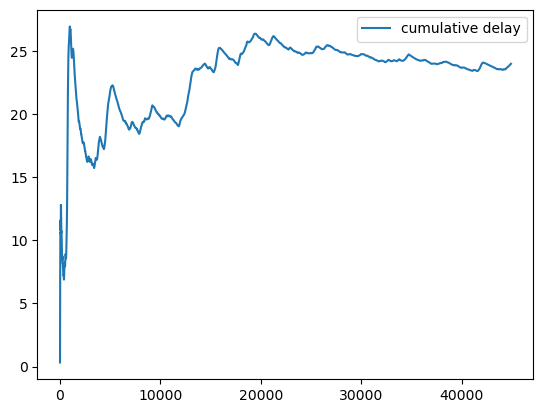

In [19]:
plt.plot(cumulative_delay,label="cumulative delay")
plt.legend()

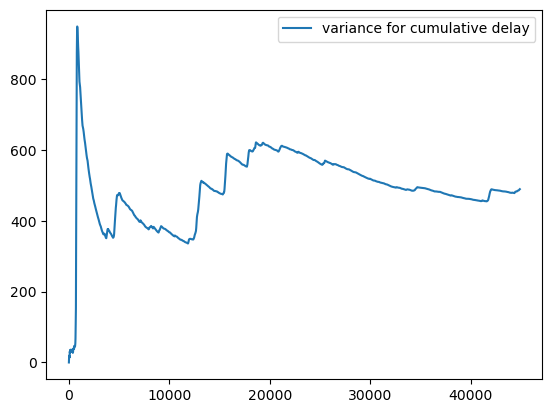

In [20]:
plt.plot(variance_delay, label='variance for cumulative delay')
# plt.yscale('log')
plt.legend()

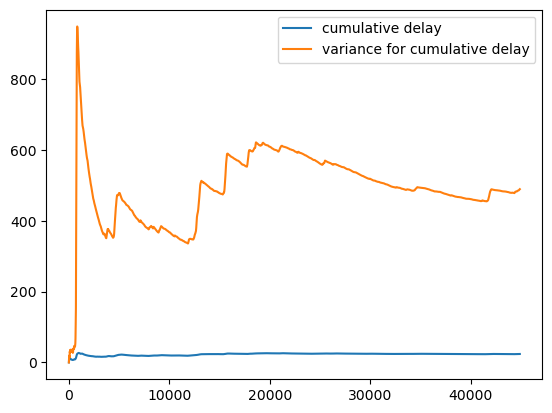

In [21]:
plt.plot(cumulative_delay,label = "cumulative delay")
plt.plot(variance_delay, label='variance for cumulative delay')
# plt.yscale('log')
plt.legend()

In [22]:
def transient_point(variance_list):
    
    var_ave = np.mean(variance_list)
    var_std = np.std(variance_list)
    print(var_ave, var_std)
    var_max = max(variance_list)
    j = variance_list.index(var_max)
    
    for i in range(j, len(variance_list)):
        if (variance_list[i] > var_ave - var_std/2) and (variance_list[i] < var_ave + var_std/2):
            return i

tp = transient_point(variance_delay)
tp #it's the point we are looking for 

489.99362821356686 101.40046672816744


1980

In [23]:
variance_delay[593], cumulative_delay[593], np.mean(cumulative_delay)

(45.268392553897975, 8.59015709373259, 22.90968487121207)

In [24]:
util=[0.1, 0.2, 0.4, 0.7, 0.8, 0.9, 0.95, 0.99]

<b>util is equal to avg(service time) / avg(arrival time)